In [11]:
######################################### Libraries ##############################################

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline     

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite.toymodels import surrogate_generator 
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.models import Models, Prediction

import math
import sklearn
from sklearn.linear_model import LinearRegression
import pandas as pd


In [12]:
cd

/Users/alondraalvarez


In [13]:
cd Desktop/REU 2025

/Users/alondraalvarez/Desktop/REU 2025


# If the code above gives you problems try this one

In [14]:
site = "M1"

path = f"{site}_data/"

# Rain Events
rainy_times = pd.read_csv(path + f"{site}_continuous_rain_periods.csv")

events = list(zip(
    pd.to_datetime(rainy_times['start_time']),
    pd.to_datetime(rainy_times['end_time'])))

########################################################################################

only_rainy_times = pd.read_csv(path + f"{site}_no_rain_continuous_rain_periods.csv")

start_r = rainy_times.extended_start
end_r   = rainy_times.extended_end

only_r_events = list(zip(
    pd.to_datetime(only_rainy_times['start_time']),
    pd.to_datetime(only_rainy_times['end_time'])))

Negative precipitation values: 0


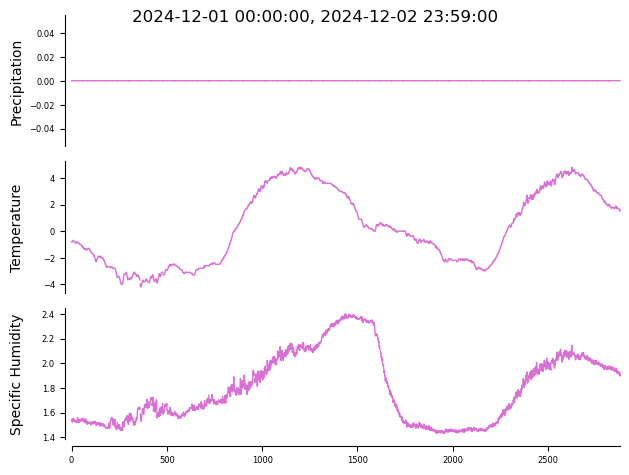

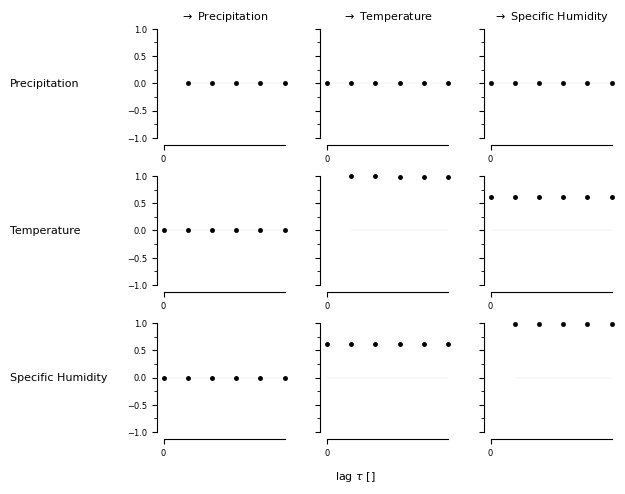

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


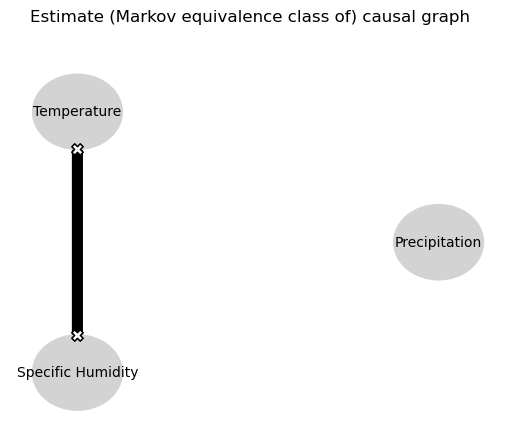

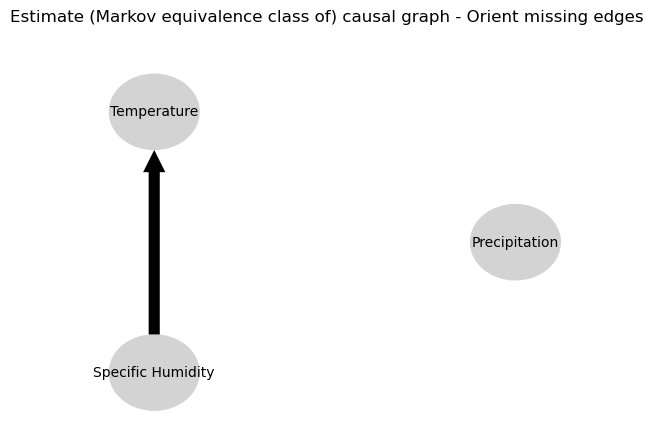

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9971228956098881
0.994393071225739
0.9913664706548488
0.9880679706674946
0.9843851127258438
0.34794842173527357
0.3459007547871116
0.3445173055581241
0.3436412364347131
0.3429154070947032
0.3420348971934876
0.34794842173527357
0.3474955851304329
0.3469643311166145
0.34628726038001395
0.3454514194674221
0.3444003908984978
0.0
0.9849108470490644
0.9754179071441252
0.970352999166076
0.9673661538502081
0.9641625857423337


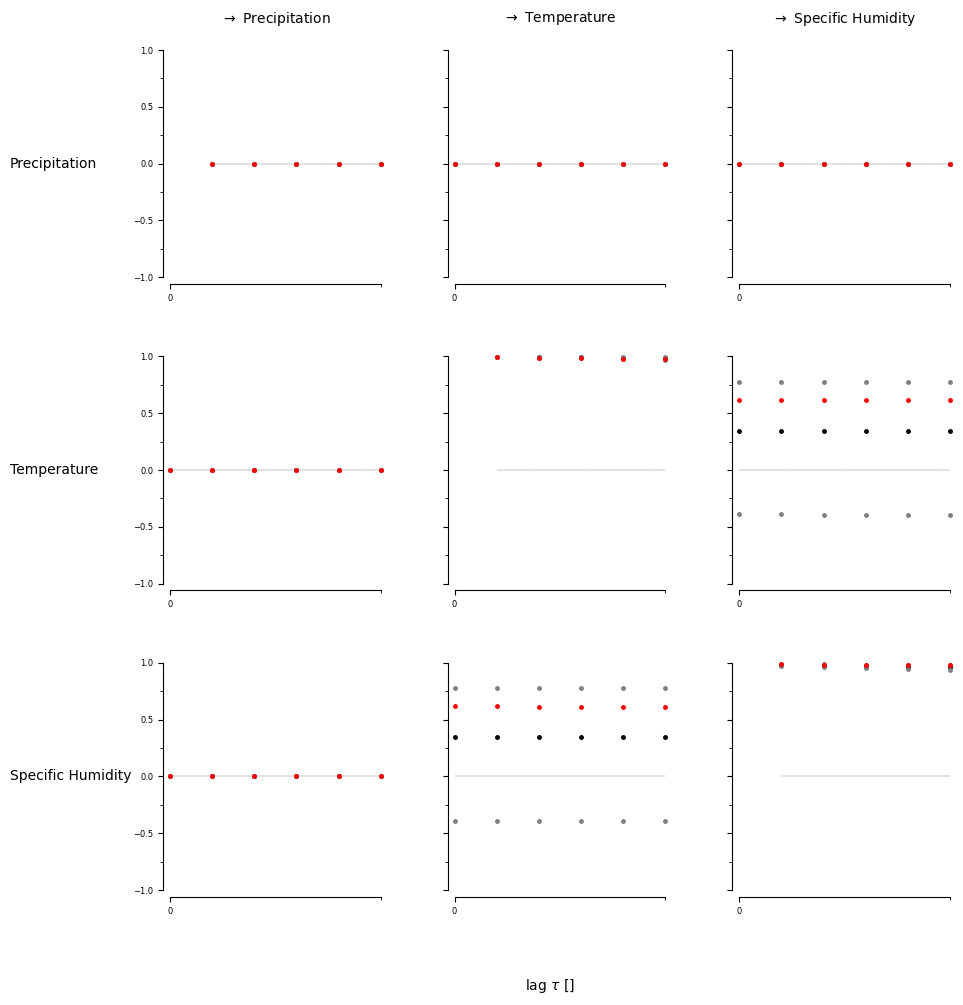

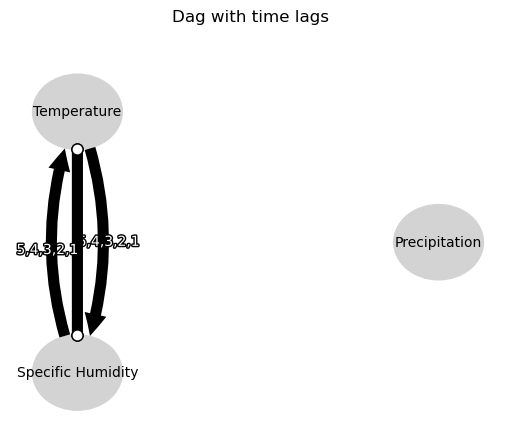

Negative precipitation values: 0


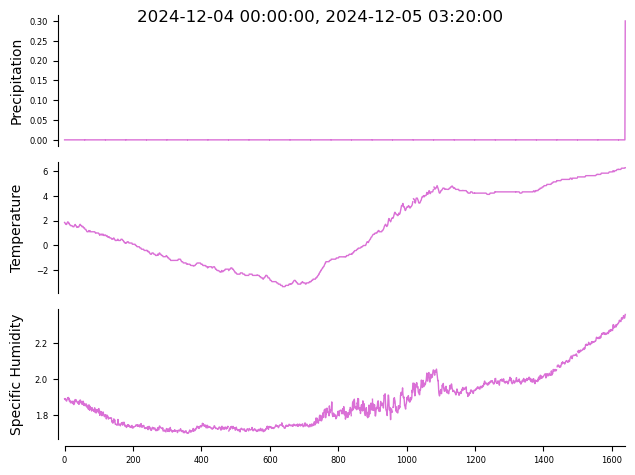

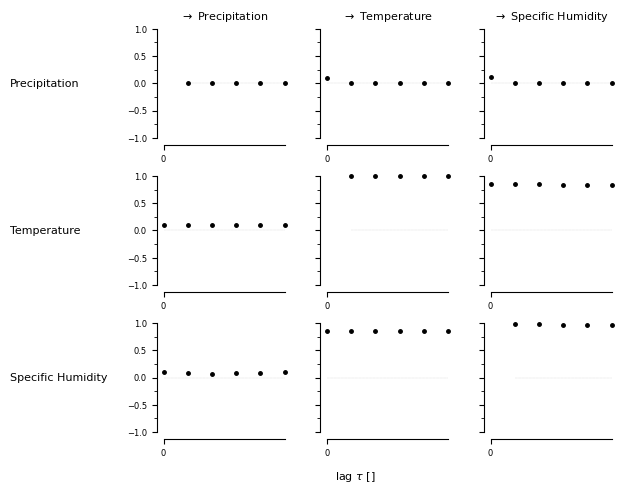

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


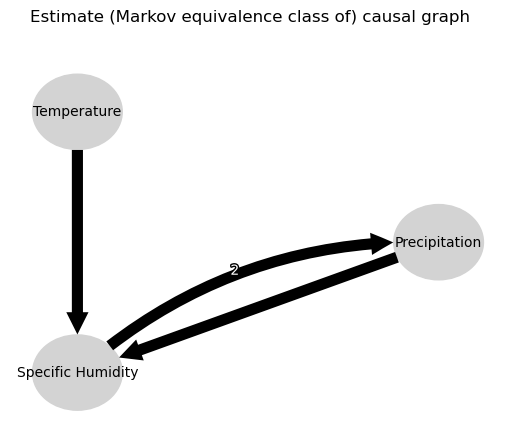

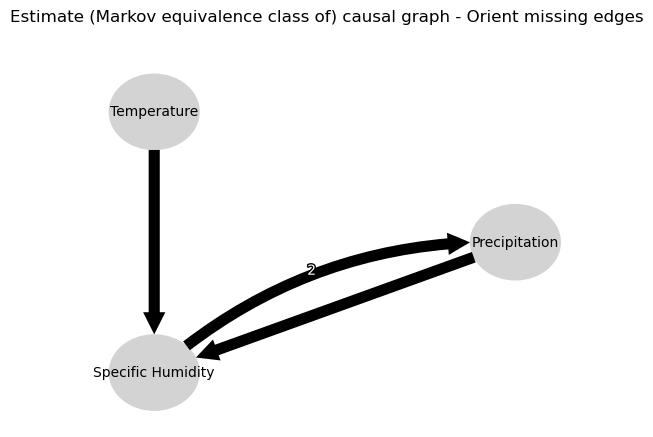

0.0
0.0003599415915910934
-0.0004687361074872442
-0.0006057519351790034
0.004610493977646828
0.0008288024578984554
0.03874867237474708
0.03892454050526378
0.038435789354667224
0.03862508563024973
0.03888382786194218
0.03896015025511936
0.05361169062767413
0.05261151064842993
0.05226914180343975
0.05119260835878266
0.05165514175741817
0.051433610237646456
0.03874867237474708
0.03947946914892563
0.0391745438328223
0.038960648928816496
0.038234848046326035
0.03874006936825841
0.0
0.9961736355645675
0.9917099950259936
0.9870028747337822
0.9824284394980728
0.9780131318267977
0.6001906667353344
0.5970111548434259
0.5948720980100459
0.593413143279038
0.5923407080011234
0.5908793948404011
0.6001906667353344
0.5998995373960886
0.5984745830434028
0.5967490801294061
0.5949266794344541
0.5930877248925227
0.0
0.982181439098937
0.9703148379399877
0.9624137220002915
0.9584291210300248
0.9528652578045653


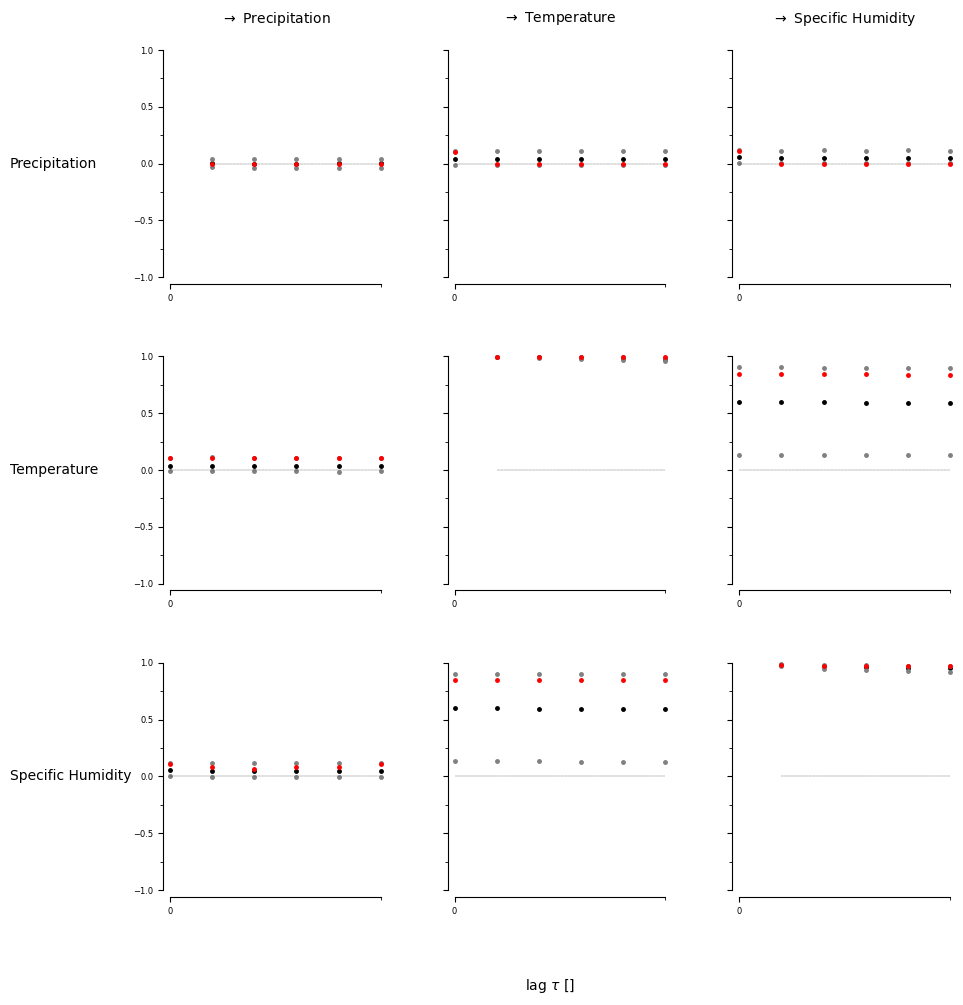

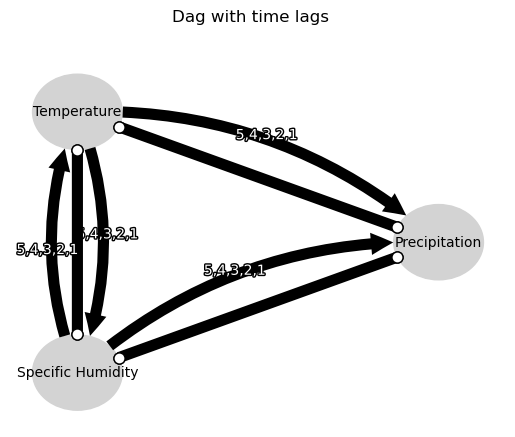

Negative precipitation values: 0


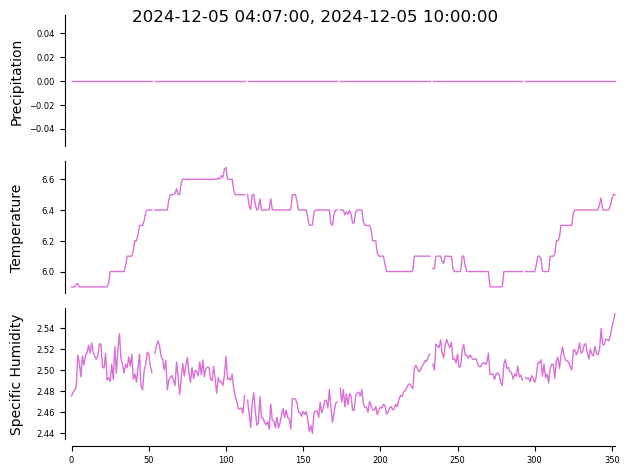

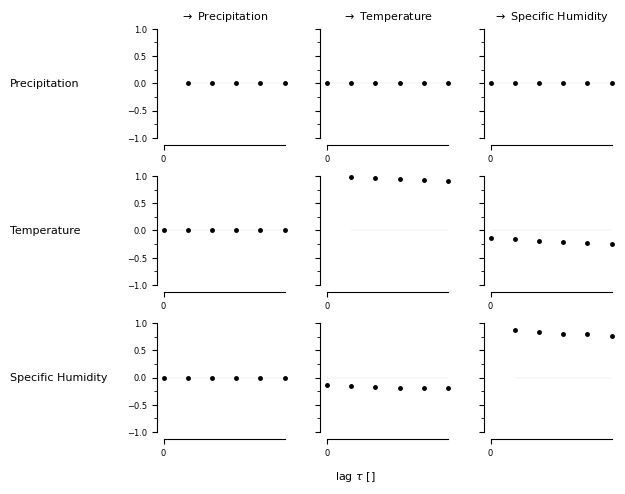

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


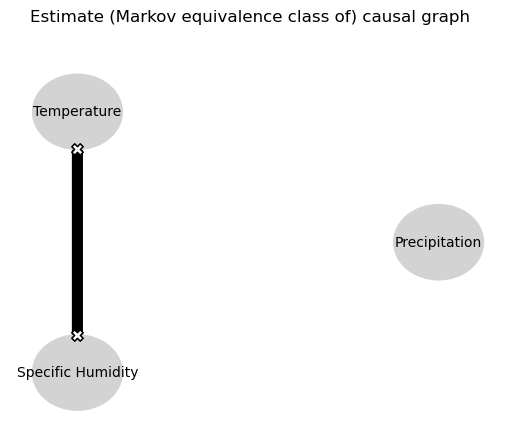

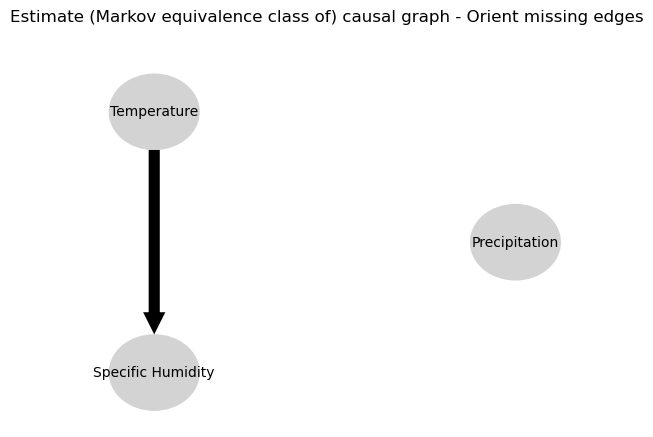

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9544545837289148
0.9231315340425493
0.8924252604137095
0.8641480215148405
0.8374855624855454
0.431667945287839
0.3892414355724266
0.3687054244880342
0.3576091676208841
0.3555011713506426
0.3426830317459071
0.431667945287839
0.4166862129865352
0.4049741909777036
0.39378034830624087
0.38316988911364197
0.37135827099064245
0.0
0.8534461361605767
0.7765383135163811
0.750604775615314
0.7732973212056151
0.7485720462663521


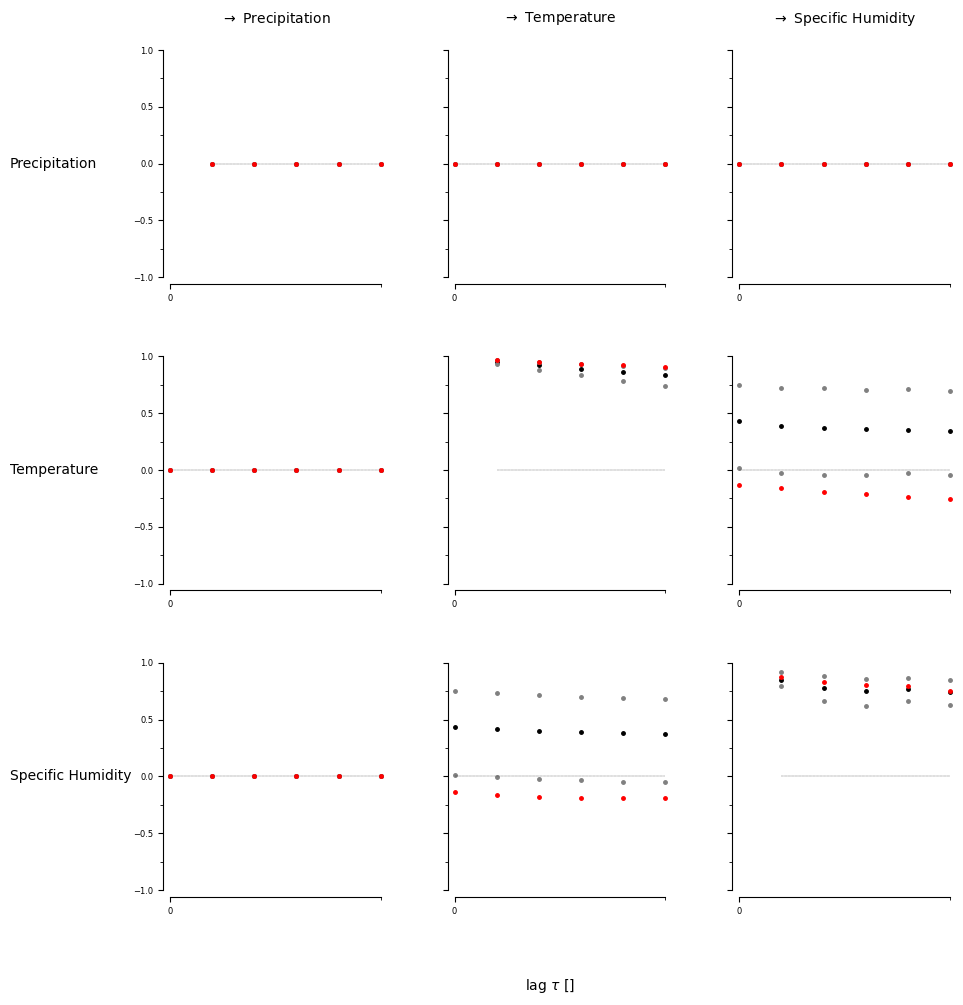

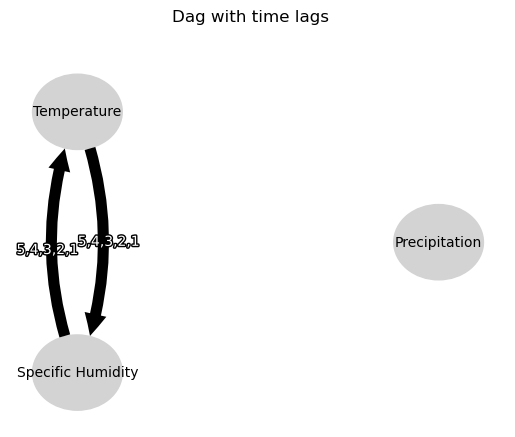

Negative precipitation values: 0


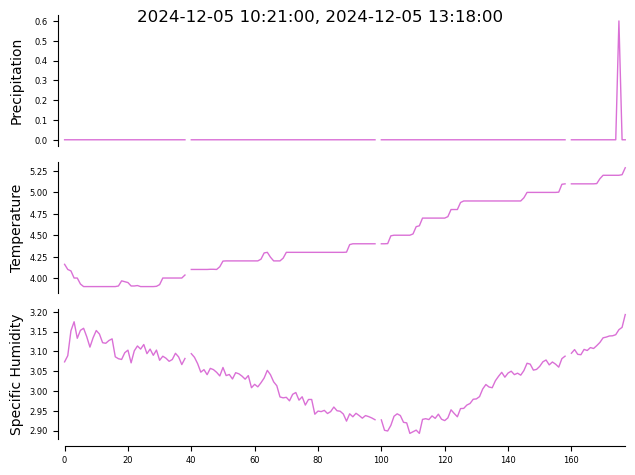

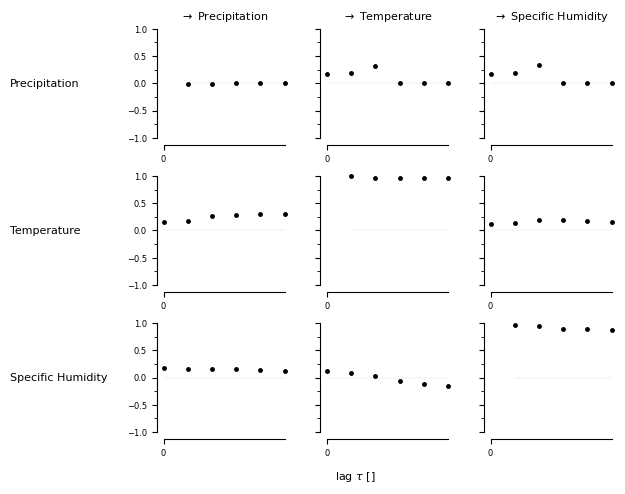

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


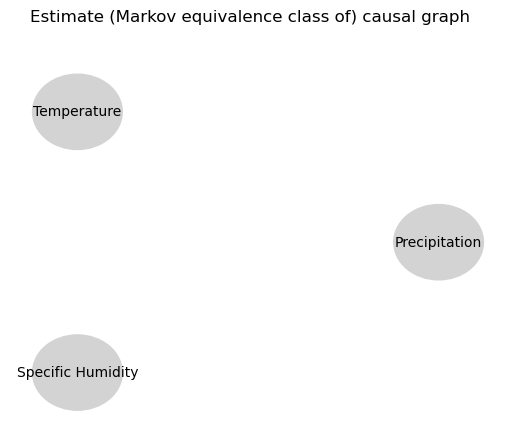

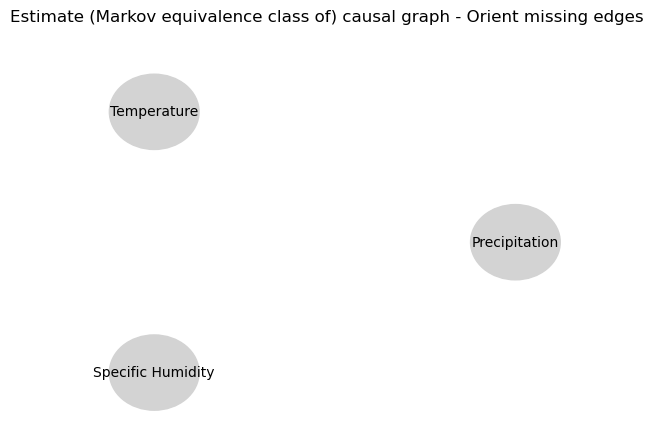

0.0
-0.007582092314330248
0.008773535057261707
-0.001956541255118782
0.0012438802094806255
-0.0052406649568716565
-0.016542215665474452
-0.01629745311512789
-0.0160201508220867
-0.016775488801632515
-0.019690849952586284
-0.012524549512212331
0.014065751476434846
0.021817140547653224
0.024518291110506314
0.02614407489537605
0.017588560640846594
0.024062809465451886
-0.016542215665474452
-0.014014744186980494
-0.014564285609353012
-0.016453271876910914
-0.01618296663206767
-0.009063262546599614
0.0
0.9472744378332406
0.9109653393741174
0.8822315167023169
0.8579727295368843
0.832411164775464
0.1786361464754474
0.16317886703182452
0.15006932841474194
0.1410096141717952
0.13257628520329617
0.12483546809021216
0.1786361464754474
0.16858421550745256
0.15952924320592868
0.14840721775442764
0.13690217924998233
0.12664016249608795
0.0
0.9033385307189233
0.8391225159144
0.7812839167512857
0.7317562263150701
0.6889923013147619


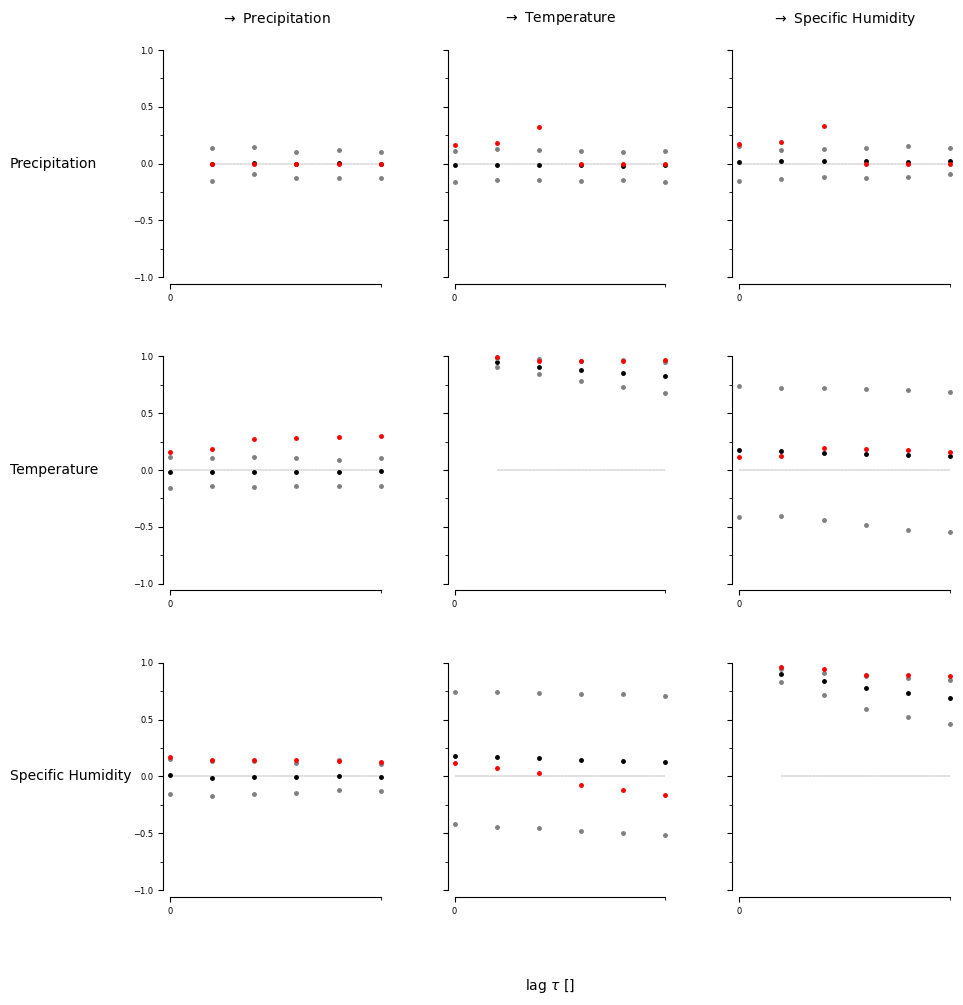

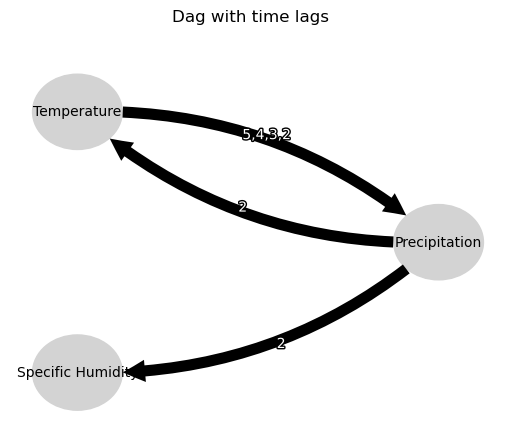

Negative precipitation values: 0


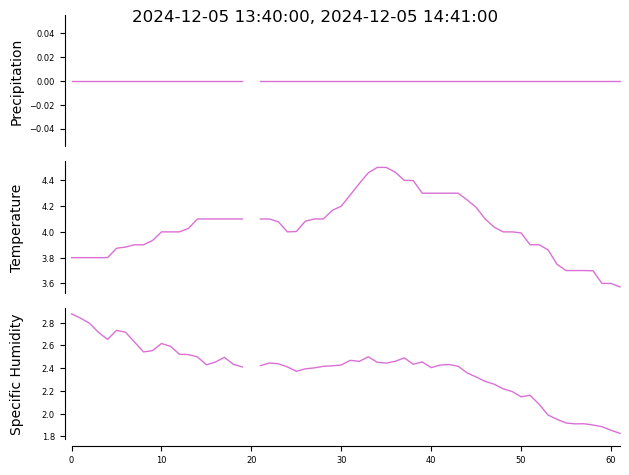

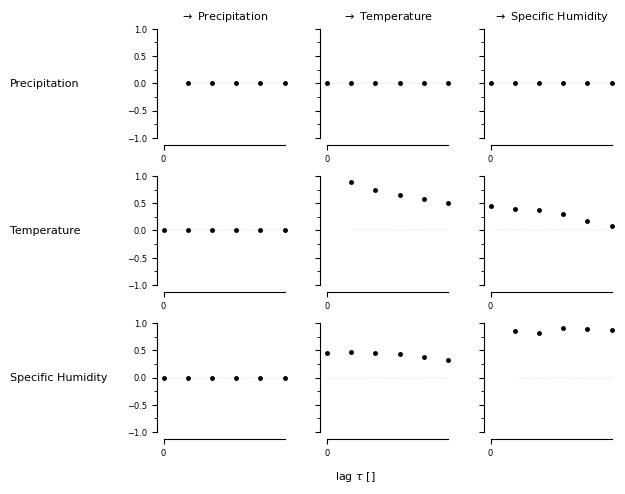

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


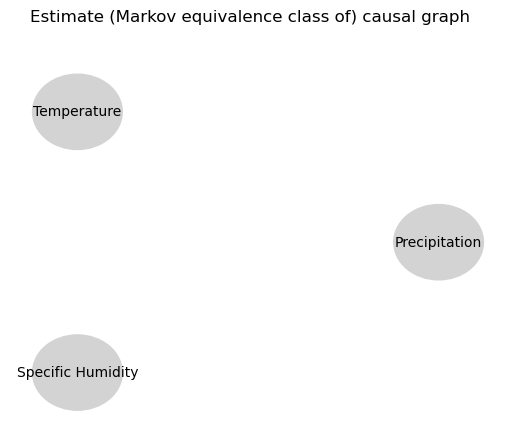

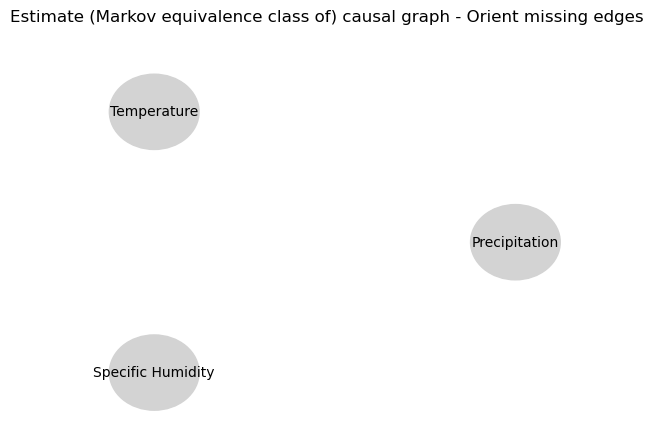

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7814962219935402
0.6891884130512467
0.61629194056548
0.553211398526384
0.4840835541531196
0.08983356838653775
0.07424533275485666
0.04694121761869608
0.03001309537867801
0.02077220866517819
0.02299379369685063
0.08983356838653775
0.07164820644336993
0.06261395072443941
0.05646888734459151
0.041240363232699376
0.0435619709579941
0.0
0.8303451591330916
0.750848766037283
0.7027481726461836
0.6624549019904181
0.6435855067811213


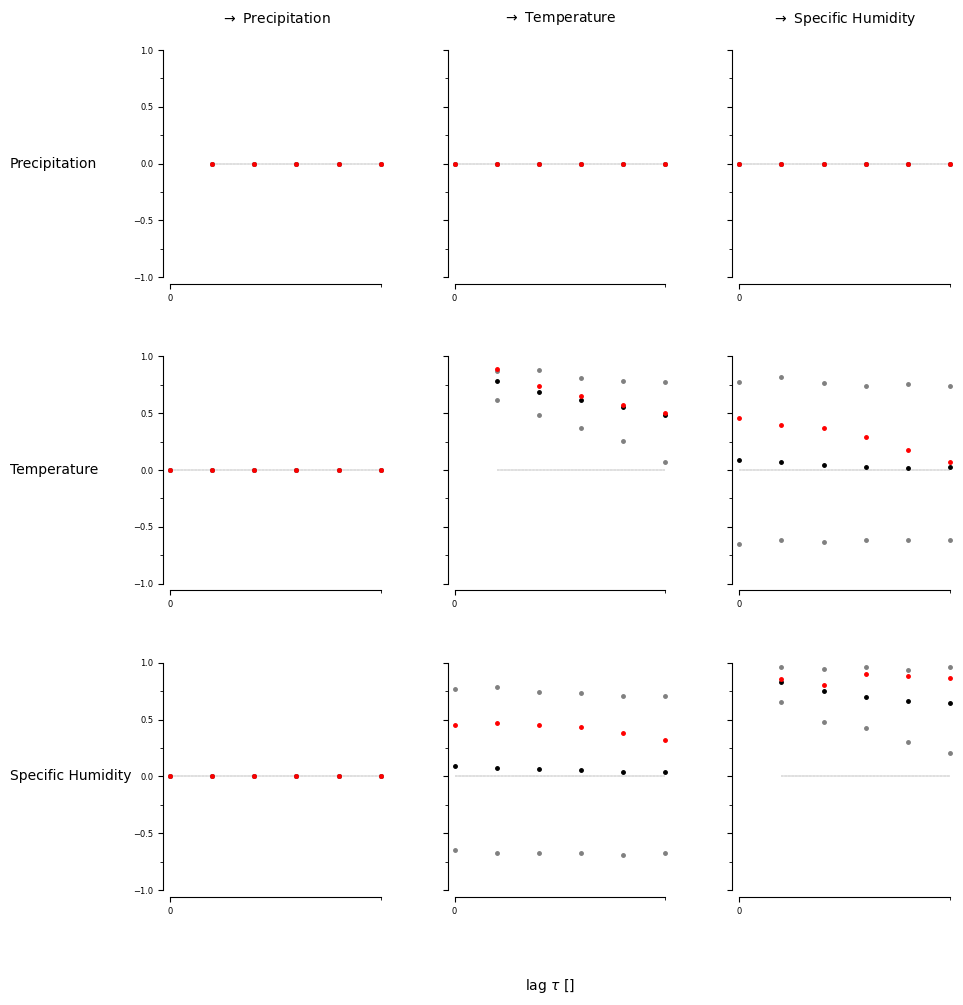

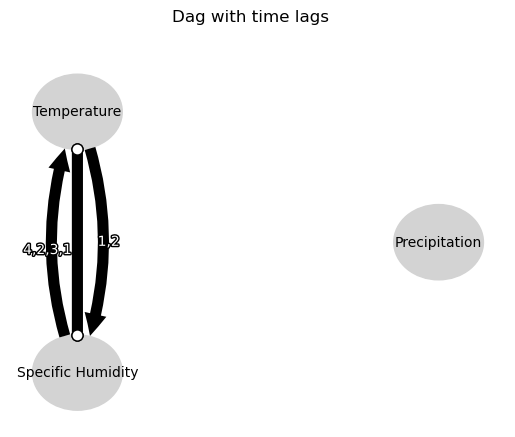

Negative precipitation values: 0


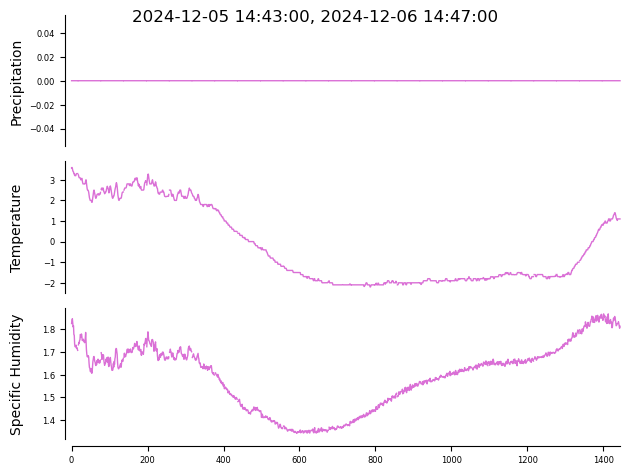

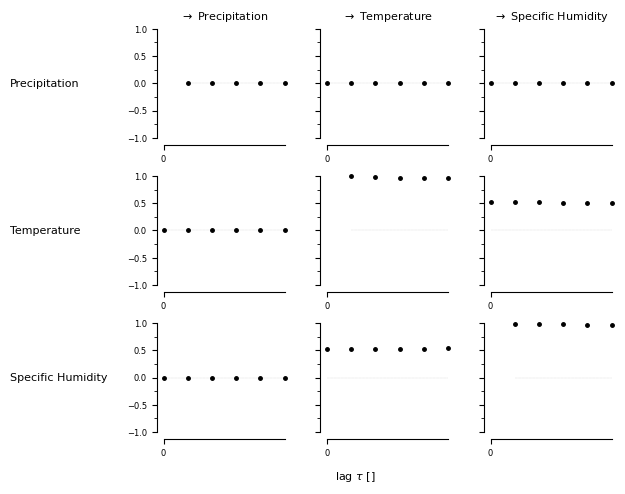

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


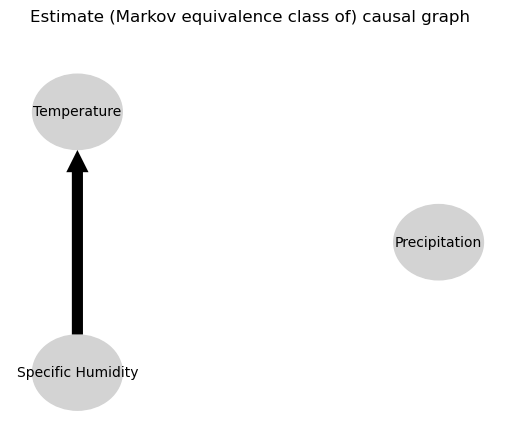

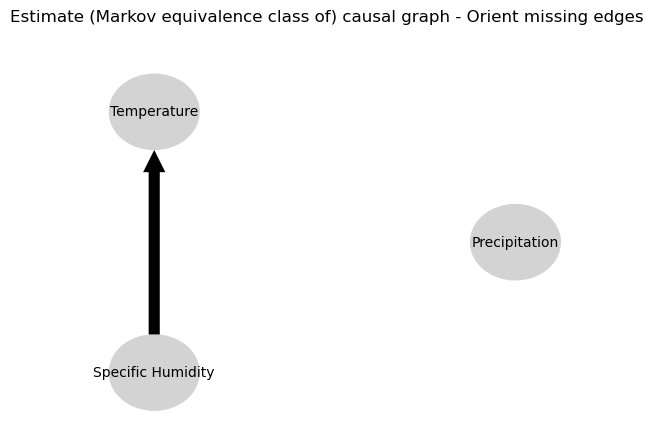

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9950033157552141
0.9884263588703283
0.9815251875531533
0.9747746613025745
0.9682548148685693
0.6696067274847782
0.6618837224195435
0.6551160733553151
0.6485455915109866
0.6421160476400647
0.63576937240671
0.6696067274847782
0.6719652569296899
0.6723132935151778
0.6719481033295096
0.6713559529795581
0.6706431013885802
0.0
0.9859144690482191
0.9759239932475792
0.9666841321791941
0.9576753203202081
0.9488455702631753


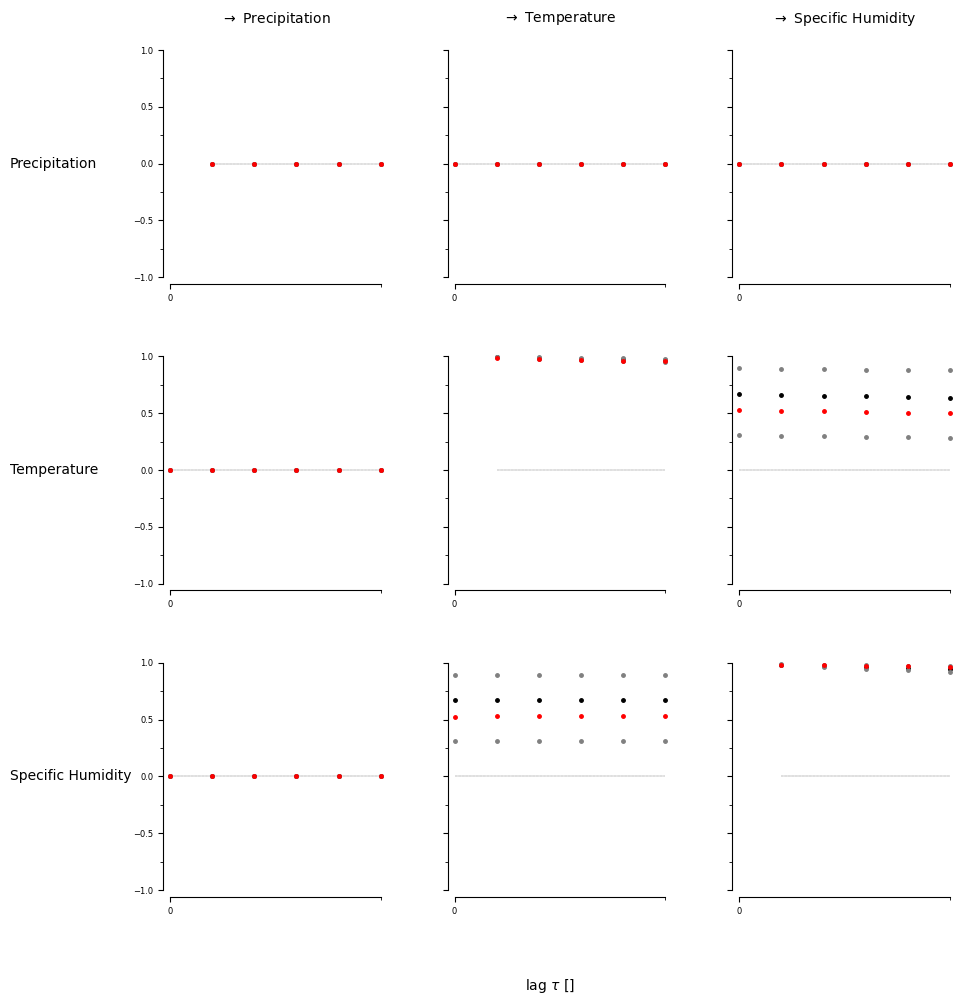

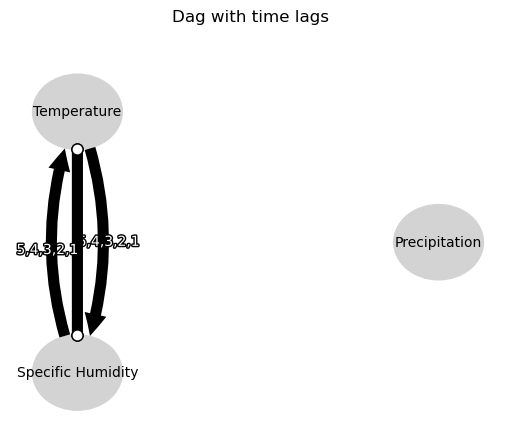

Negative precipitation values: 0


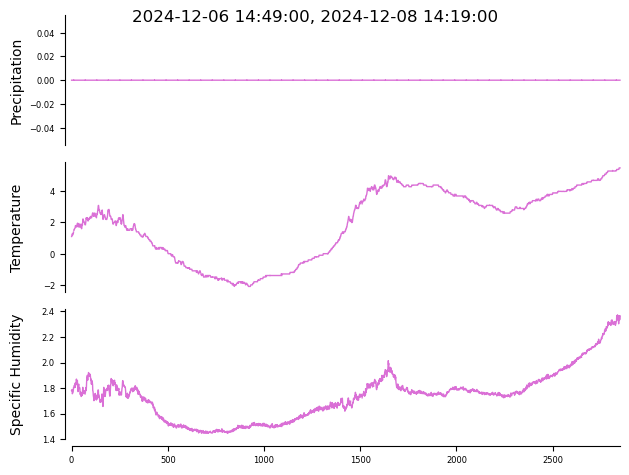

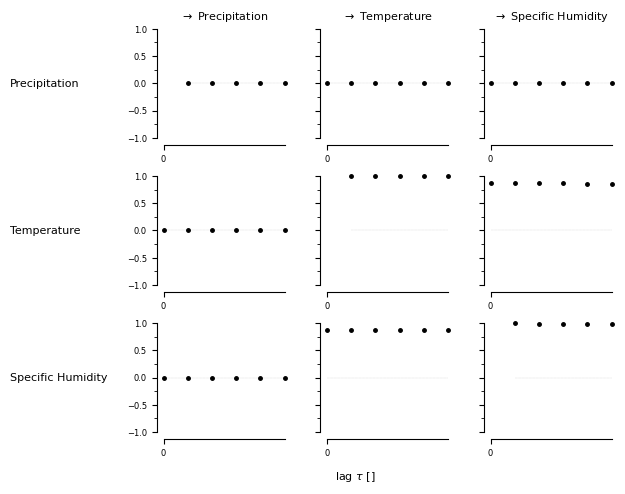

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


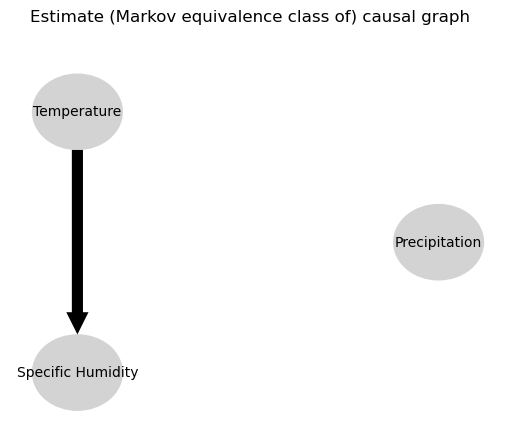

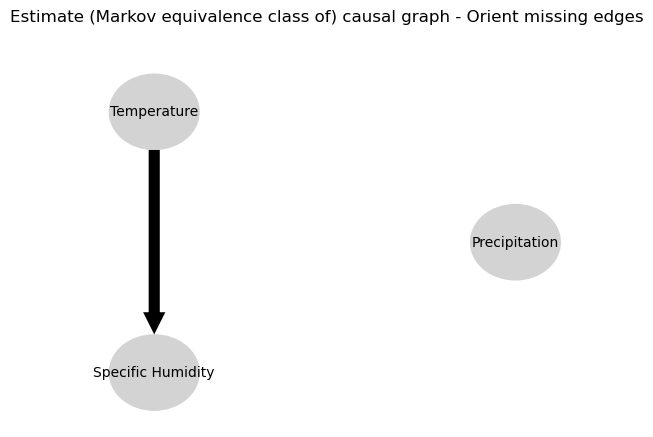

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9971817333272811
0.9942633903957757
0.9907330737838846
0.9872412682401344
0.9837397725552403
0.5807585698403566
0.579391611674718
0.5784481002951698
0.5777616810497378
0.5771188867584303
0.5765041319815595
0.5807585698403566
0.5797369290121507
0.578514358302605
0.5768273675430289
0.5750782150445468
0.5733143141474147
0.0
0.9924694910836555
0.987124080066761
0.9830922885207127
0.9794336158689179
0.9760374298461784


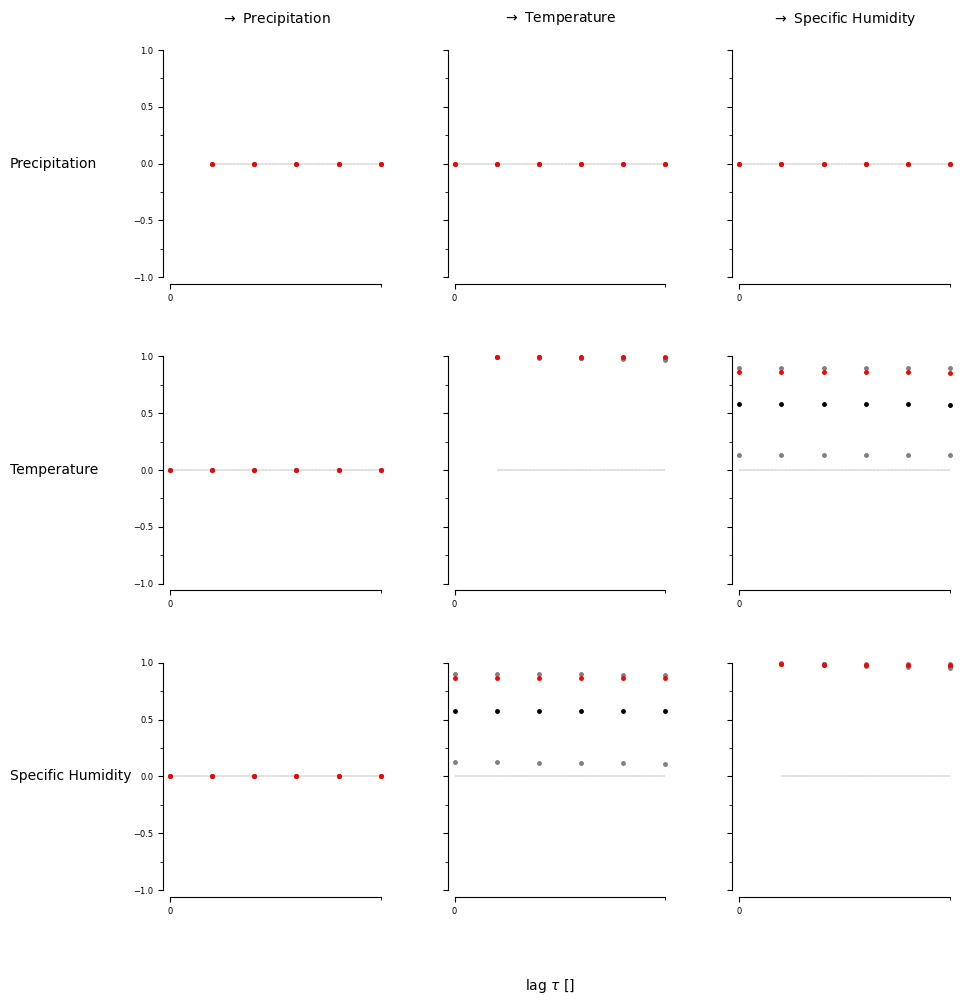

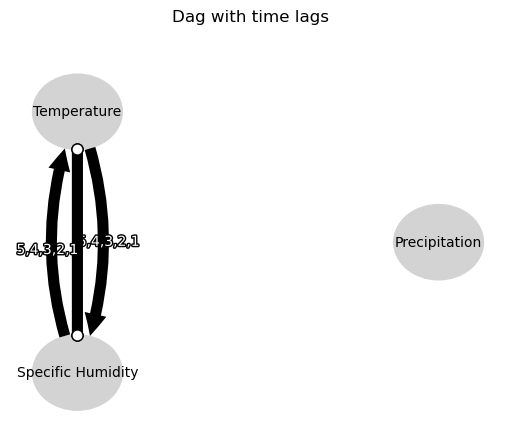

Negative precipitation values: 0


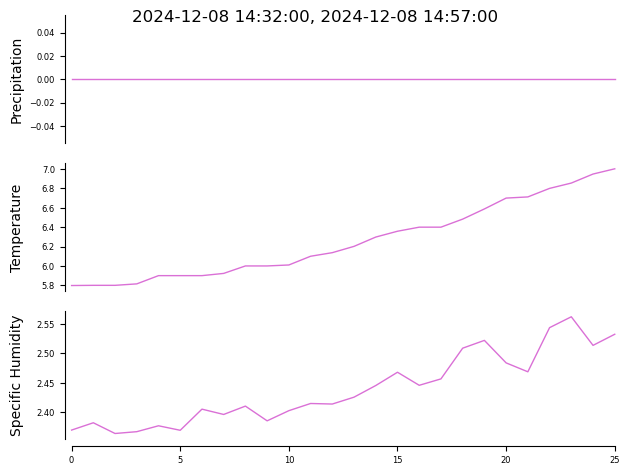

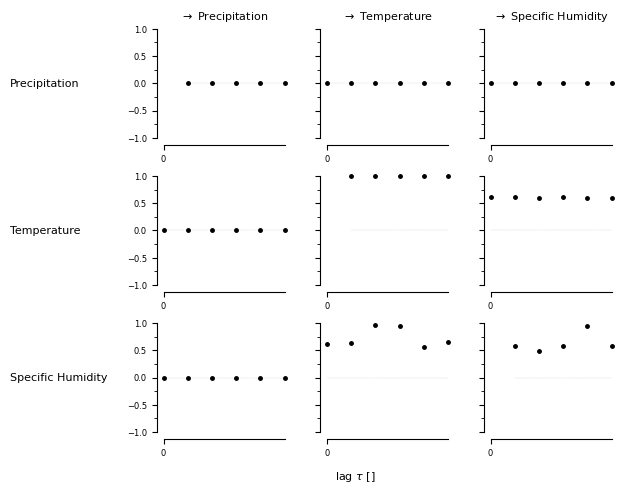

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


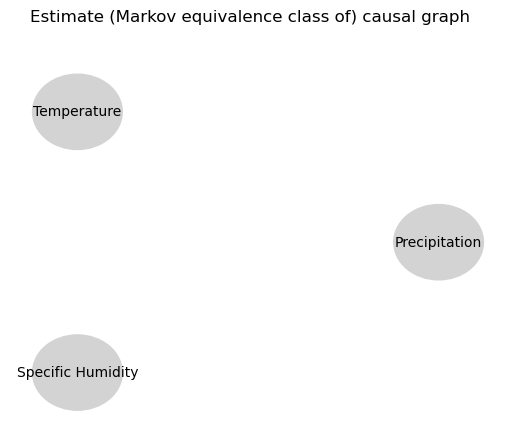

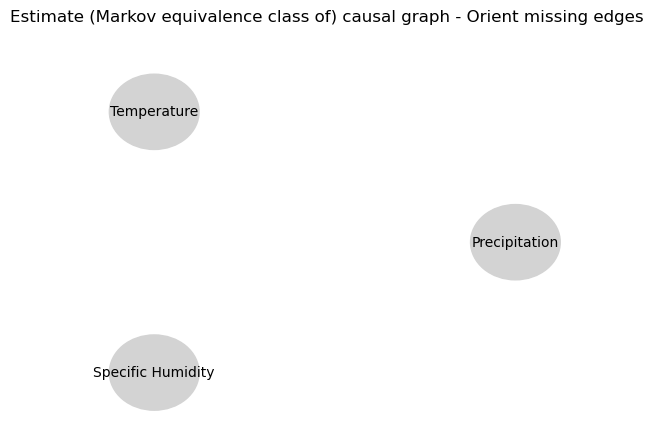

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6159597484439397
0.5101152026694816
0.4475645243611994
0.4107632906279064
0.4077978593891254
0.02288673837310962
-0.09477923769941178
-0.029070413357113502
-0.015167115258681453
-0.002272058977437761
-0.019790929655676588
0.02288673837310962
-0.02053103017490305
-0.04356912688632168
0.01593595777845077
-0.02134227009487859
-0.0318321740926894
0.0
-0.049235371532938374
-0.058807545563617586
-0.06525194630033422
0.047771647931811455
-0.03370408671616789


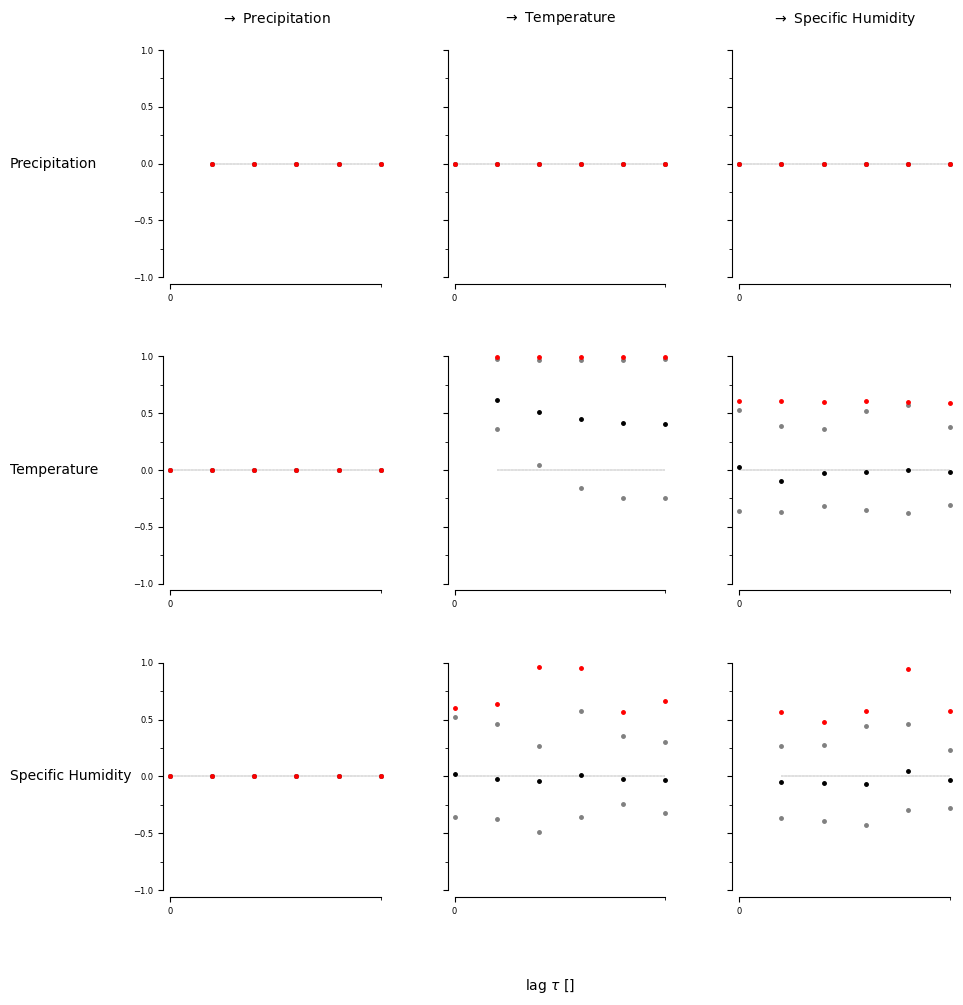

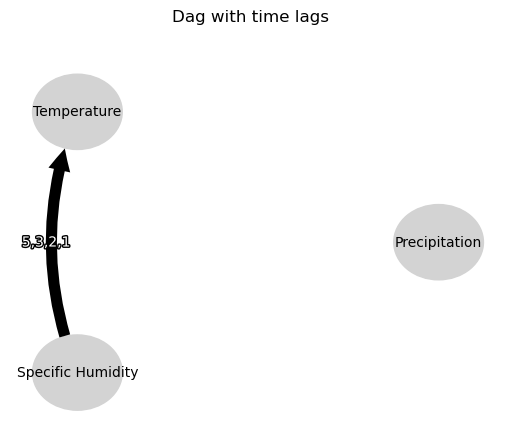

Negative precipitation values: 0


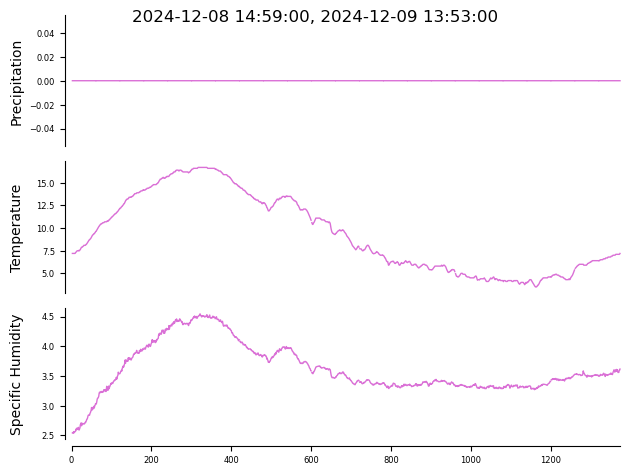

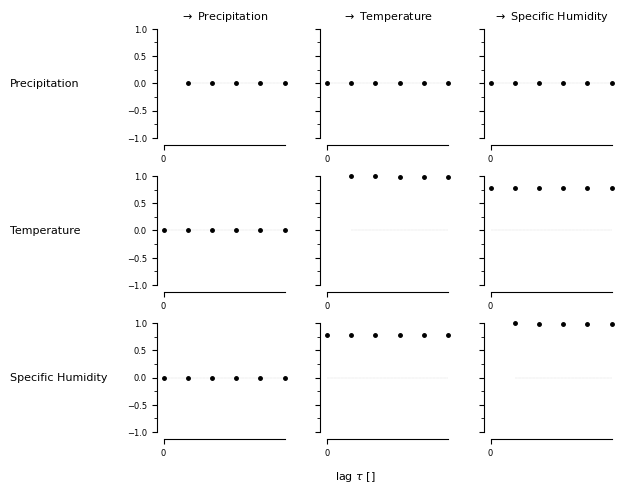

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


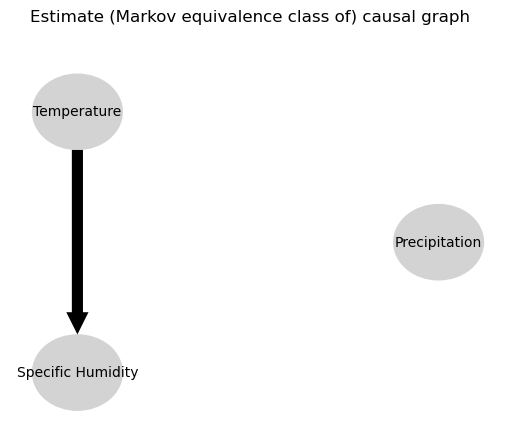

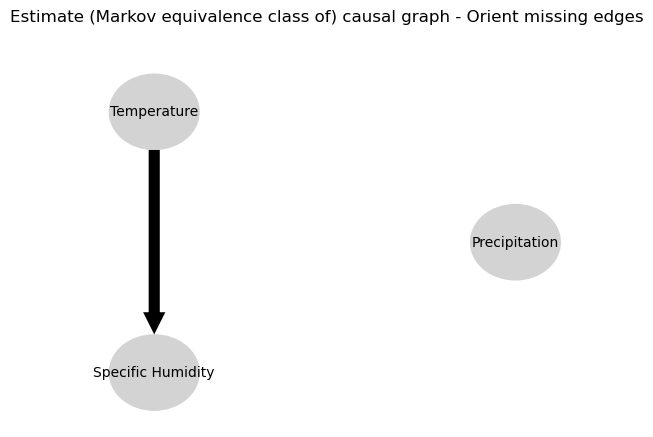

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9892977533165062
0.9806445278236374
0.9725253251445907
0.9649093577905014
0.9578358895441199
0.5748873576027075
0.5689474742665677
0.5637336032056293
0.558948576800247
0.5543995035306793
0.5497594952807809
0.5748873576027075
0.5708351484317506
0.5670895530725031
0.5633259962056986
0.5596226558810261
0.5561764004844489
0.0
0.9821593997267959
0.967821493393145
0.9547338000963685
0.9421964647428663
0.9300065828370546


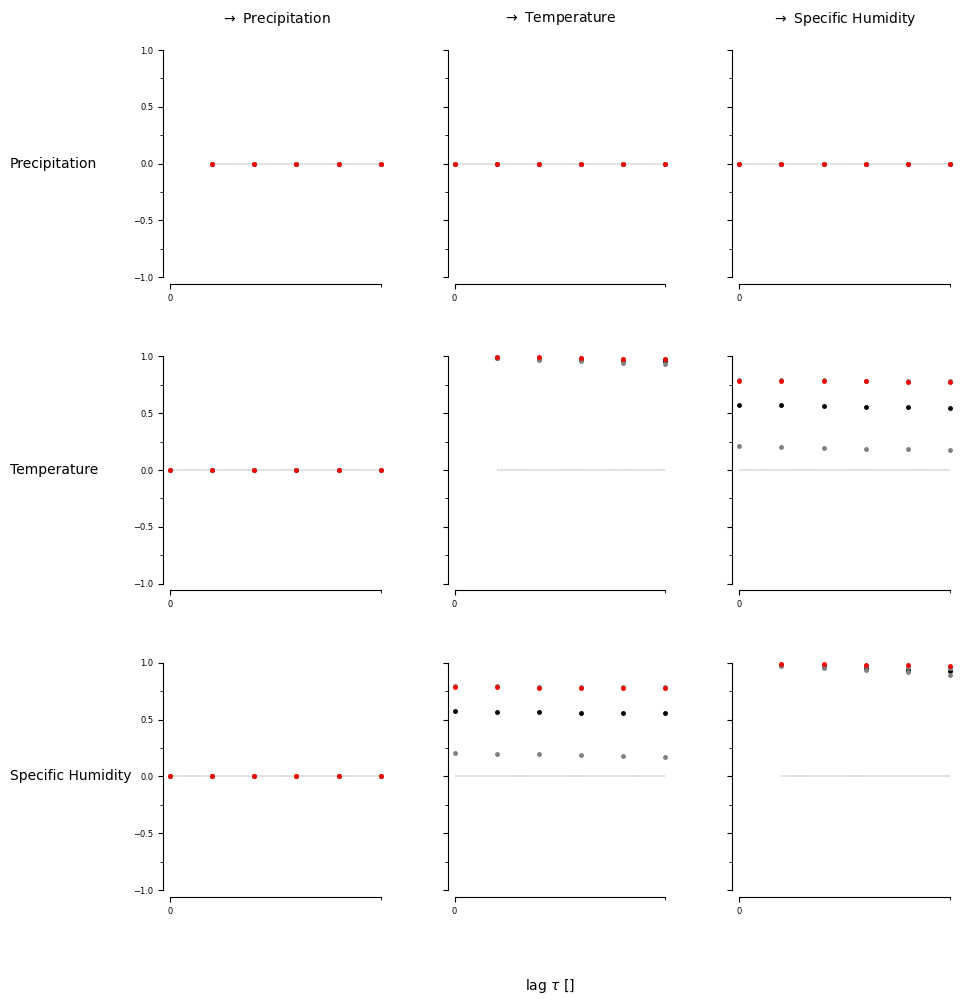

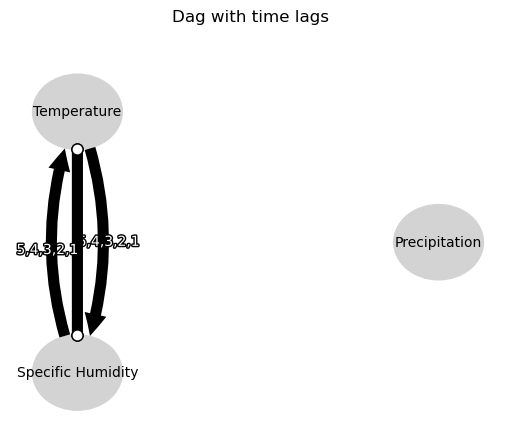

Negative precipitation values: 0


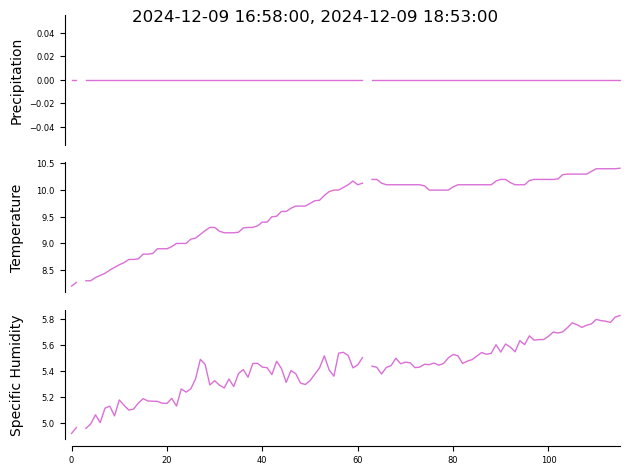

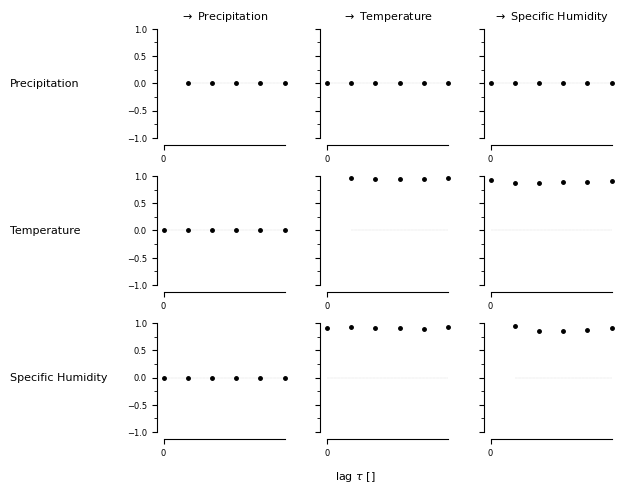

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


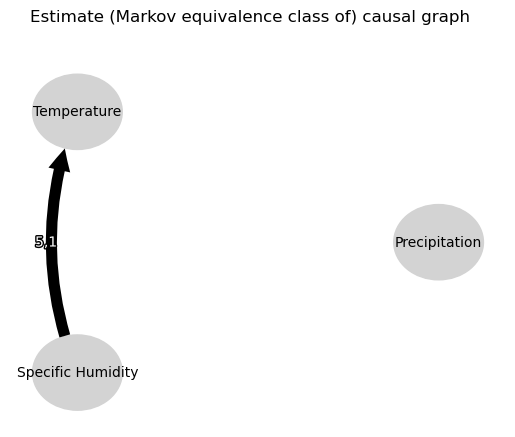

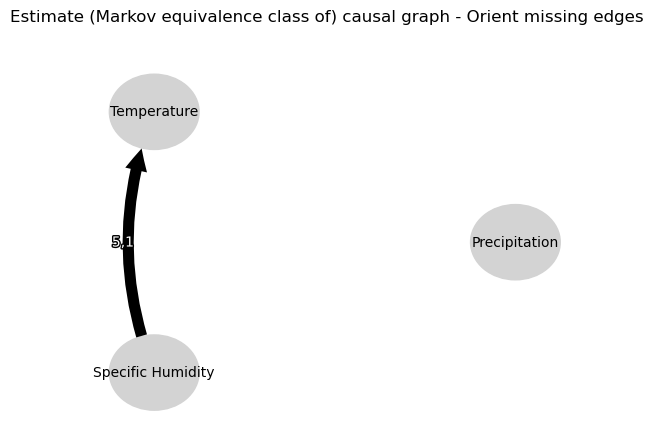

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9058080403111198
0.8462360209028897
0.7889745394901158
0.7343751179008996
0.6825229442934528
0.5592579501328722
0.4848403113132725
0.4232313721707752
0.3636038377443313
0.31587928405302507
0.2700502503338785
0.5592579501328722
0.6261911437222171
0.6729834246029934
0.6920445412806179
0.6850657454757798
0.6569751202578709
0.0
0.8569461769273877
0.7670214125144329
0.6928798693094558
0.6286002812653638
0.569476985004575


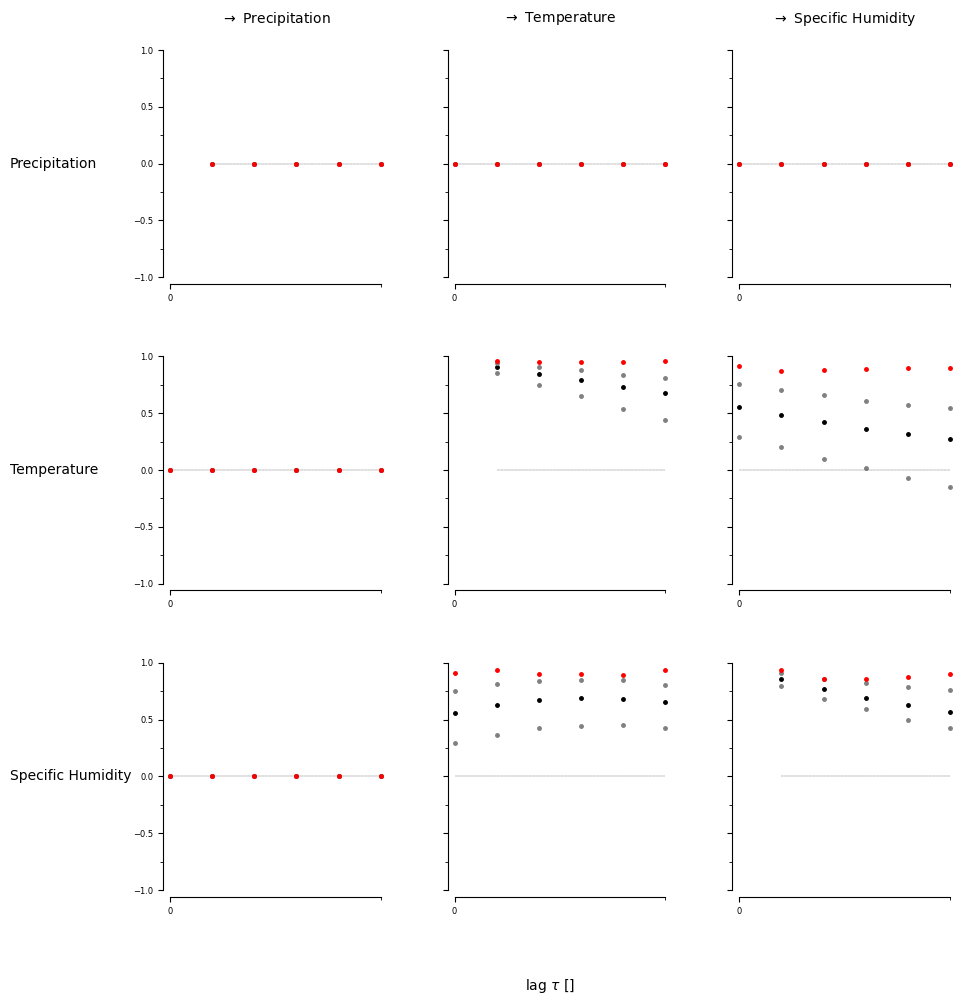

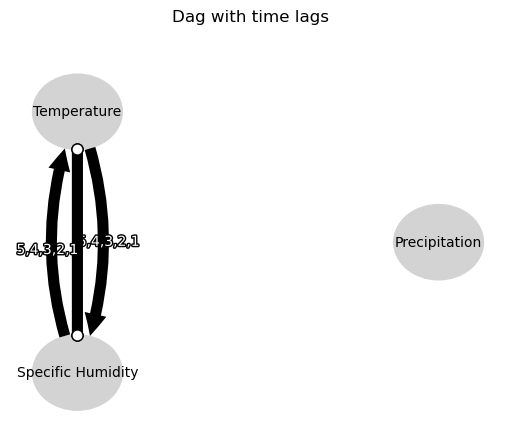

Negative precipitation values: 0


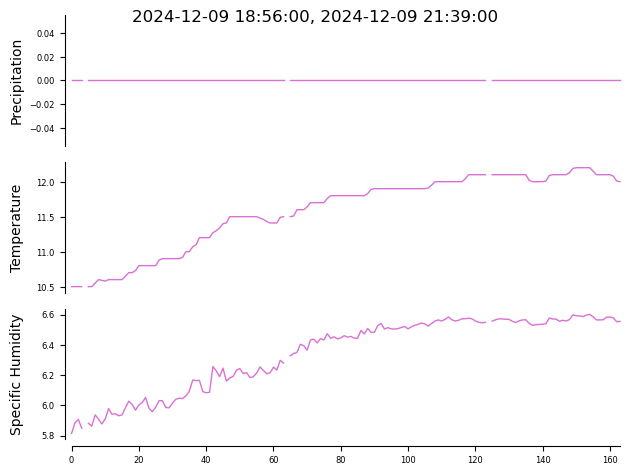

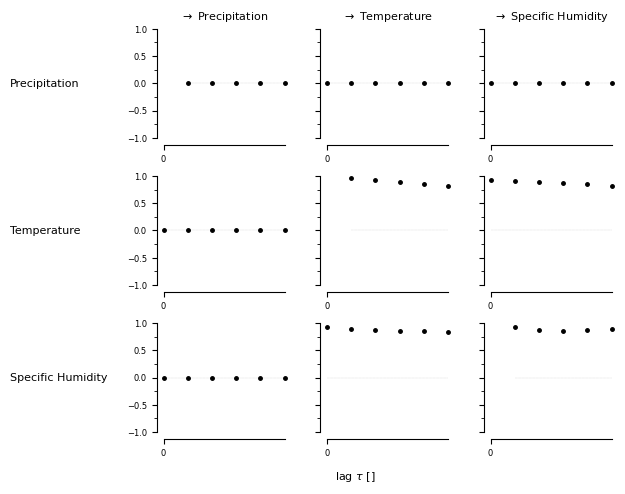

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


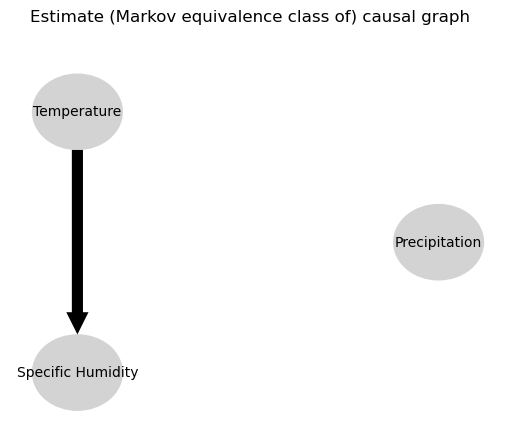

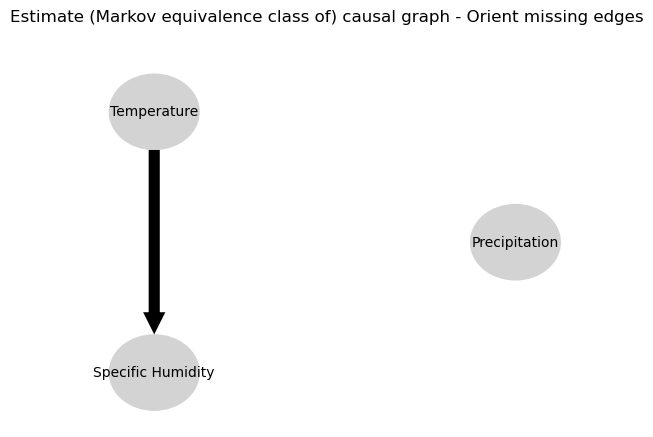

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9043931823459702
0.8424411576969915
0.7910562308079274
0.741562310504126
0.6993598766047812
0.650358627013332
0.5871984436645505
0.5600235696283328
0.5490979790499688
0.5447921533907804
0.5487554828375818
0.650358627013332
0.6135244923481483
0.5789415706337099
0.5467525858919068
0.5147636638246064
0.4867074234227004
0.0
0.7461748963431775
0.6266070215718855
0.5689458363381957
0.5580372231329233
0.6063936221270442


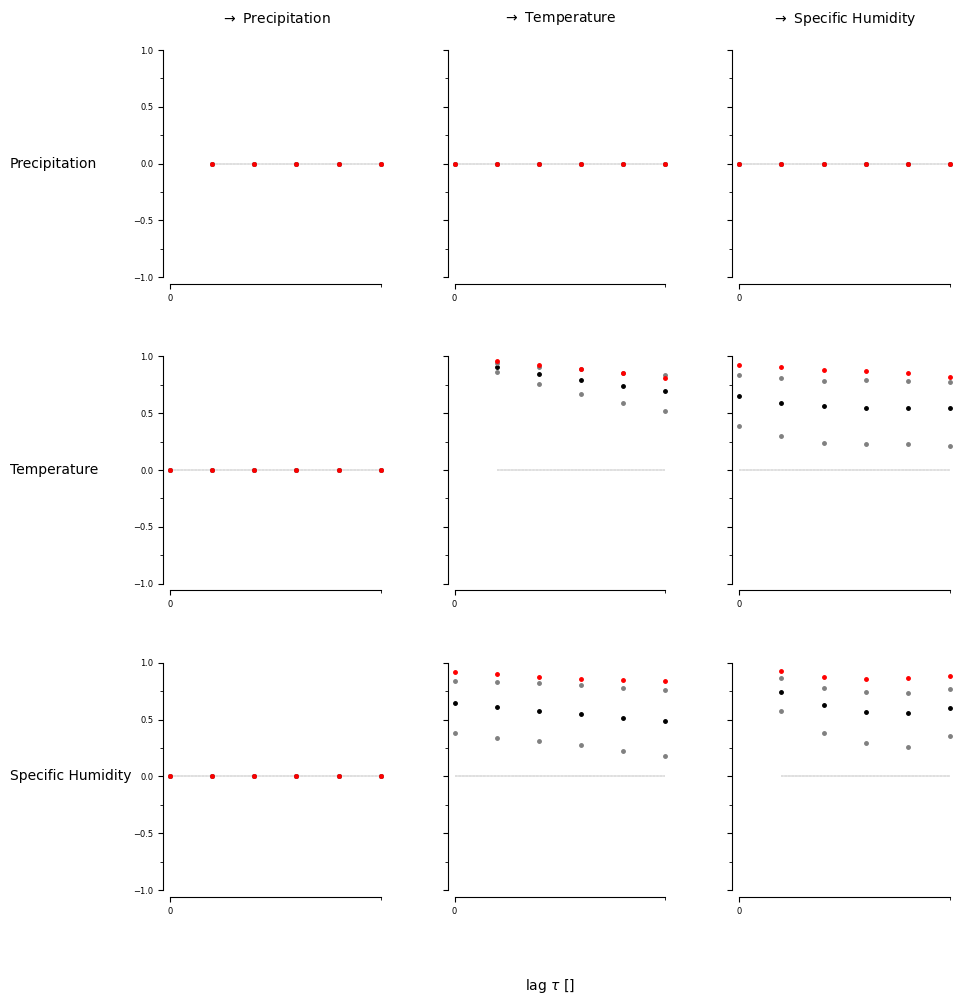

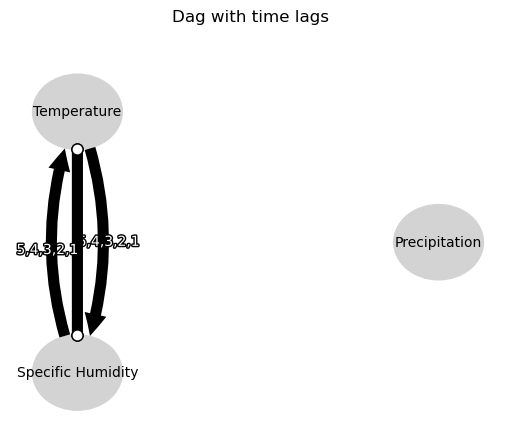

Negative precipitation values: 0


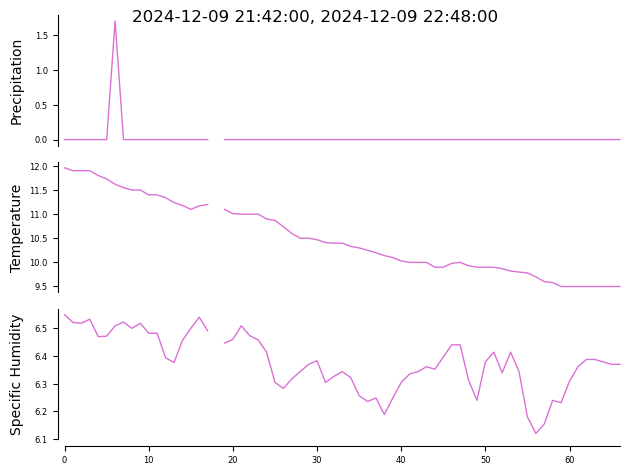

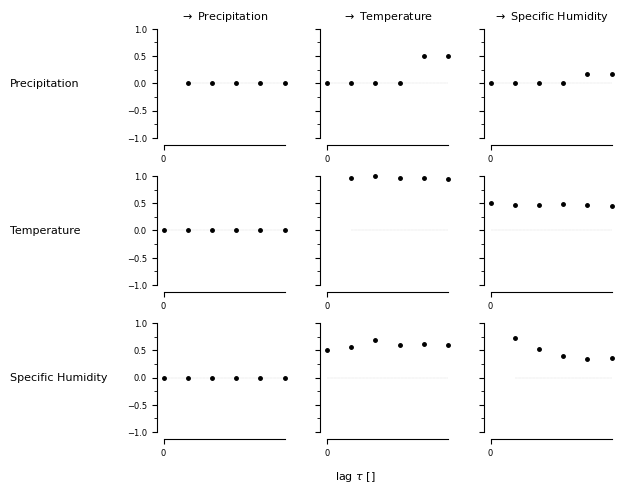

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


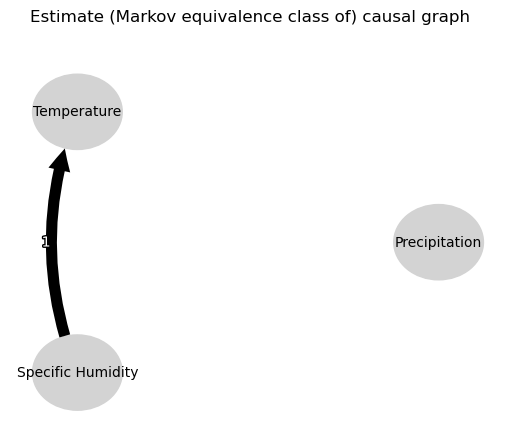

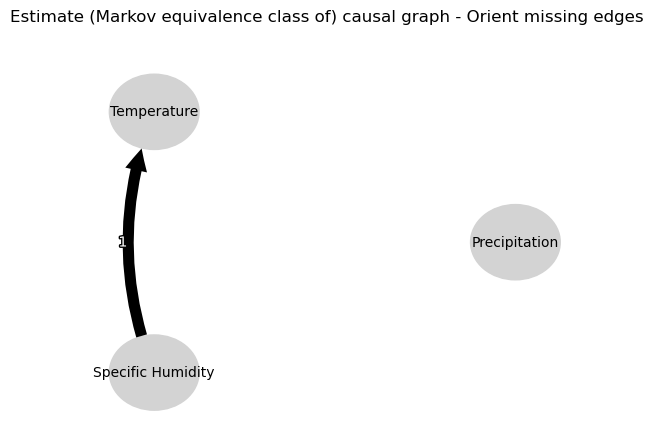

0.0
-0.04898960749244275
-0.010938308284932143
-0.028097698023300297
0.0064336661098883105
-0.008710366780372769
-0.013045322612061705
0.03217616345976177
-0.017895819948939188
0.025328116386525594
-0.004621306685379289
0.03439695838400592
0.07006700044835848
0.06136848002566567
0.04339561081638878
0.009586073353311584
0.015761237501636164
-0.002564311965590449
-0.013045322612061705
-0.006053576193197854
0.027353131037255653
-0.017396142058451143
0.03308876718217229
-0.00048400184841430145
0.0
0.47952722158458916
0.8412109440026354
0.4294256118661477
0.7294264796198827
0.3642436936887517
0.2809843577755731
0.18273766328238017
0.09421579930101945
0.05213874721912729
0.005292763855764009
-0.019871816250463324
0.2809843577755731
0.40454799897572935
0.411865470538172
0.47111675964748045
0.4561897623838014
0.47316151355137753
0.0
0.6829748372936639
0.48687140071702273
0.35701758039655074
0.2724749657493787
0.20229898233562907


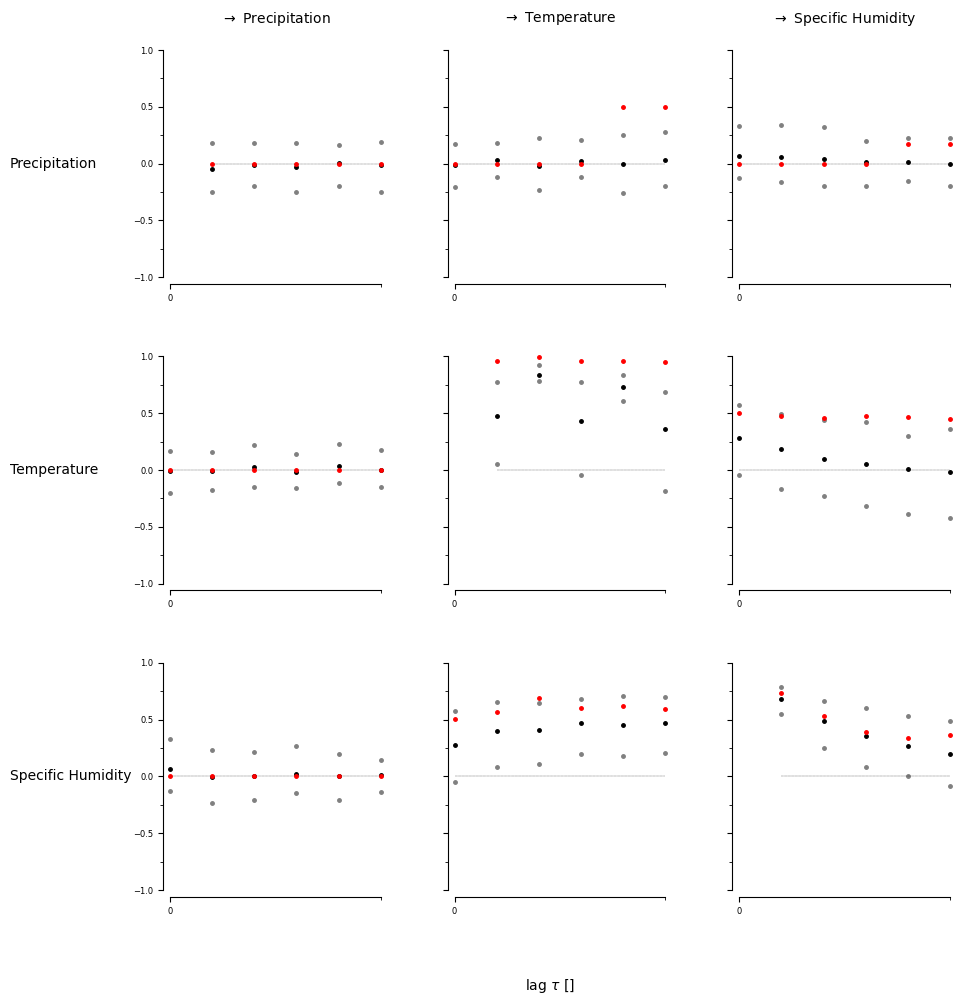

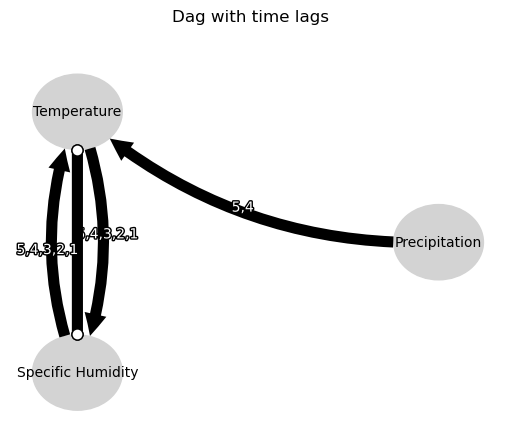

Negative precipitation values: 0


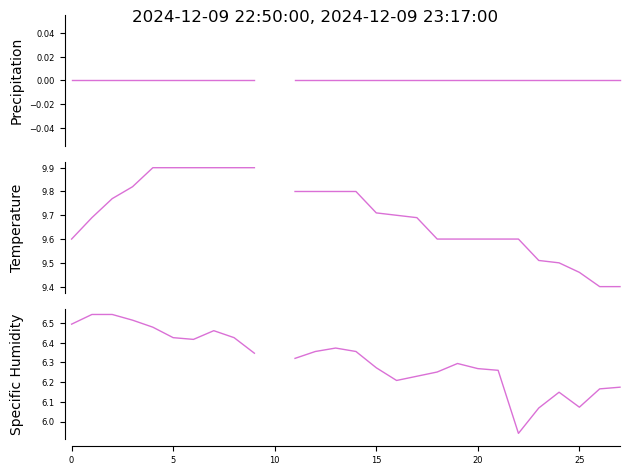

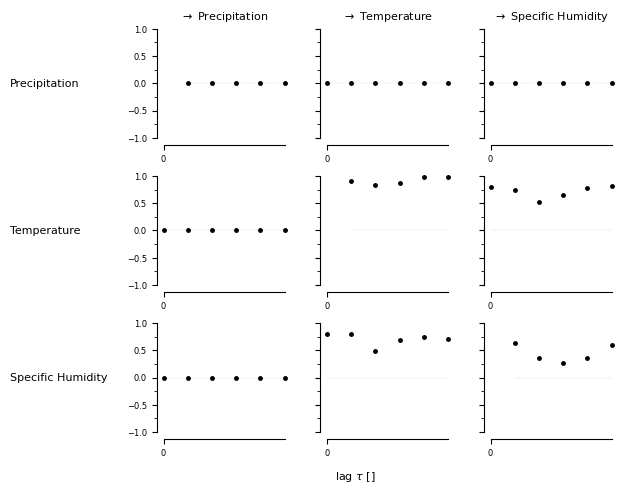

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


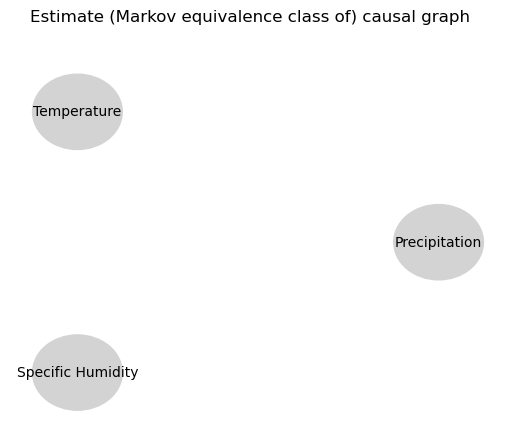

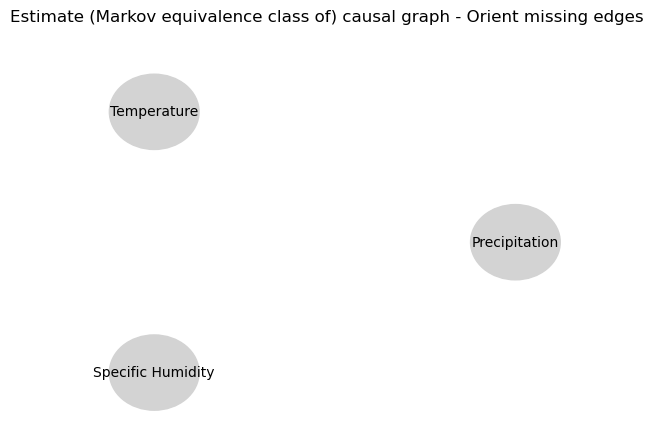

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.07709764220029043
-0.015948652524834614
-0.07907358920652462
-0.06313484164058884
-0.014038212912664463
0.6810216199434206
-0.005532209664464564
-0.030416513155796
-0.07254564037733519
-0.04257948465201442
-0.03711550752004446
0.6810216199434206
-0.0642076082694435
-0.016328644342961315
-0.06883808626820014
-0.03788757101441964
-0.009412658670430235
0.0
-0.015538034094040174
-0.05914487301871817
-0.05238192434223422
-0.06615423226511803
-0.0638447987364277


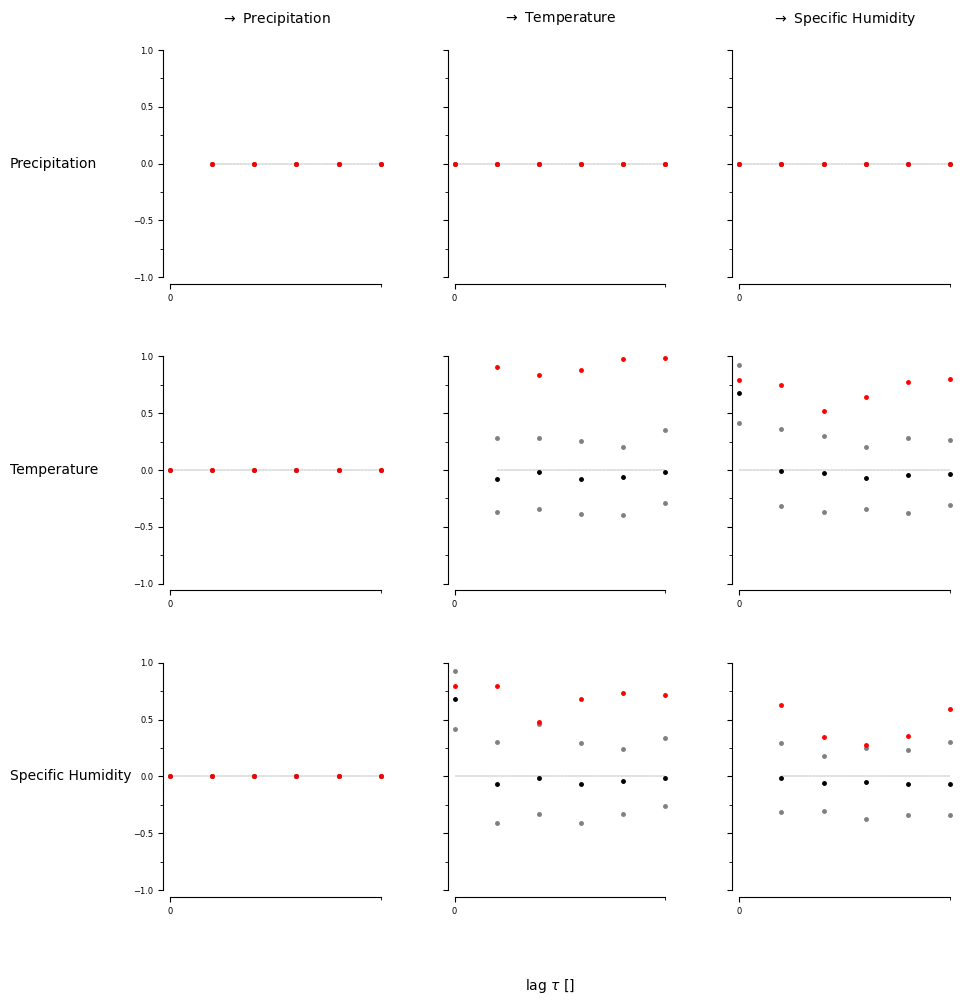

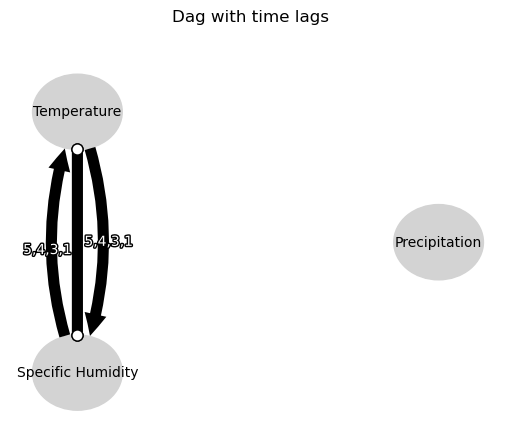

Negative precipitation values: 0


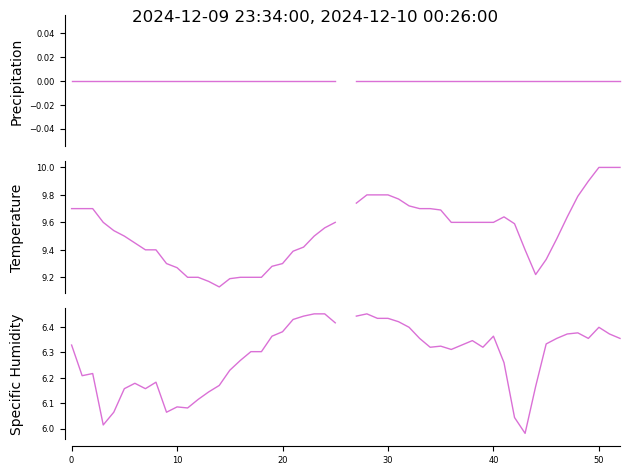

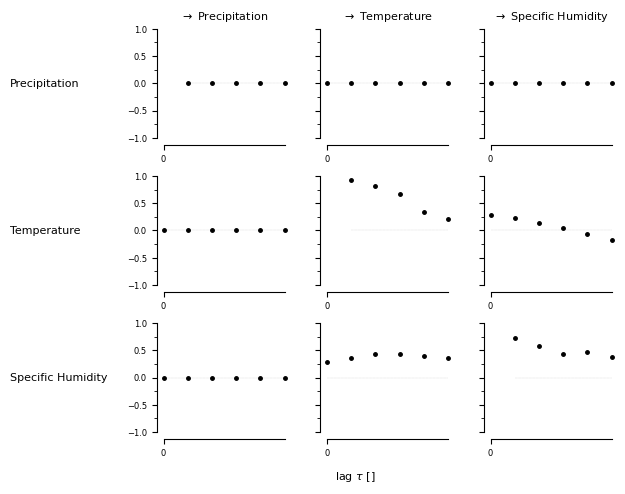

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


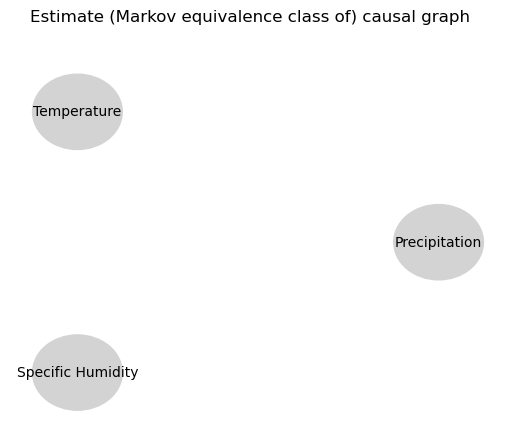

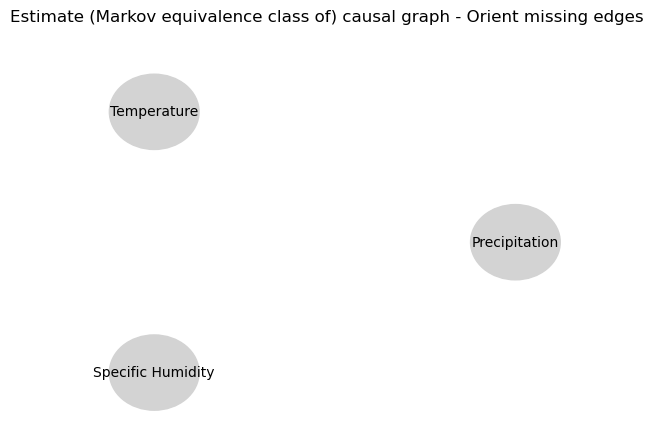

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7288791792724113
0.6192708120062574
0.5266366384607413
0.46426849235928036
0.40114833262751437
0.283630459773079
0.19710298263835388
0.1528031715499048
0.10433252021802077
0.08432737263132985
0.05820887471670156
0.283630459773079
0.22399696409195752
0.1938813667631954
0.16554771625642875
0.1760893133911854
0.17784933677137815
0.0
0.6715580371182639
0.4975226824749197
0.377638058918092
0.291017584354635
0.24098310495874176


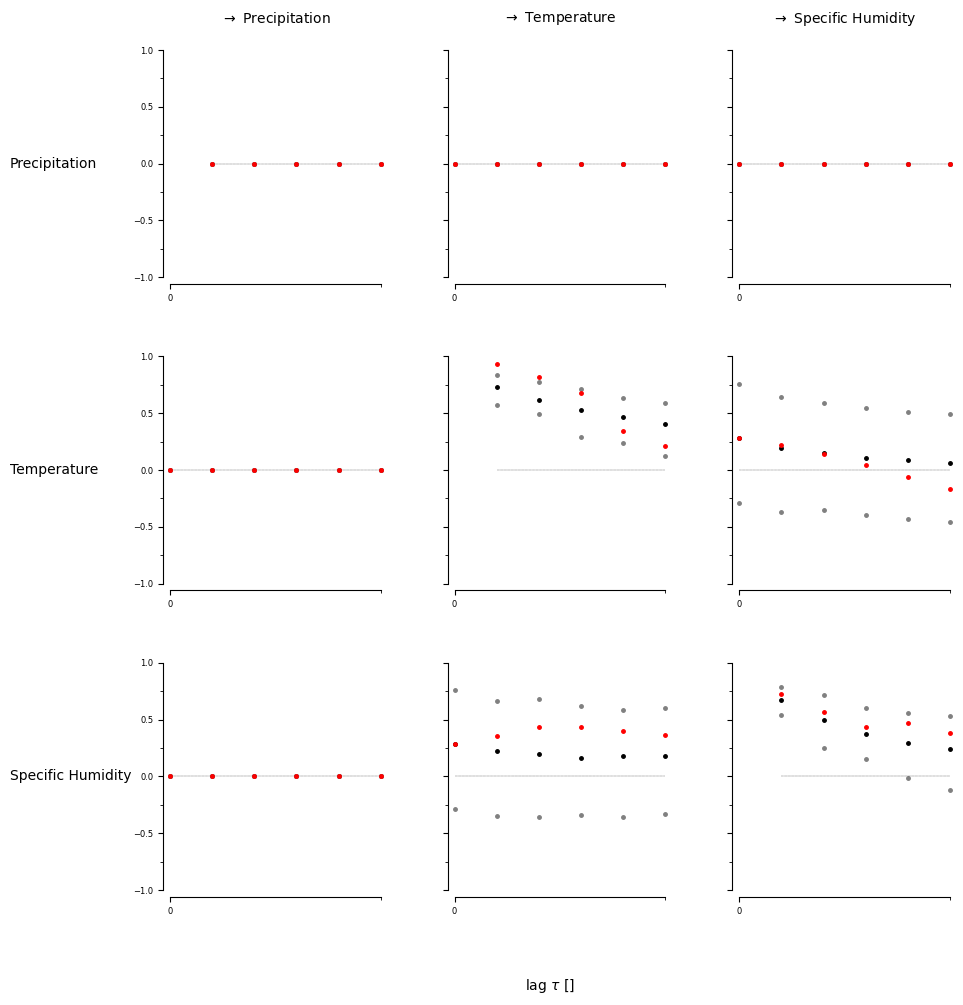

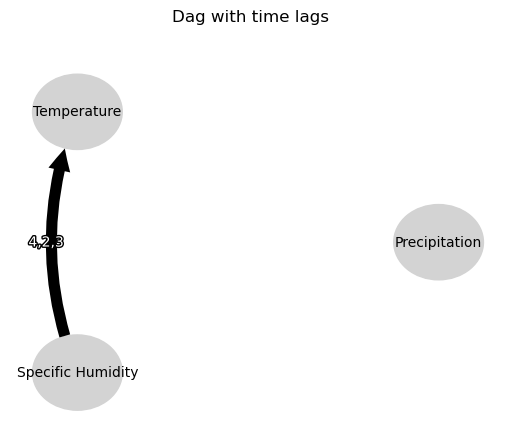

Negative precipitation values: 0


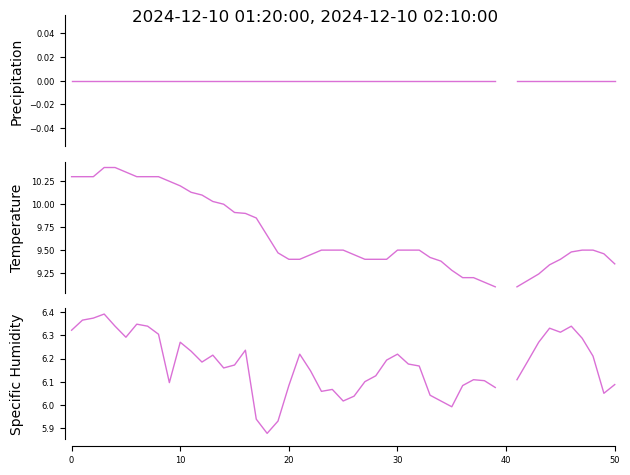

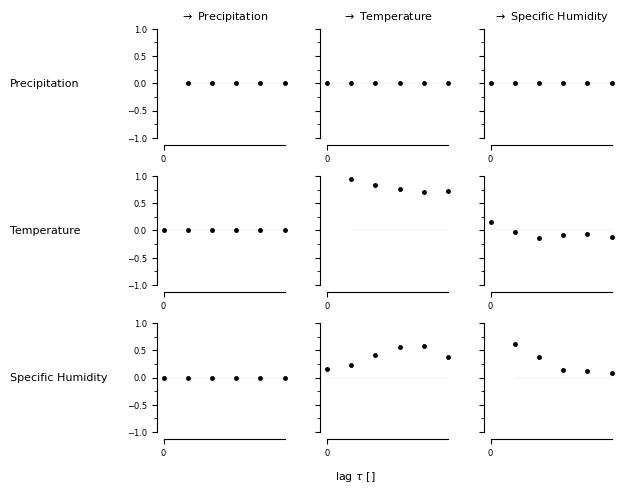

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


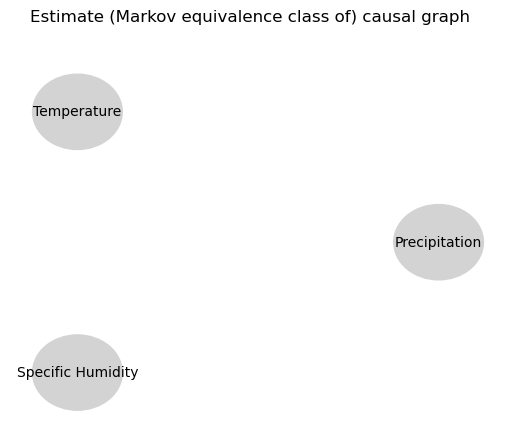

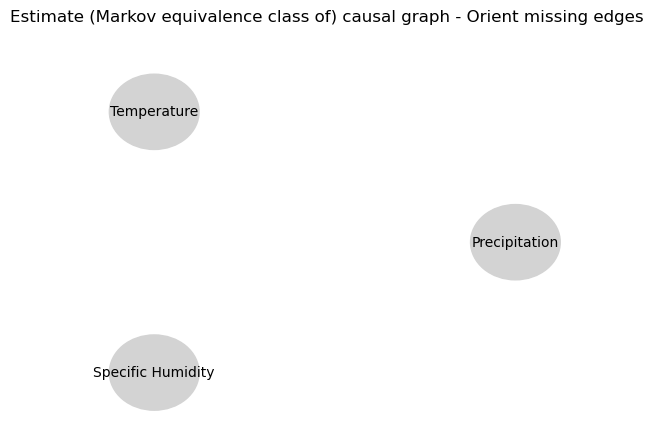

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.701990212640704
0.5768624237403944
0.45355489765069046
0.364467356150429
0.2981136513183533
0.21968794980353906
0.10741202172812195
0.06251341323996801
0.011638635364591386
-0.017802406035069825
-0.044309765318309255
0.21968794980353906
0.14996332521178649
0.1643124456001011
0.15310591281019234
0.1374840073647054
0.1100731933391169
0.0
0.5488316289603995
0.3277393182636614
0.1806007271900639
0.0990834005976963
0.04890473326545837


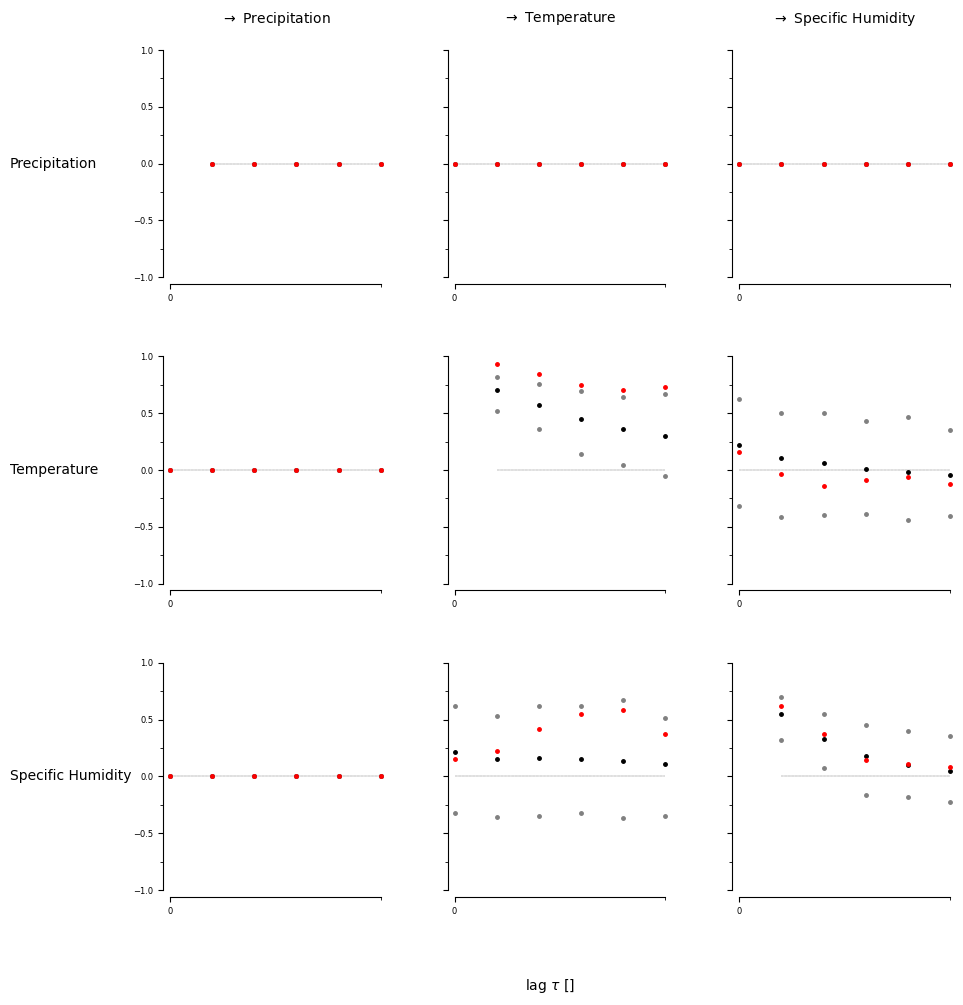

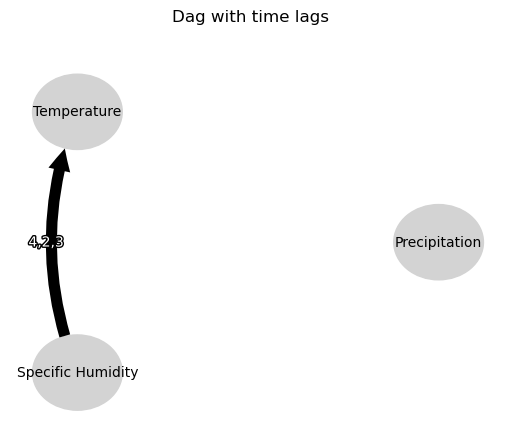

Negative precipitation values: 0


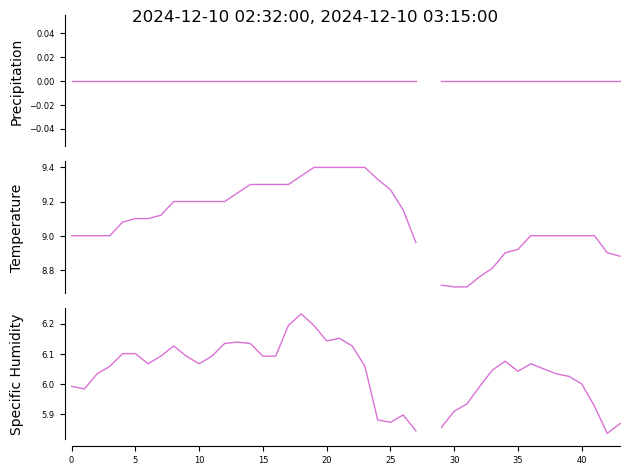

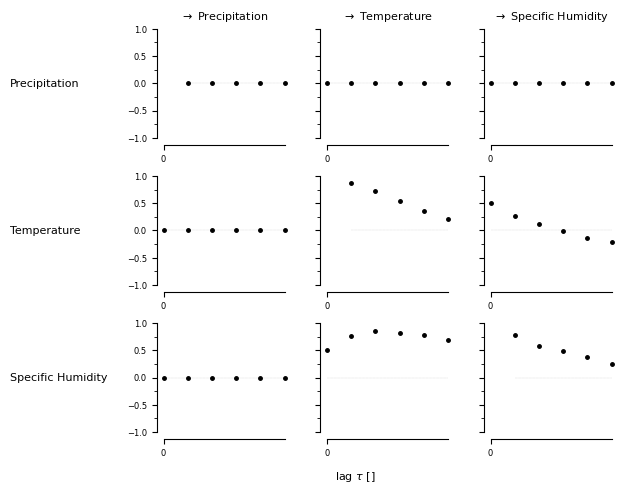

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


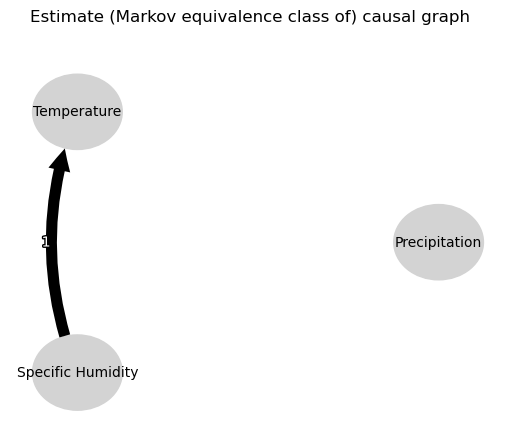

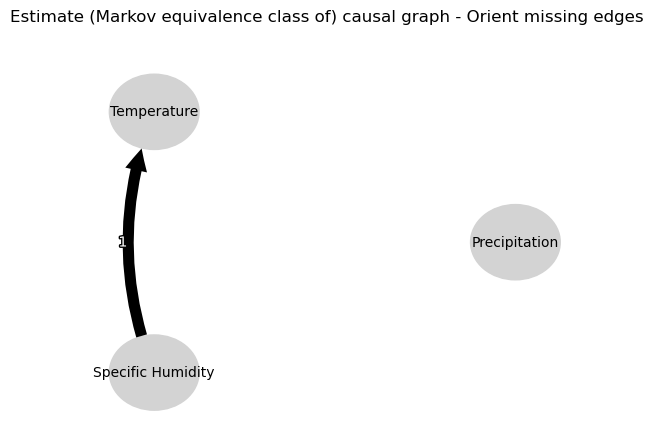

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.24185466148261217
0.2215603237258165
0.1684623001566252
0.1494659855870077
0.13067570205135606
0.36907257008750227
0.32368755743002
0.2662697417006397
0.21343947185822668
0.1653604672703136
0.10175561905226471
0.36907257008750227
0.5979046535379866
0.4601267527637642
0.37985706204732844
0.30610822097265095
0.22747713324522892
0.0
0.6442182860440289
0.46469778222104424
0.3534364812158566
0.2650836509966029
0.20539300451407033


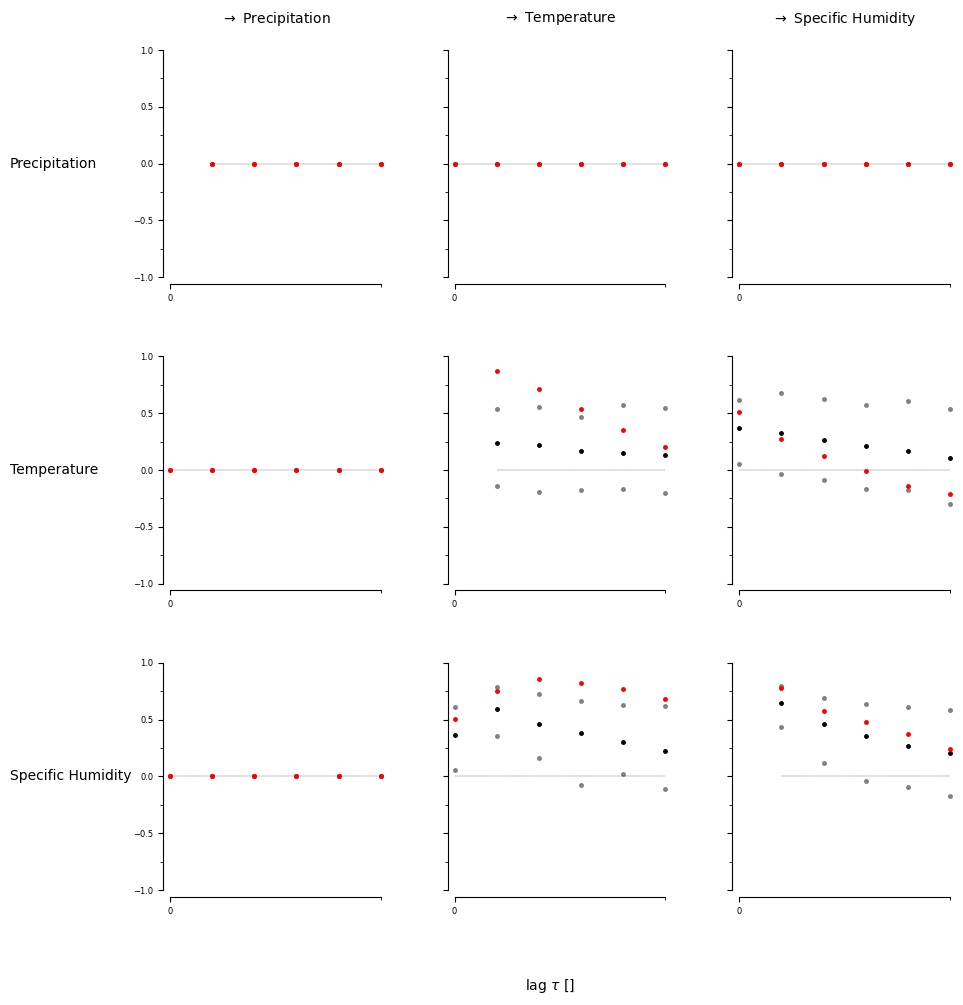

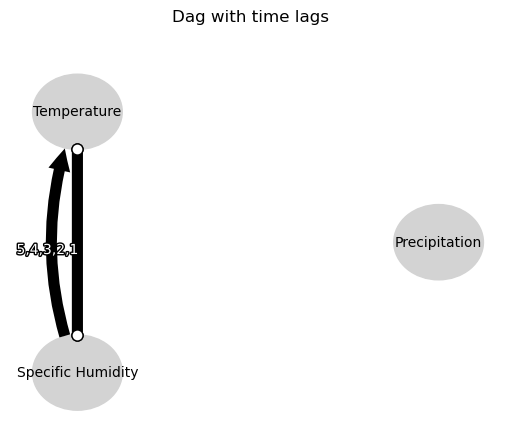

Negative precipitation values: 0


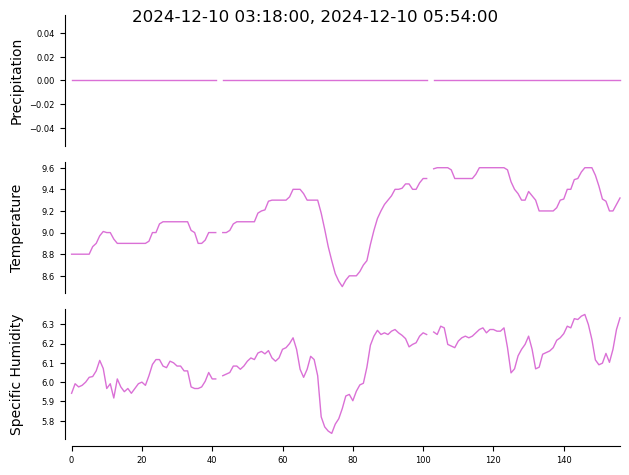

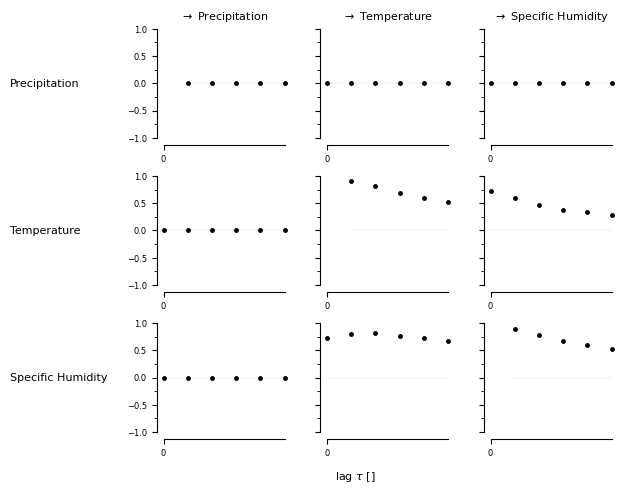

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


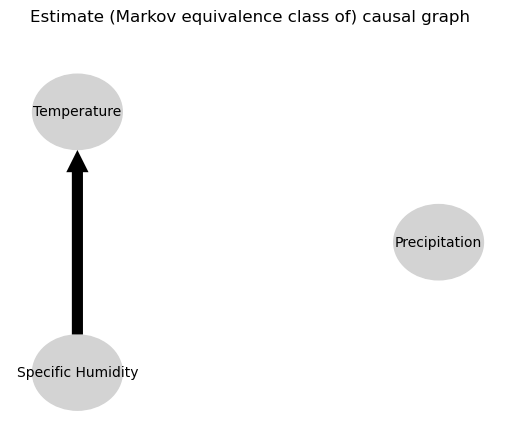

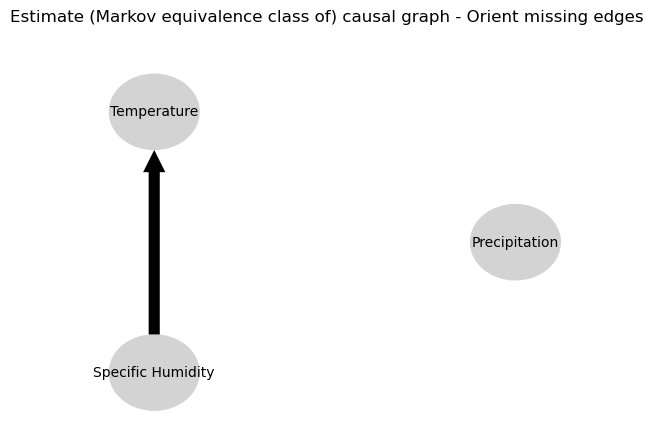

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9445872290143339
0.8999381028304347
0.8514545914815105
0.8001882360306755
0.7460717227582078
0.7983840299014864
0.7106424084726849
0.6381845821082086
0.5734812309660196
0.517513430894705
0.4669249516956176
0.7983840299014864
0.8550453206199577
0.8752107031089367
0.8733160536269255
0.8572675607518323
0.8267761168236443
0.0
0.8765402468437182
0.7980119201076152
0.7253361873227749
0.661511181323941
0.6042658791822993


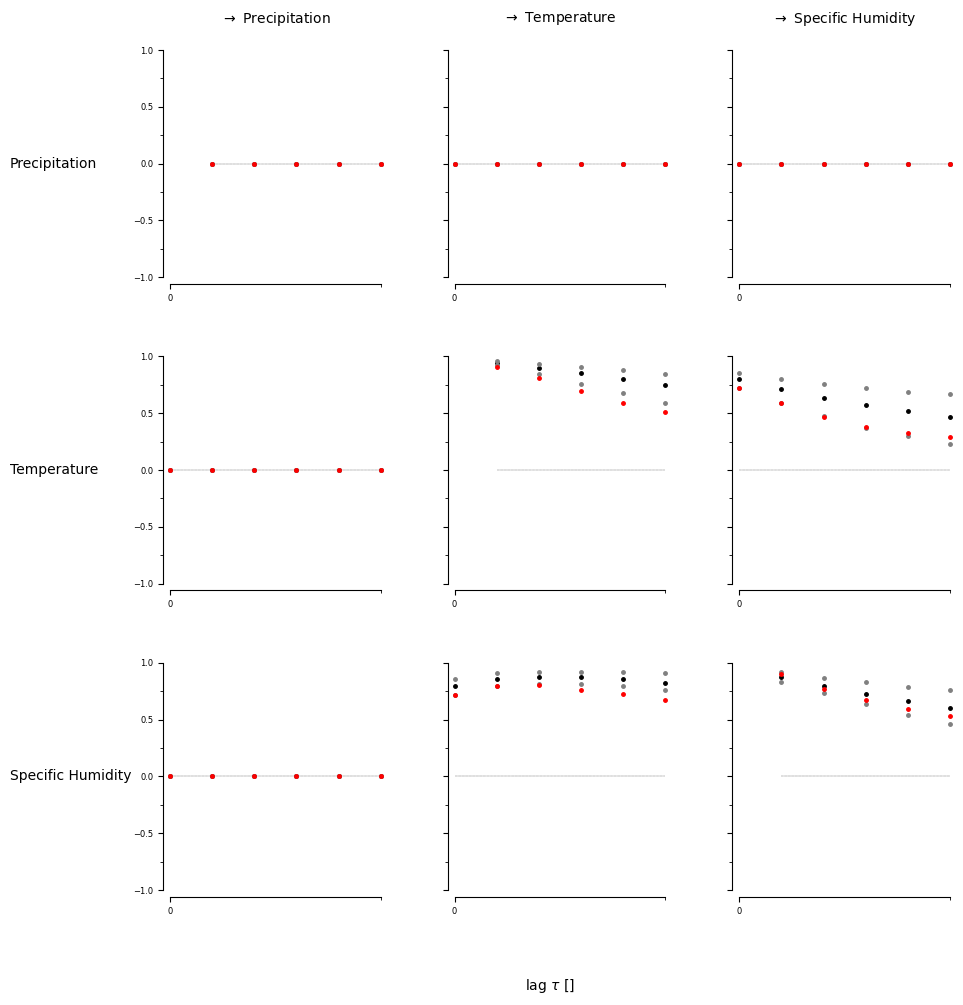

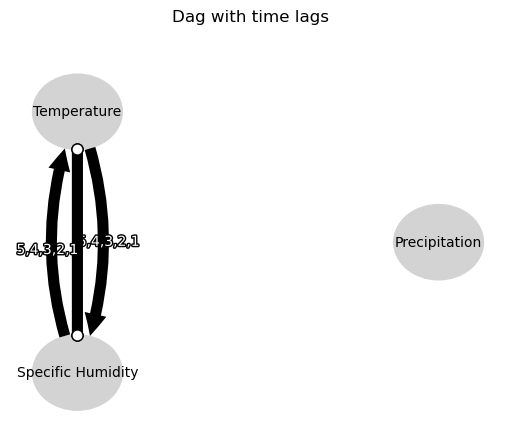

Negative precipitation values: 0


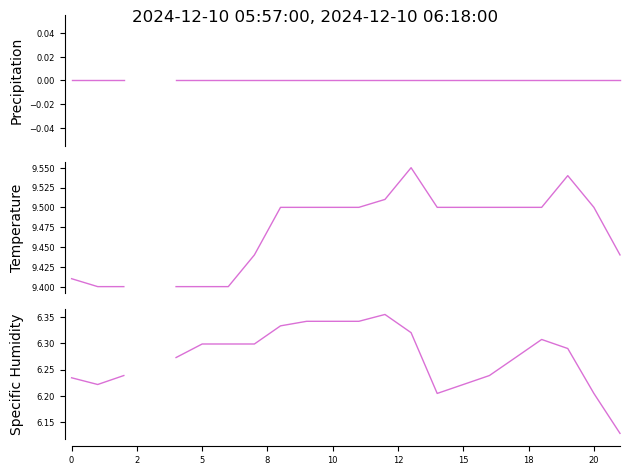

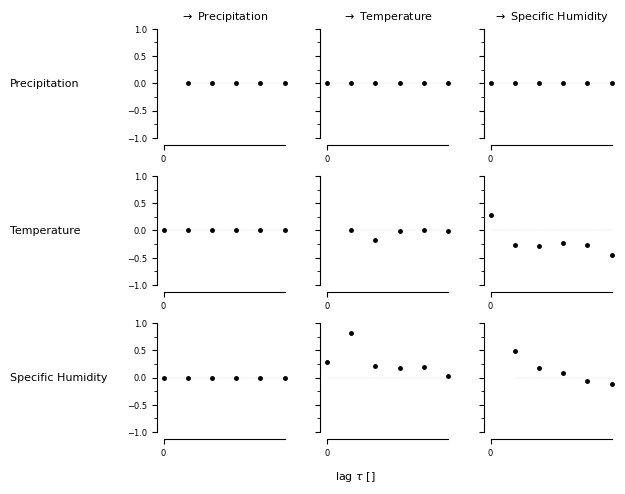

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


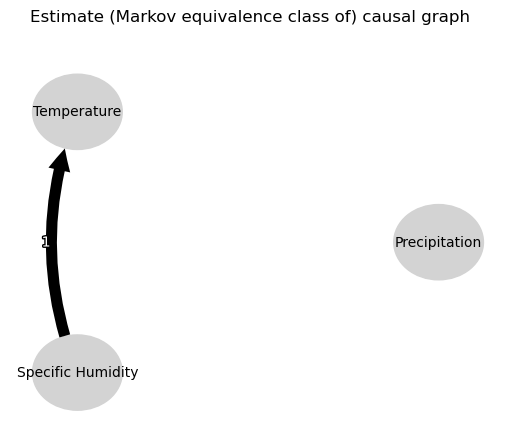

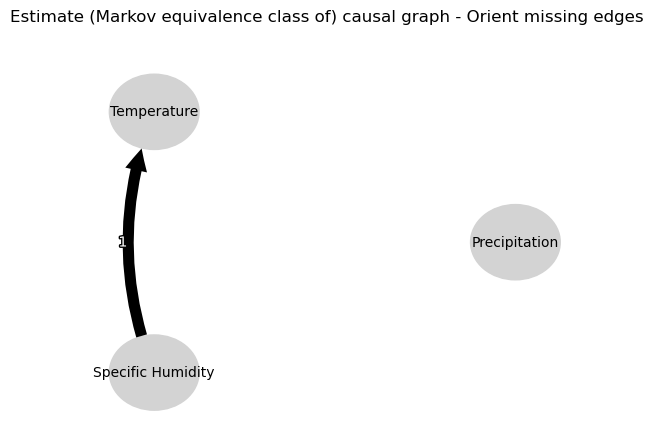

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.10727399205286632
-0.07033983851267463
-0.06837681251482933
-0.026722677591044155
-0.0302282865287391
-0.04833943289724986
-0.00961660632115071
-0.015628215792745603
0.01953440445498103
-0.08819854838492408
-0.050108228740007074
-0.04833943289724986
0.21385296544821142
-0.06837320302657682
0.020438805604155178
-0.08006017949314881
0.051409211358472165
0.0
-0.07912386038169361
-0.10148523820976324
-0.10573475690775506
-0.017562304875910636
-0.07596908988012516


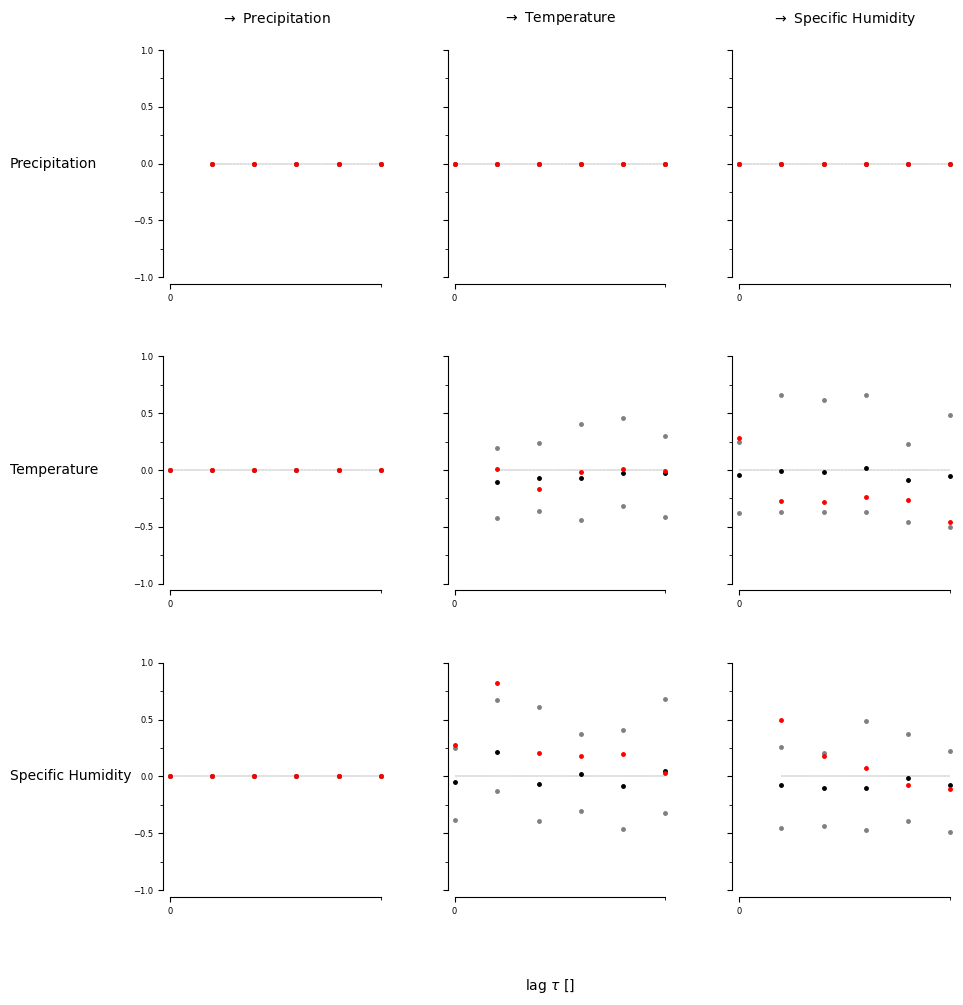

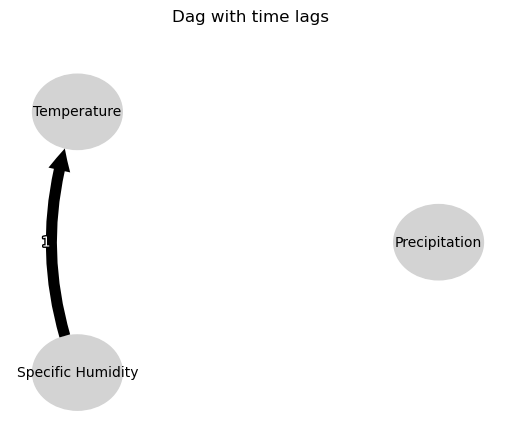

Negative precipitation values: 0


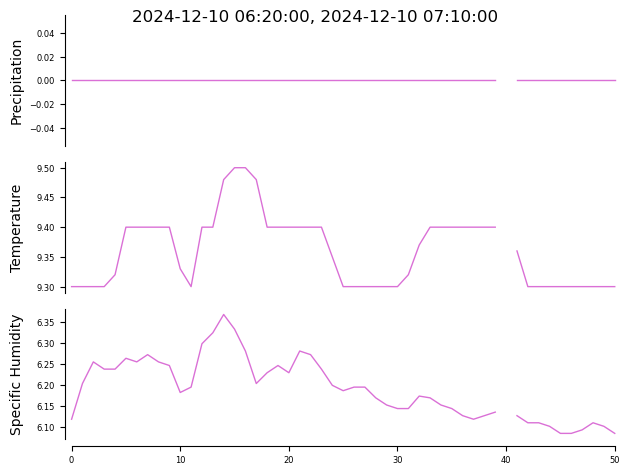

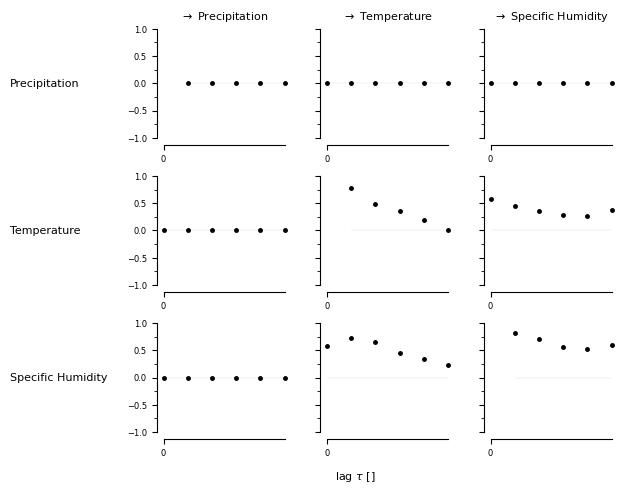

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


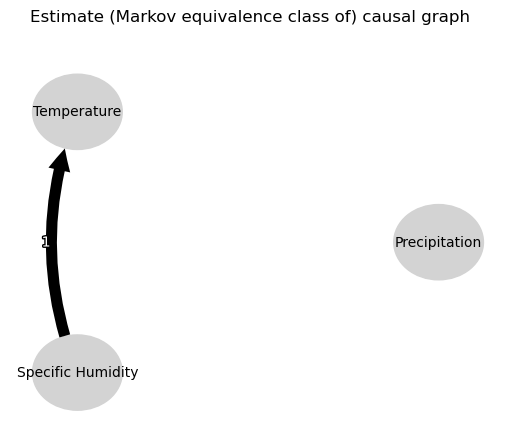

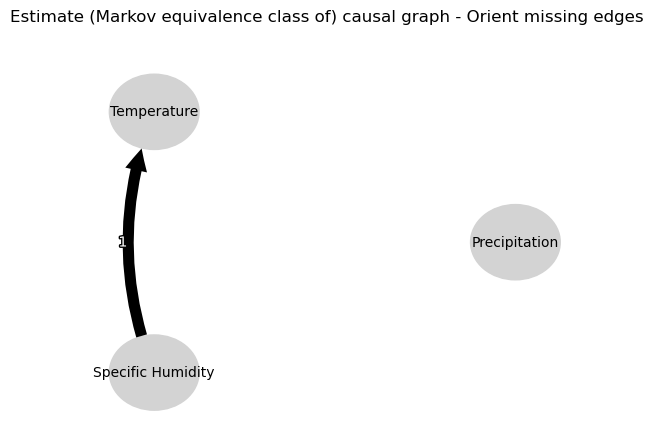

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6570254051831214
0.48903683909507967
0.3671405231283581
0.2811418767225532
0.2194097973322889
0.6459265726689155
0.5158829604682029
0.41468865505867464
0.3292033179226306
0.26750688515233395
0.20652078780812963
0.6459265726689155
0.5812623641069891
0.5279205672267272
0.4708555414969257
0.4146210298110759
0.3452384064636461
0.0
0.7082198171245662
0.5724360620374361
0.4614264215543563
0.38145597467485287
0.3028874783346271


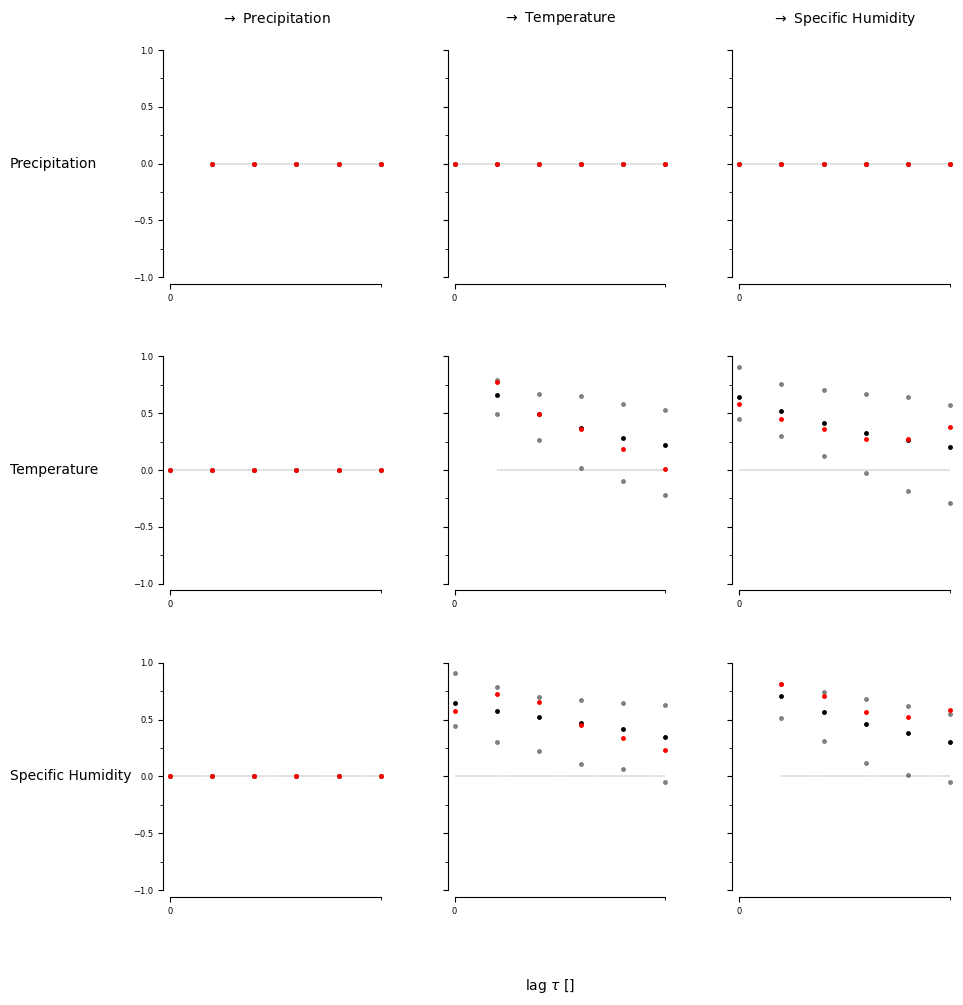

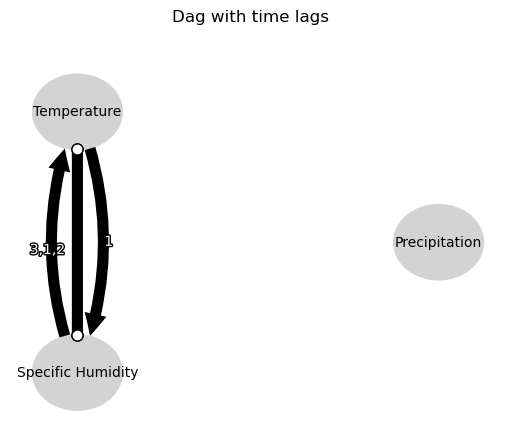

Negative precipitation values: 0


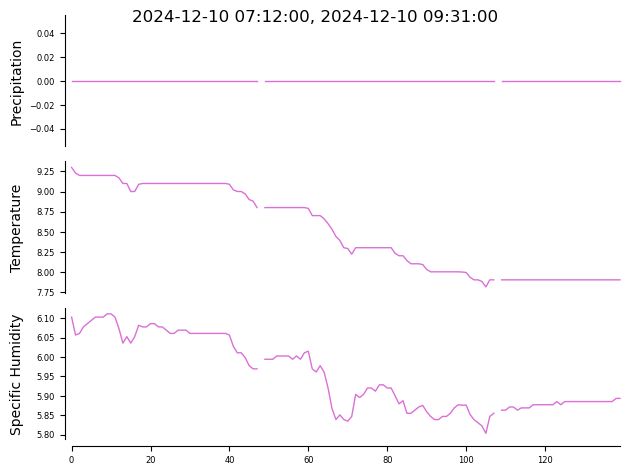

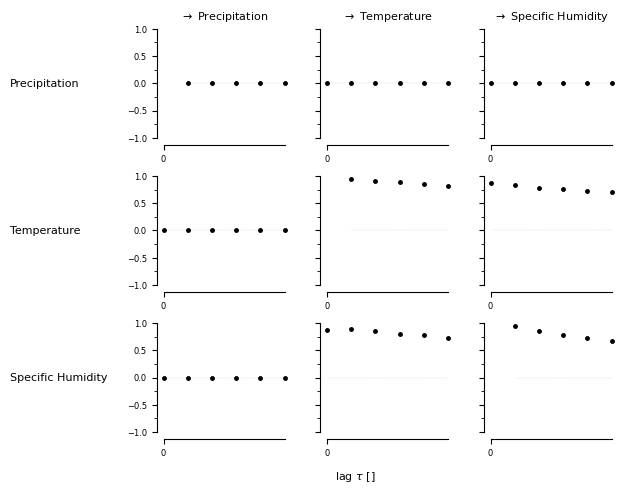

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


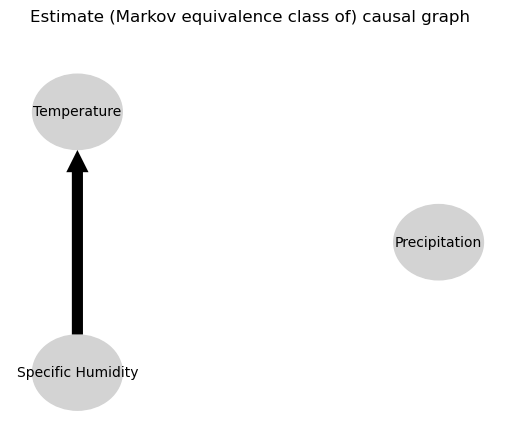

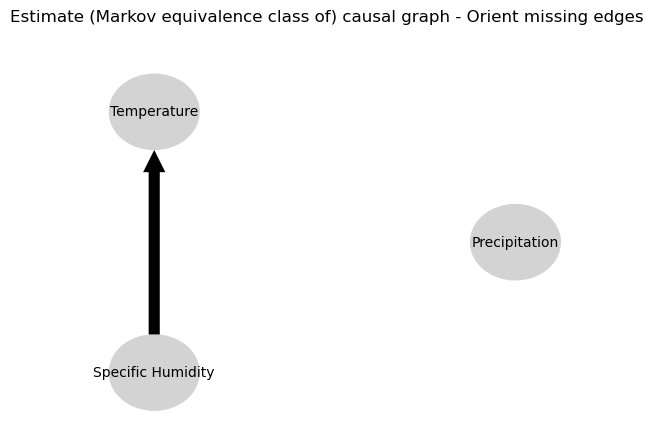

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9401502128295884
0.9090408432516823
0.8744419673583568
0.8376436267362702
0.8001312890099981
0.8121858586758797
0.7345948374829925
0.6682782515192103
0.6094817853341354
0.558137881510842
0.5106188548229905
0.8121858586758797
0.8337582689276236
0.8463999392702636
0.8492464901323993
0.8421805144225797
0.8280843100170512
0.0
0.9080219316553618
0.8347305531484634
0.7682803524411324
0.7088281153636339
0.6551095369617415


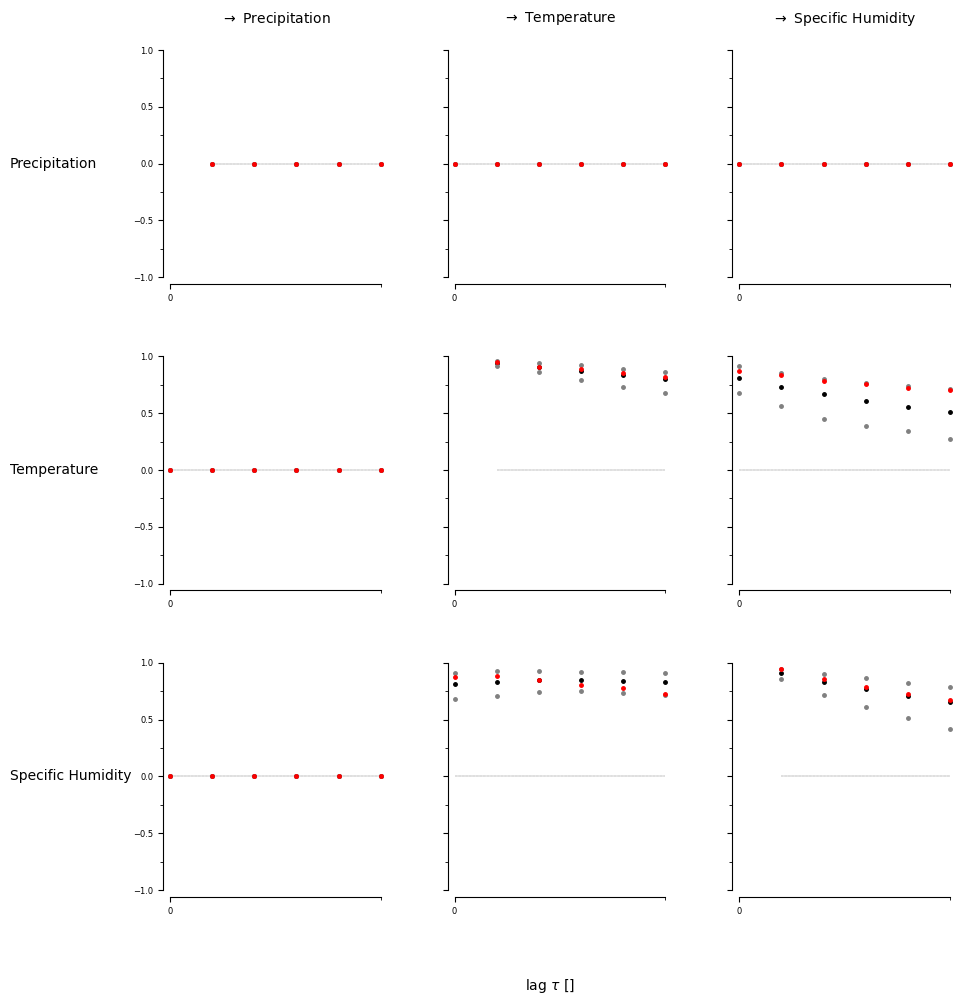

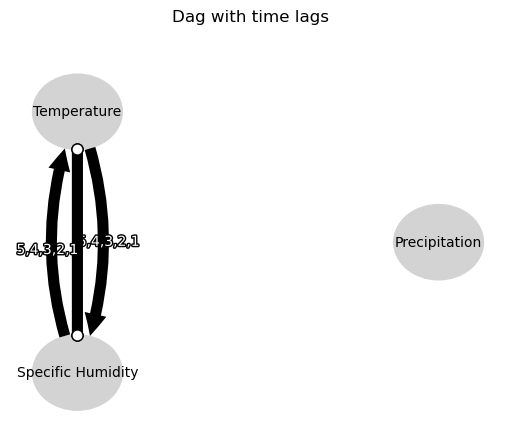

Negative precipitation values: 0


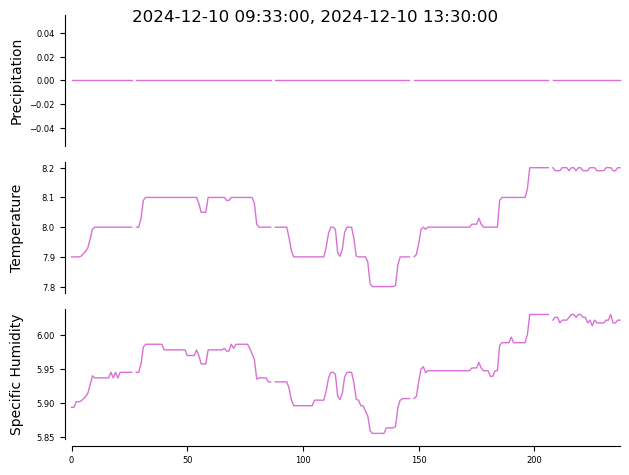

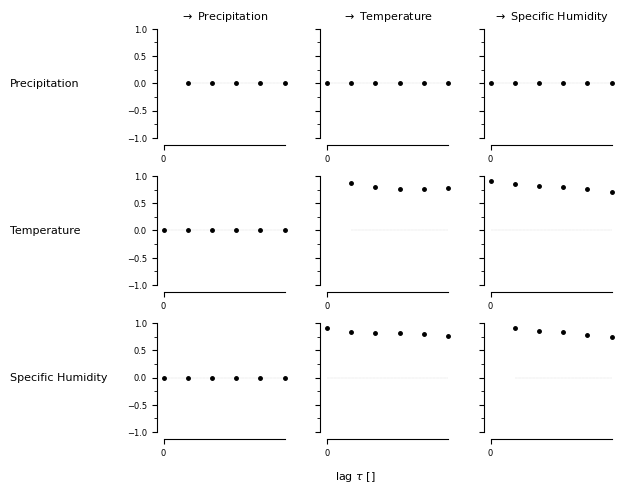

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


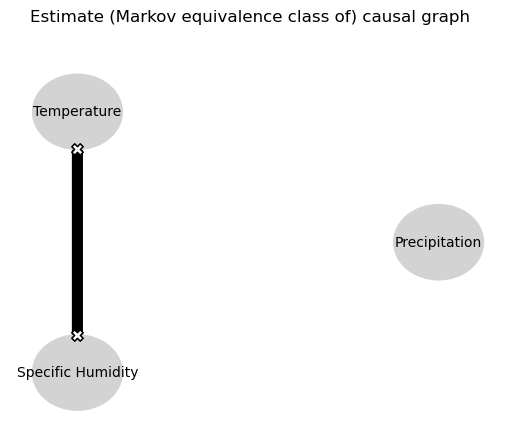

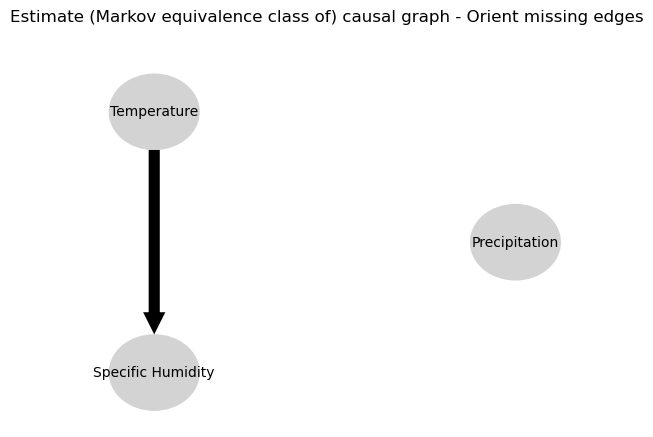

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9349741571832868
0.8939993672106038
0.8547133155370229
0.8197871887330431
0.7886331307788308
0.971124929042271
0.9214325510784509
0.8726184232727011
0.8208836728122987
0.781393060208167
0.749864630841314
0.971124929042271
0.9217735513928962
0.8817791419023168
0.8443694301785457
0.8126863894760166
0.7823295677236857
0.0
0.9226598249478762
0.8633384493403774
0.8065047231660923
0.7691782285505663
0.7420153443931219


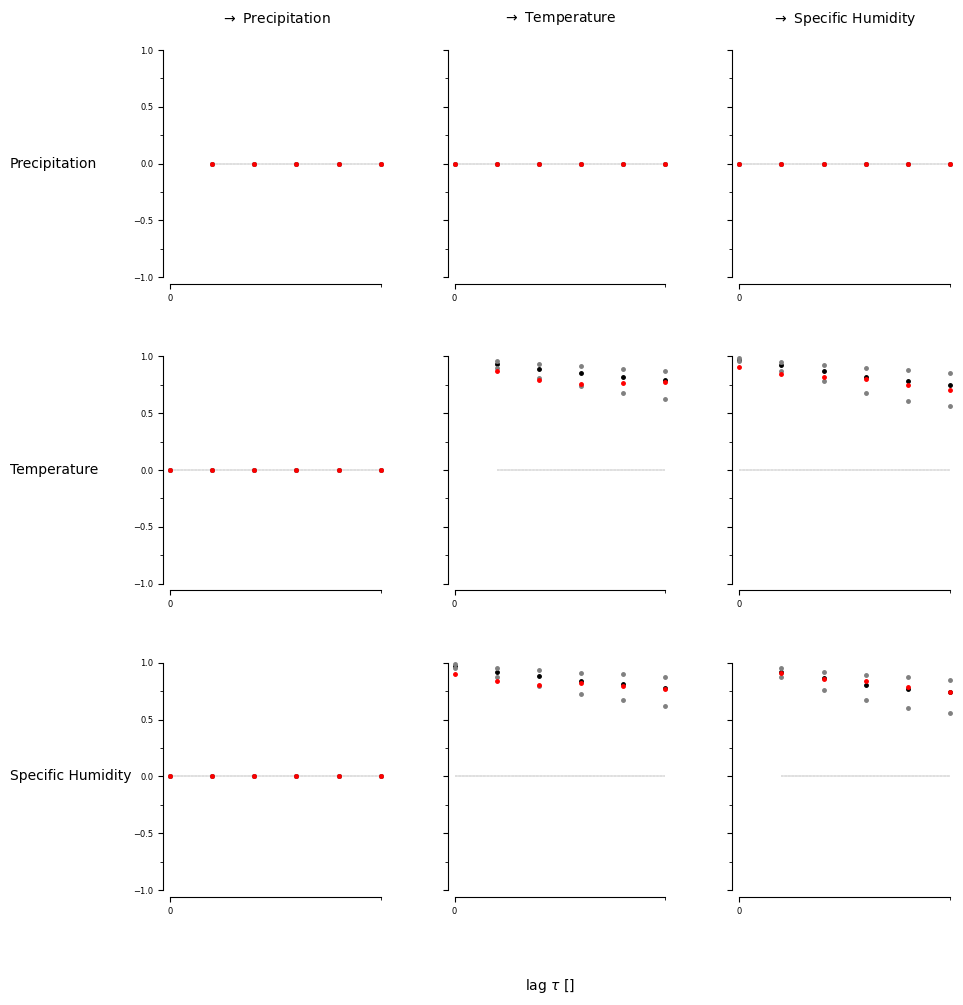

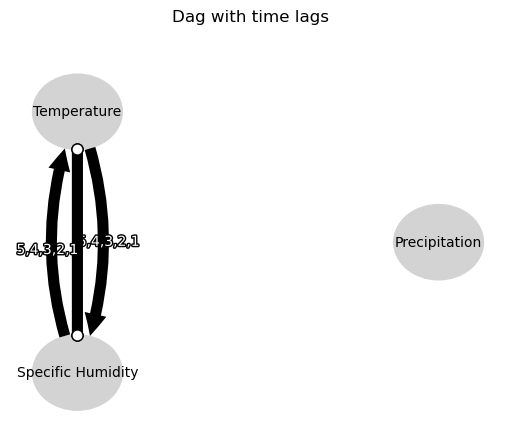

Negative precipitation values: 0


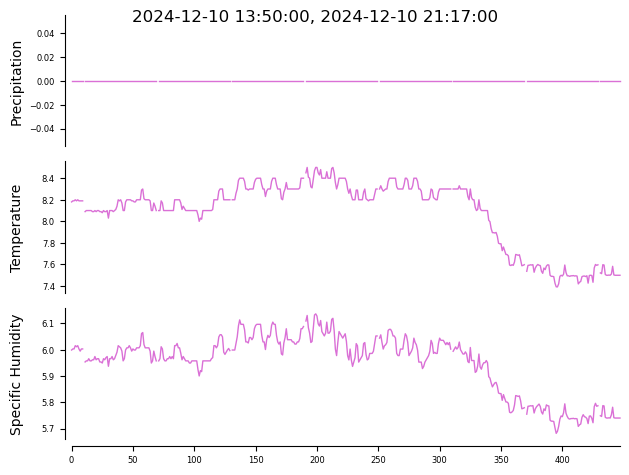

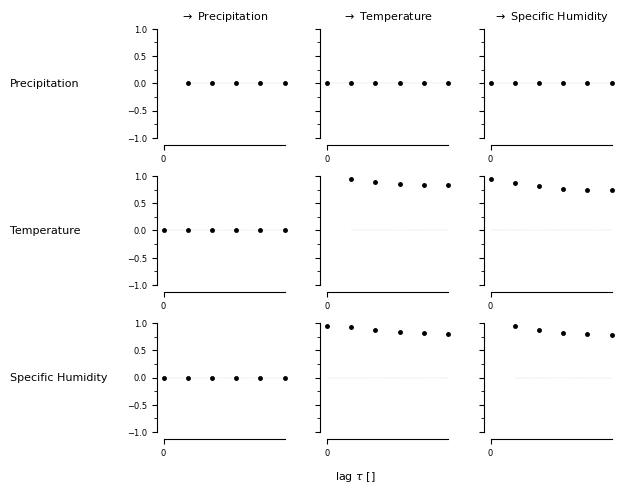

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


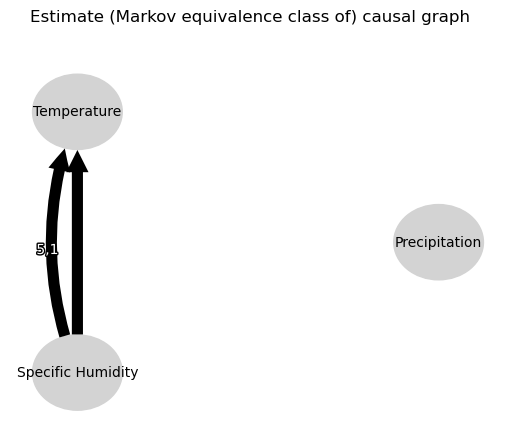

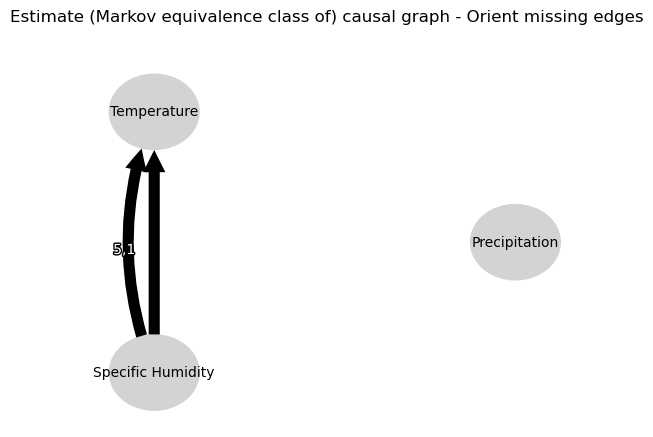

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9755622315739579
0.9534423283169366
0.9317542114510025
0.9094139162386319
0.8870288670875367
0.9669706643838382
0.9298812058385711
0.894033751192742
0.8614497347989092
0.8305828013966773
0.8015013523009098
0.9669706643838382
0.9550029221570601
0.9394135627082109
0.9233749107421076
0.9052092075194796
0.8856857202867517
0.0
0.9628874584954352
0.9271507649684416
0.8946765722523555
0.8641012307119333
0.8353595442188029


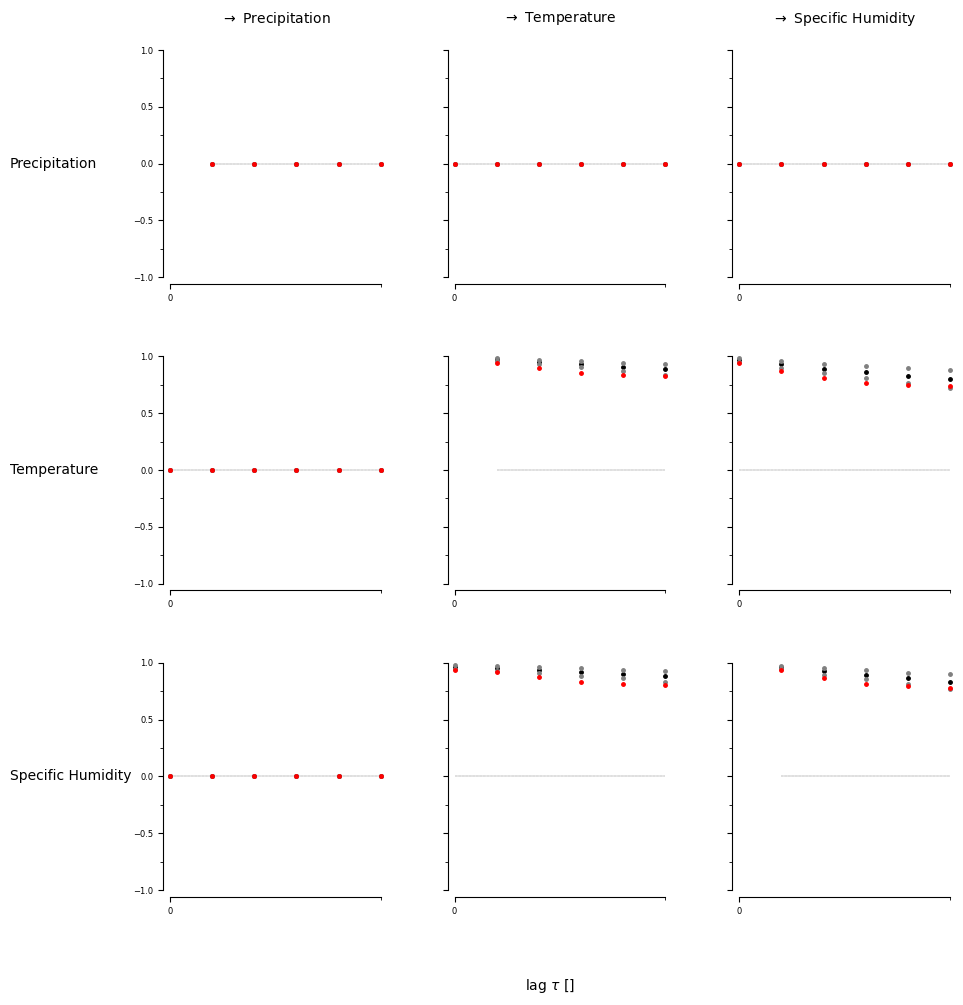

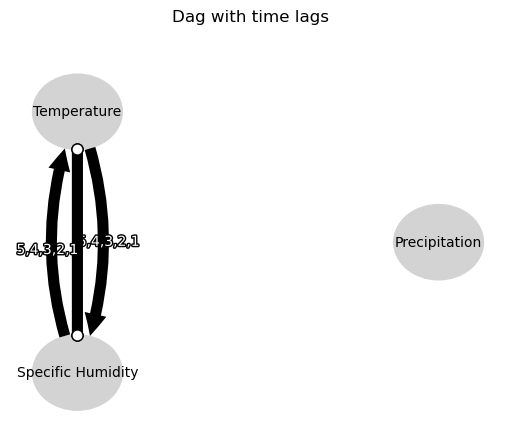

Negative precipitation values: 0


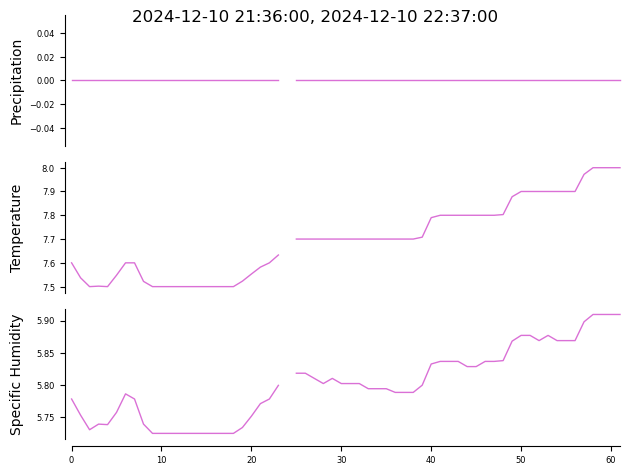

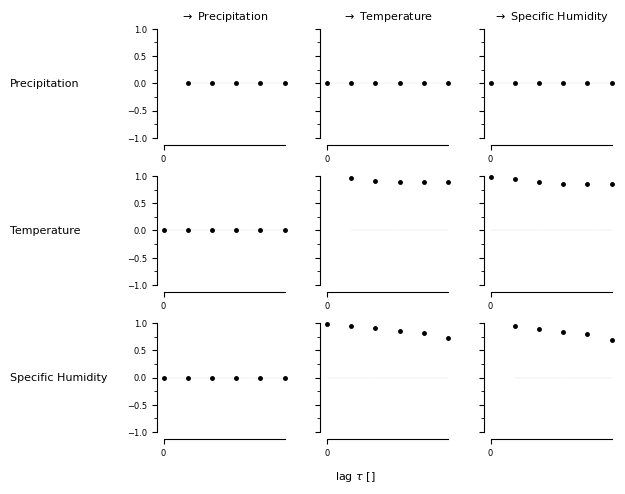

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


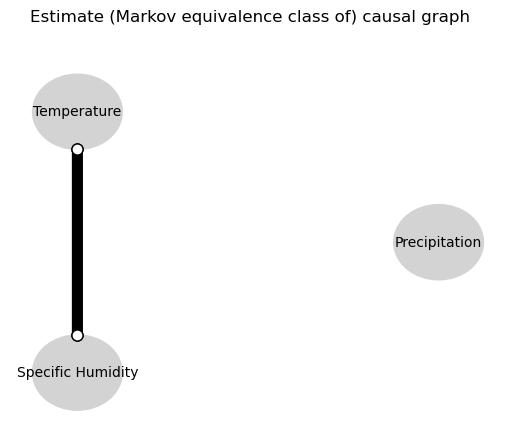

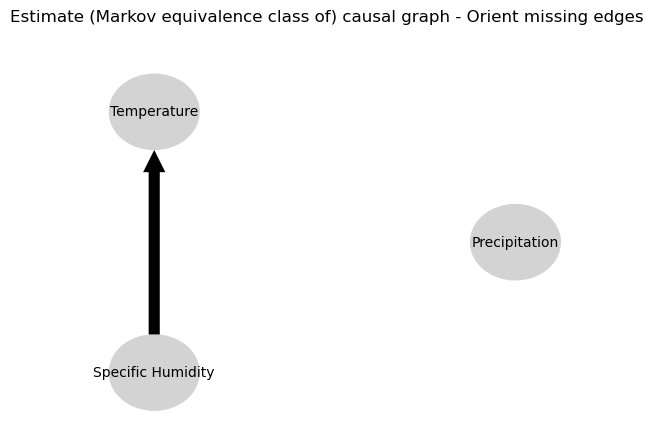

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.06284401656567119
-0.031112519733221246
-0.03243581293976216
0.002810688491514848
-0.006743008796365133
0.969721558460883
-0.06044517398513896
-0.029833871208963907
-0.0375776105005499
0.00500245011739257
-0.01370639993994819
0.969721558460883
-0.06380319354666925
-0.038006533744525145
-0.025694090131567506
0.004094398425150244
-0.005563014967690603
0.0
-0.062073968109546816
-0.037705664665988674
-0.032453840954703224
0.003500049155736891
-0.011931680442055215


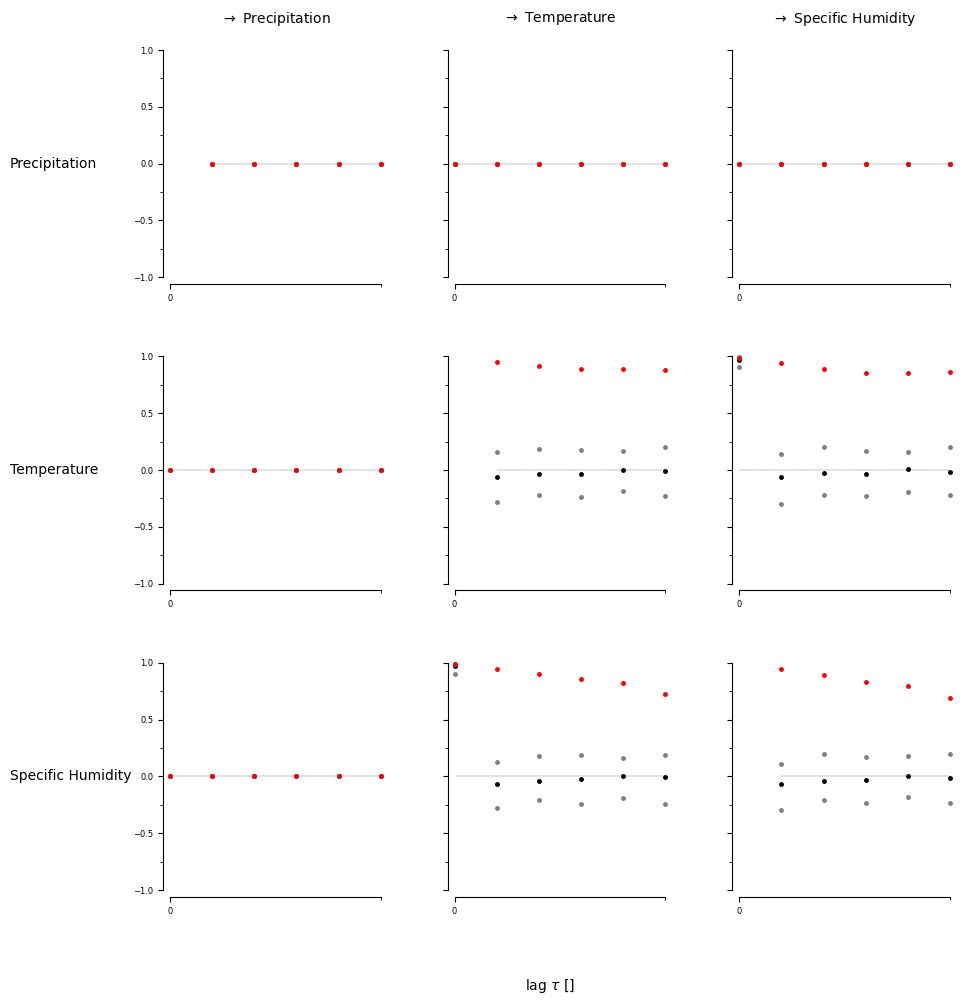

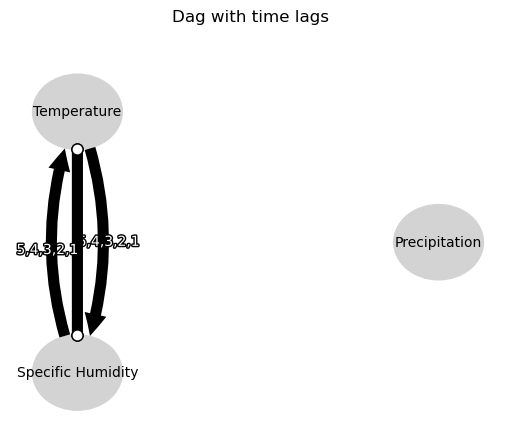

Negative precipitation values: 0


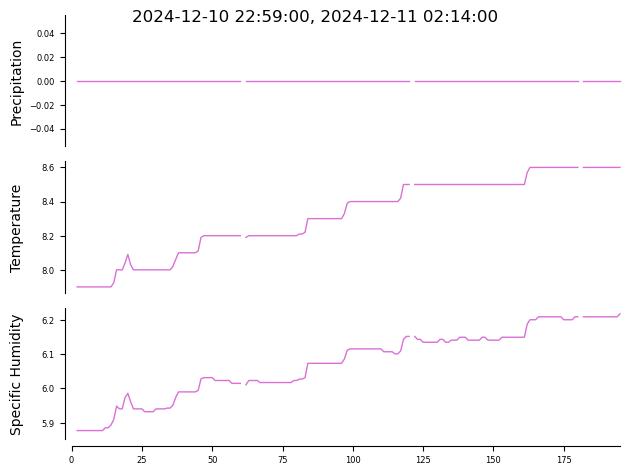

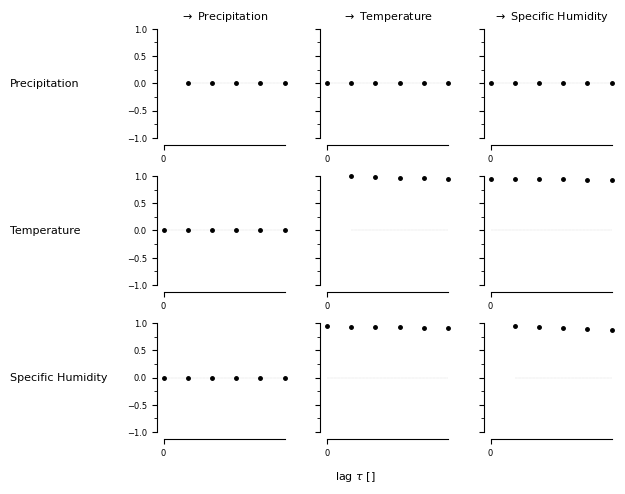

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


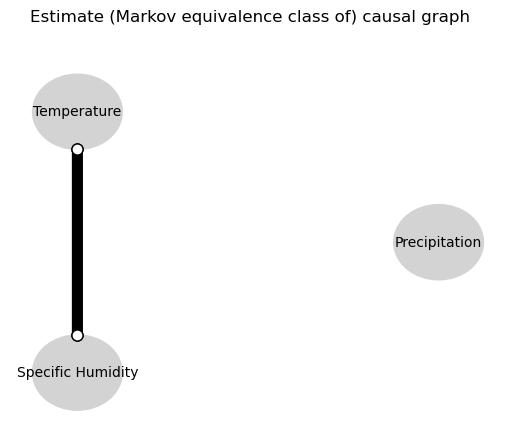

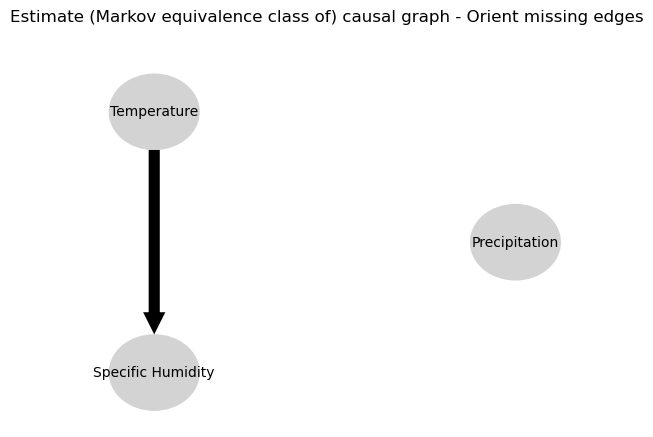

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9203551370465022
0.869898949812834
0.8245990222629155
0.7860125971744333
0.7501596672787927
0.955341569982803
0.8824214823272145
0.8342620044634437
0.7902268780263922
0.7507707502129323
0.7166915665707709
0.955341569982803
0.8984215359814314
0.8516770267323279
0.810874261937443
0.7743270709460055
0.7417503046235668
0.0
0.8918784962738588
0.8313354749636938
0.7825167151773984
0.741242051930181
0.7087610821762308


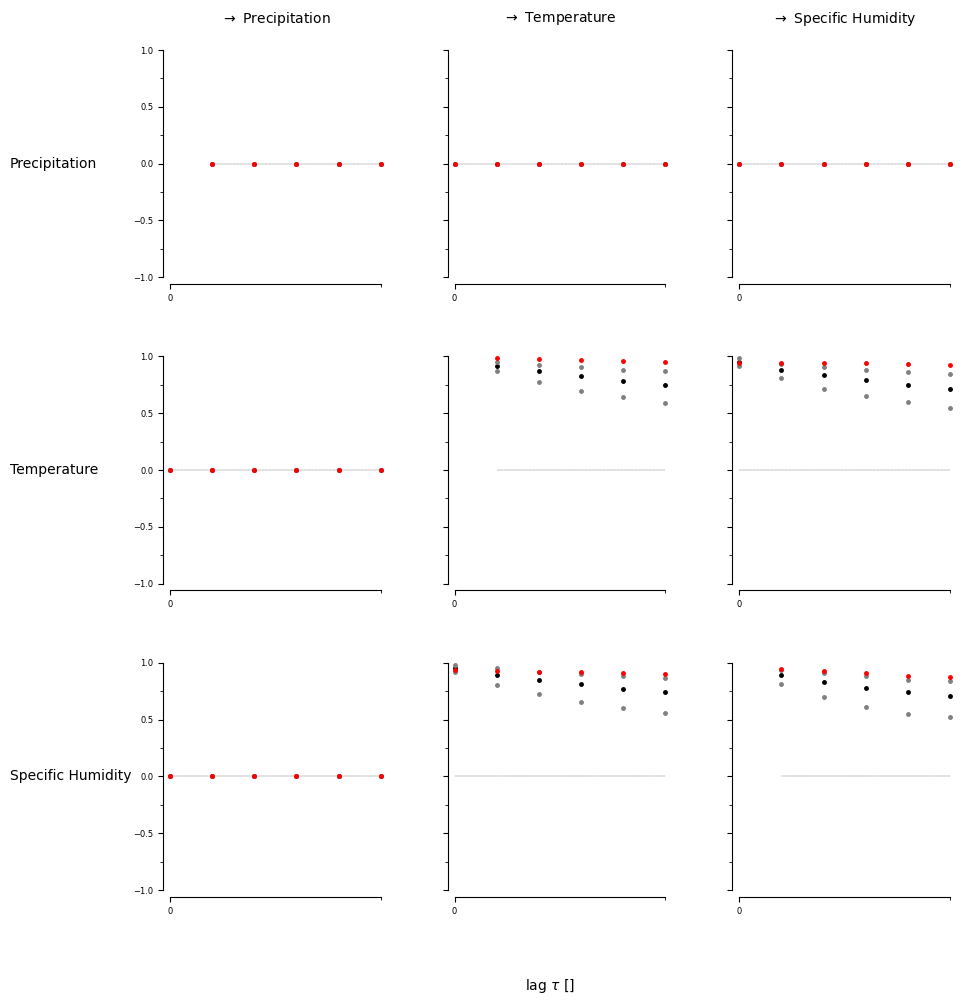

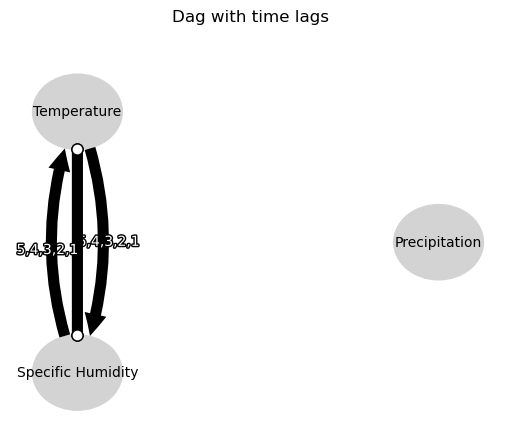

Negative precipitation values: 0


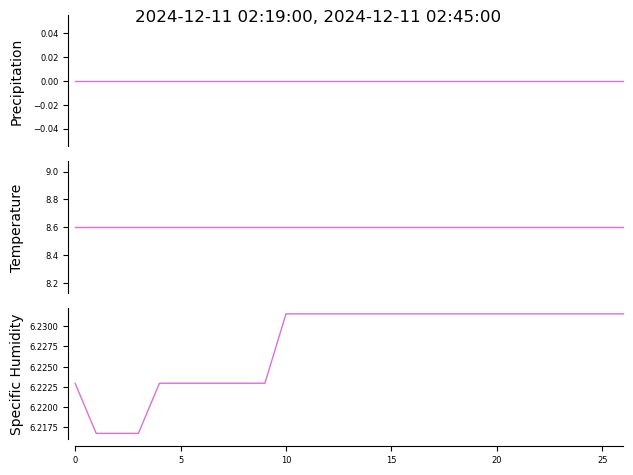

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


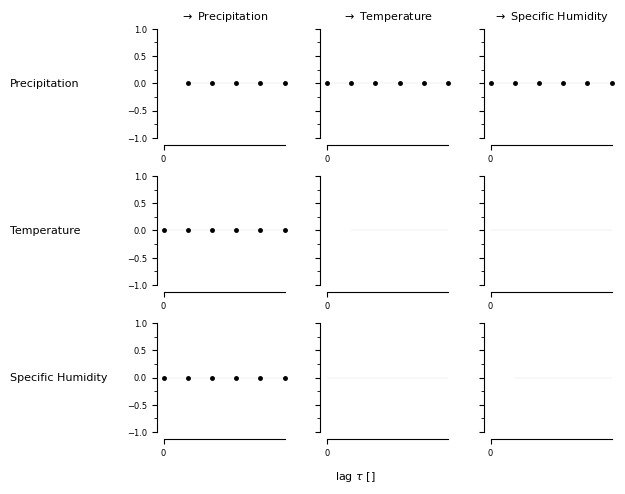

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


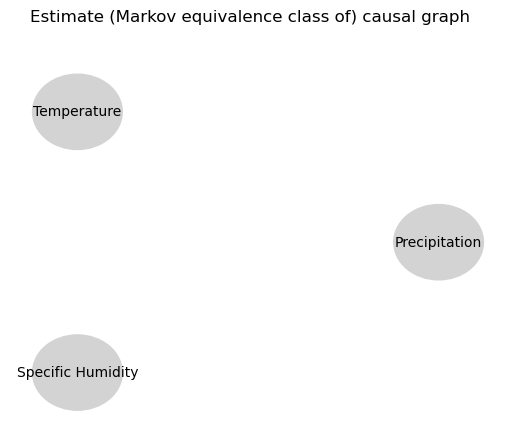

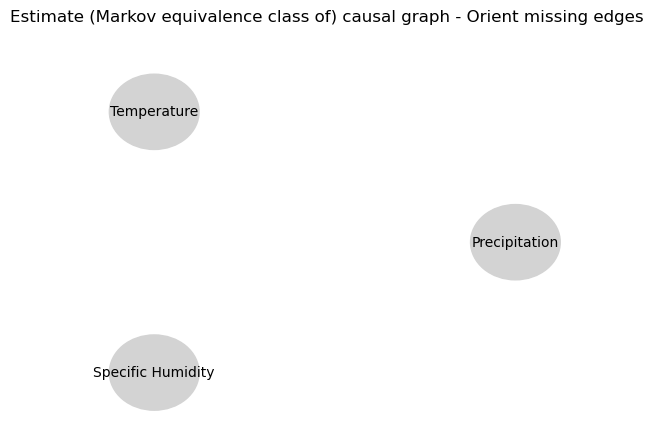

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.04493543657246764
-0.05796071641843584
-0.052050100678143495
-0.04889610516718907
-0.018770793212874712


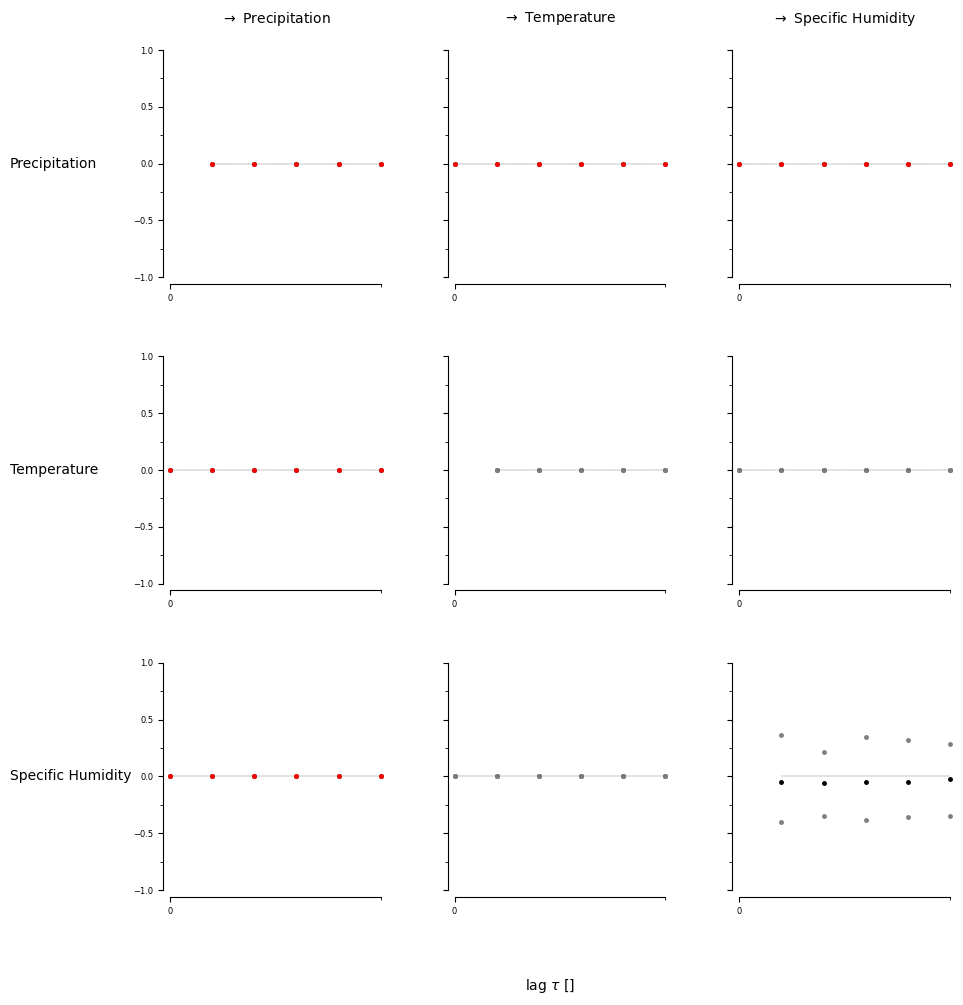

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


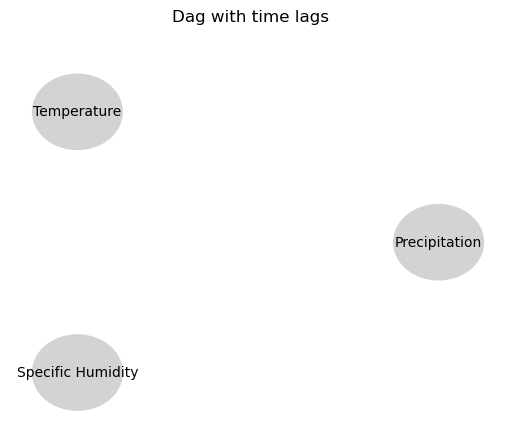

Negative precipitation values: 0


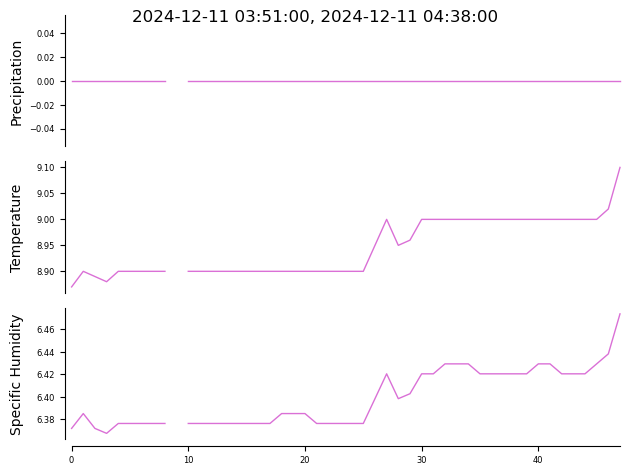

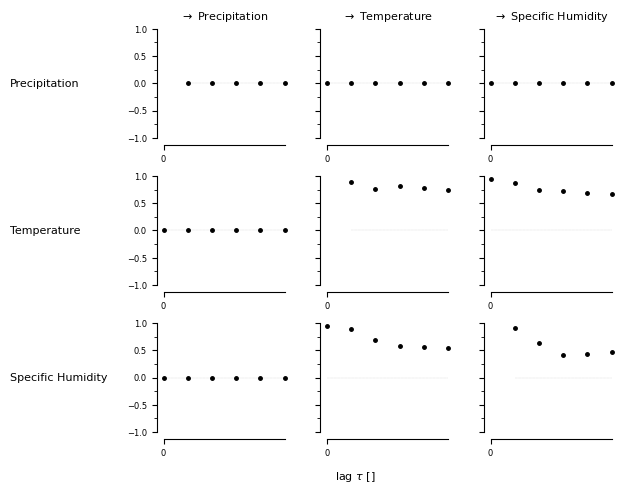

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


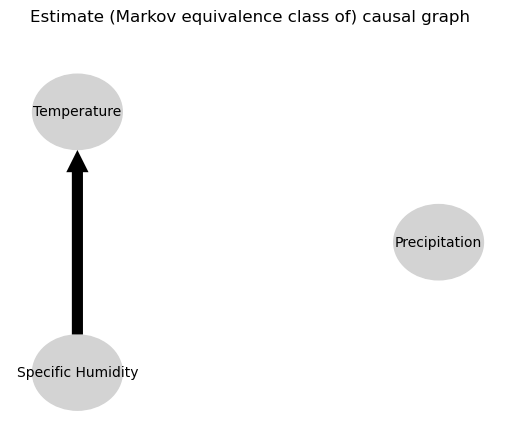

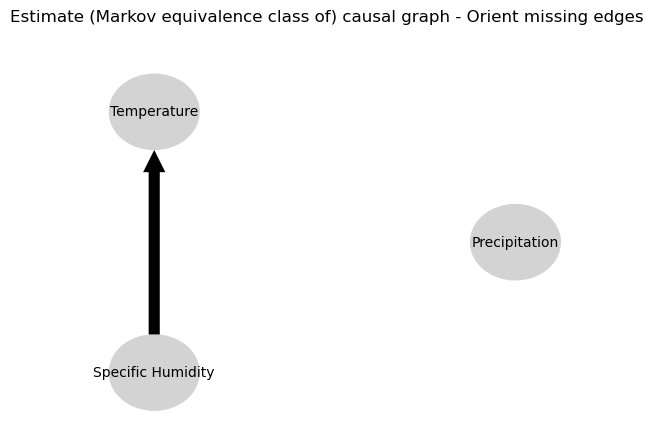

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7687857742831652
0.696080503680428
0.6788462363200335
0.6248335081146866
0.6008897189560954
0.9550288475771906
0.7824895185442321
0.7089069155225088
0.6815260323487727
0.6333975494900957
0.6065076456752043
0.9550288475771906
0.7907592187775616
0.7078892386127293
0.6870055247446624
0.6378463966293423
0.6094386520422314
0.0
0.7893864945833124
0.7163647208692551
0.6889351872241127
0.6440013211164773
0.6152720051689663


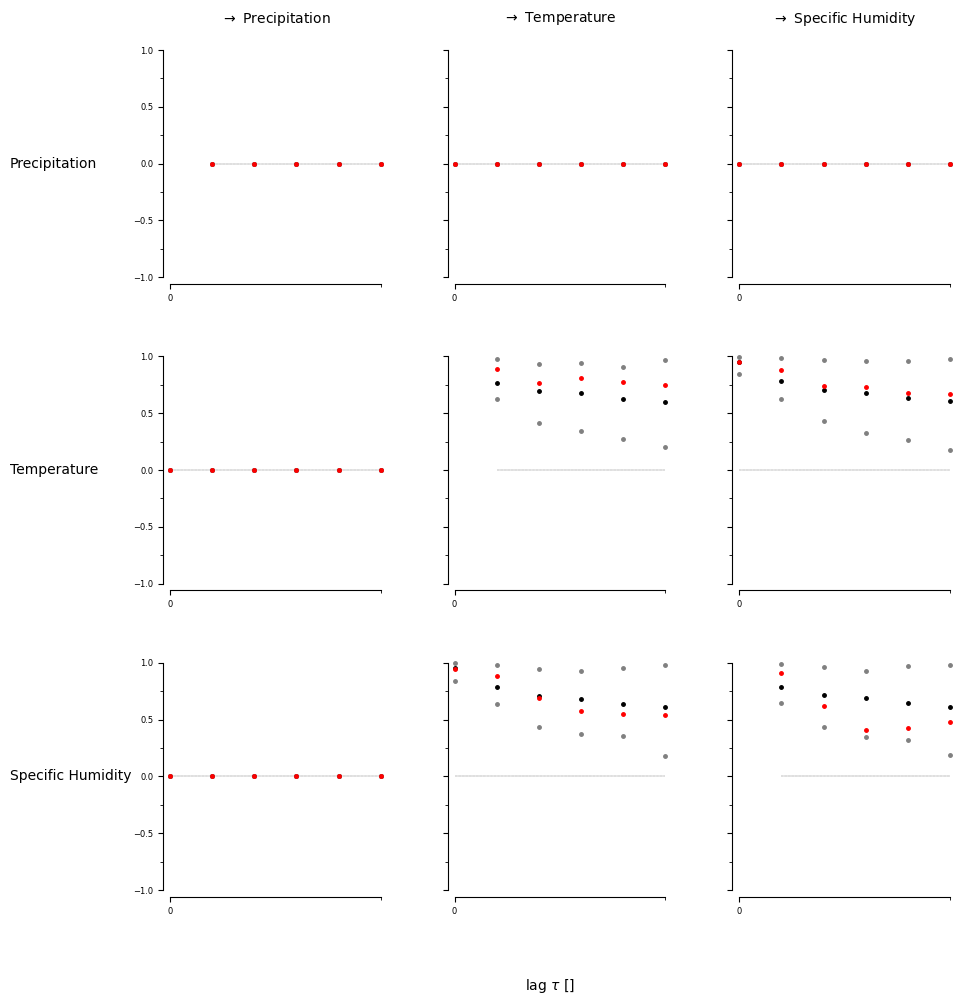

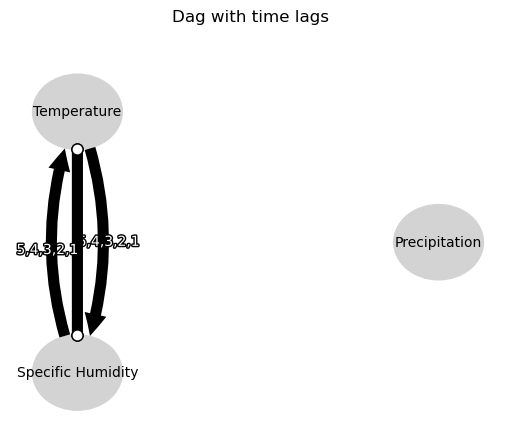

Negative precipitation values: 0


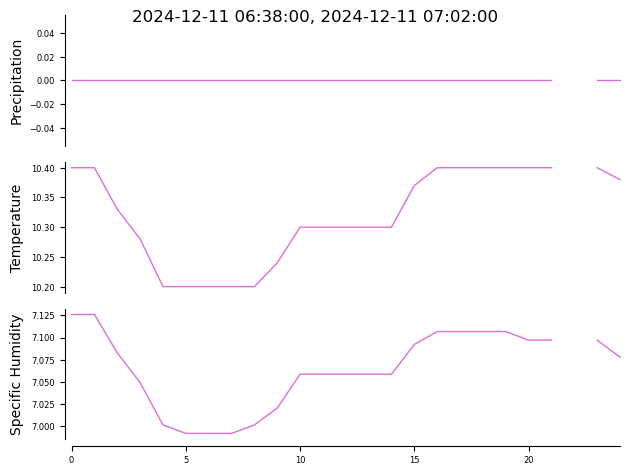

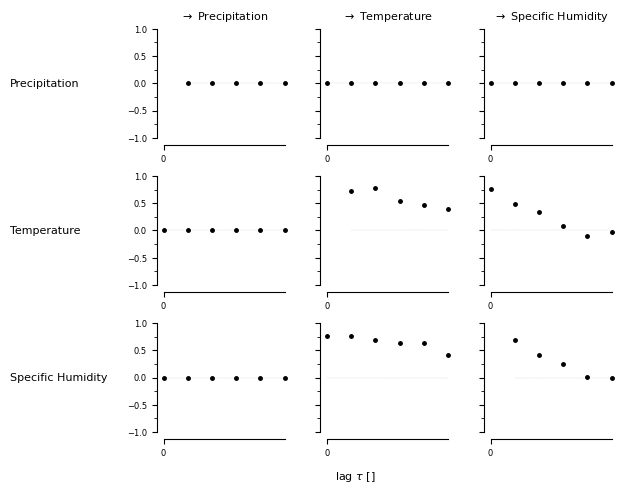

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


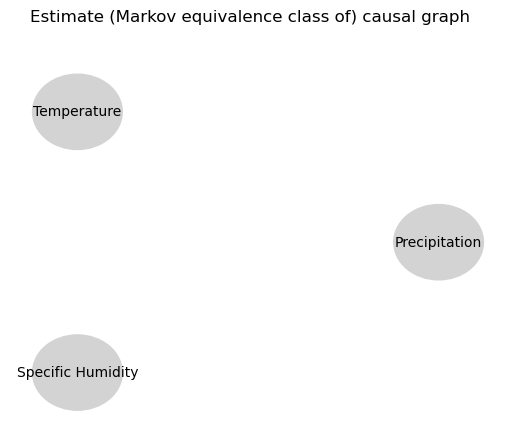

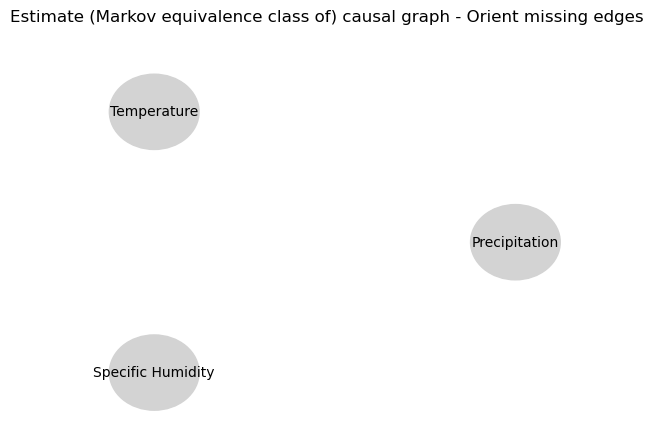

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.08422081644362572
-0.042976289883068335
-0.07930814426514994
-0.03200926048260944
-0.012031227194820627
0.9673823958503677
-0.052728917646277094
-0.03471652756810862
-0.08500122924386551
-0.036930943137371525
-0.020870614698419936
0.9673823958503677
-0.08826515885075507
-0.028071739100373517
-0.07994539339890436
-0.026389002969758844
-0.014063346986783966
0.0
-0.061599145430048026
-0.031484417516185935
-0.08515573127915879
-0.03496044396663147
-0.020269007770579873


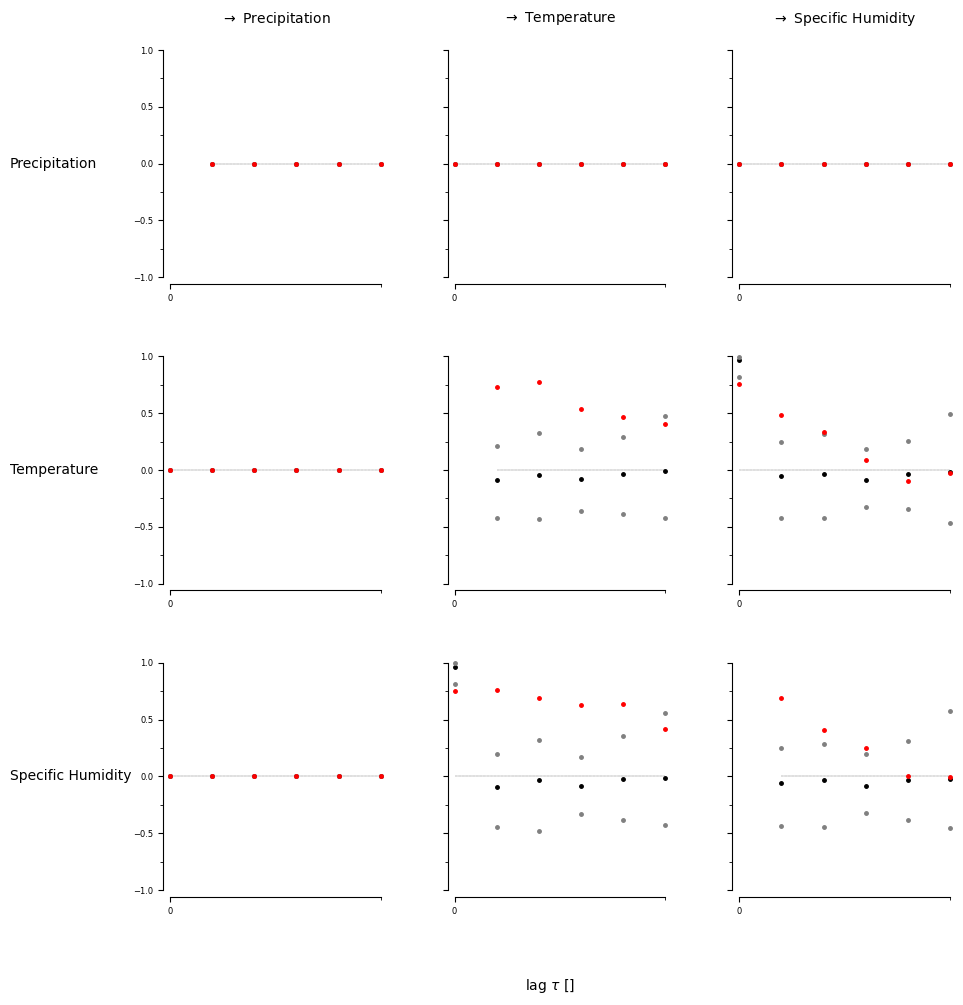

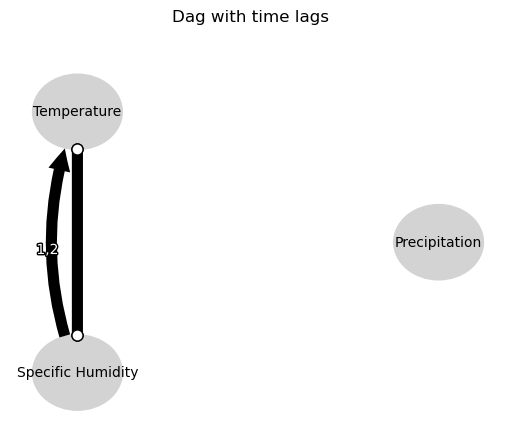

Negative precipitation values: 0


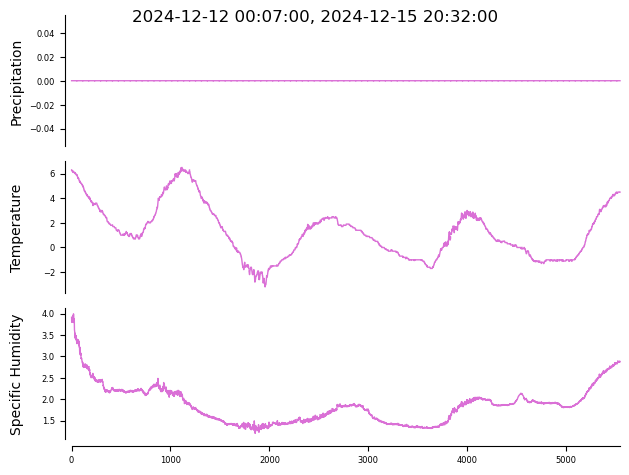

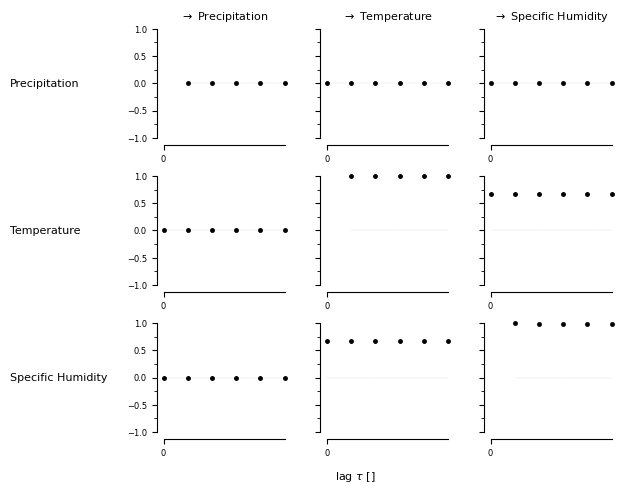

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


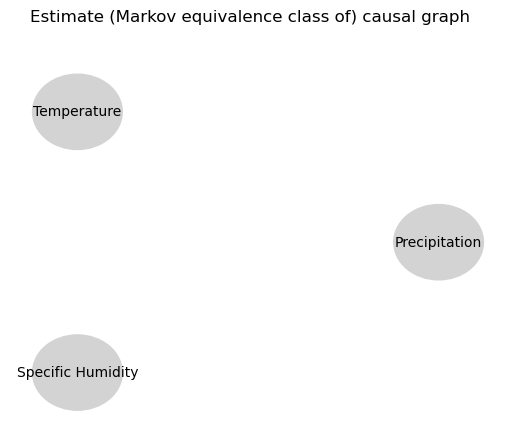

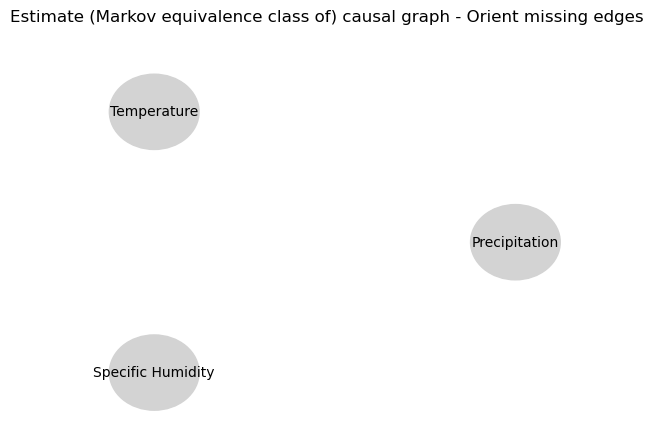

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9985109191355521
0.9963214375772844
0.9939323853055367
0.991522722295693
0.9891496168399183
0.2534482030010983
0.25221015279895004
0.25128259667039904
0.25053601494477307
0.2498793475514762
0.24911488773241394
0.2534482030010983
0.25360365597889944
0.2533758687080774
0.25299025181828905
0.25255777609678526
0.252114517674371
0.0
0.9912862226777613
0.9854854615091129
0.9813112051945427
0.9788391995040202
0.9755733184625137


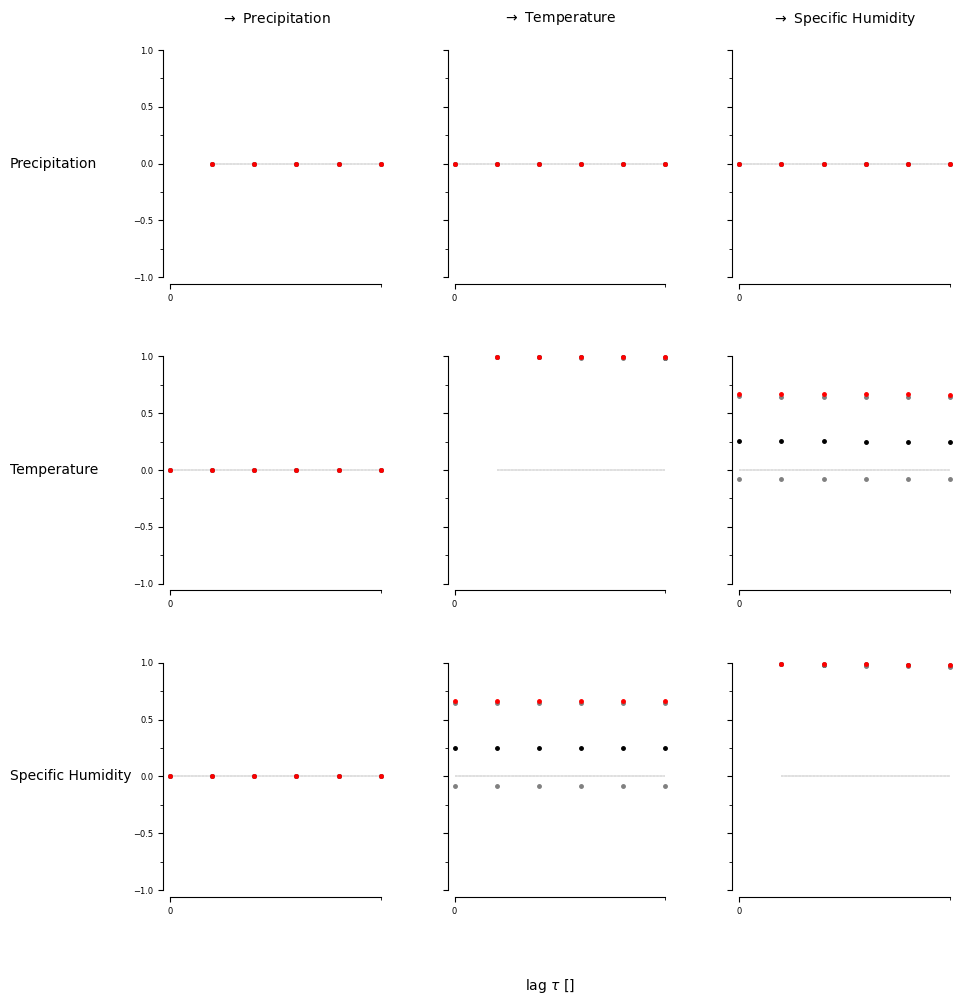

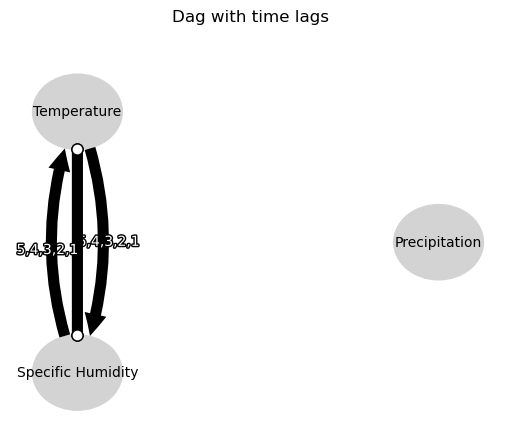

Negative precipitation values: 0


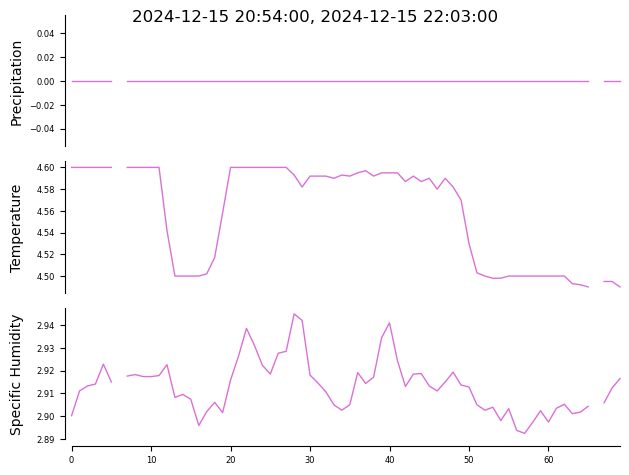

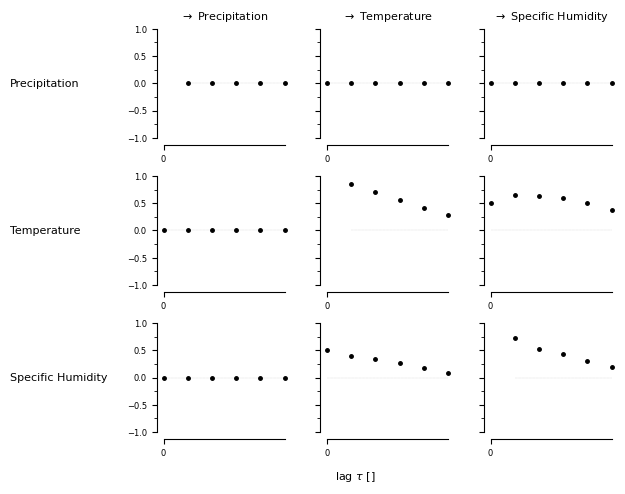

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_lagfuncs', 'axes_dict', 'fig', 'label_fontsize', 'label_space_left', 'label_space_top', 'labels', 'lag_array', 'lag_units', 'legend_fontsize', 'legend_width', 'savefig', 'tau_max', 'x_base']


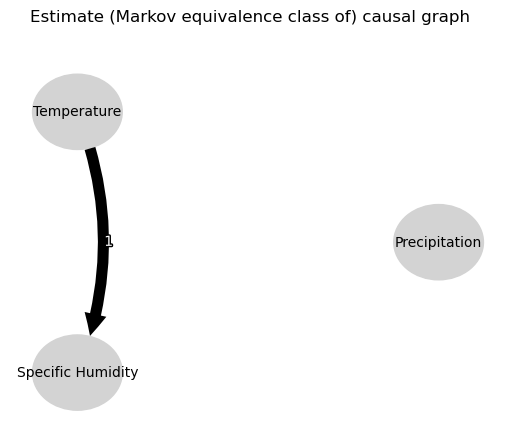

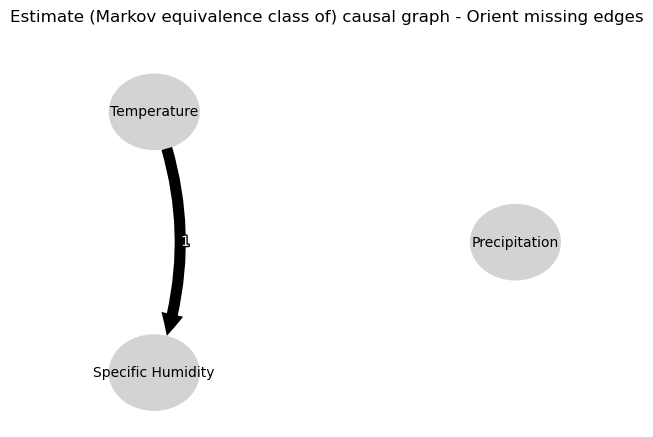

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.7930938947272993
0.6895793249340345
0.6155100661083346
0.5321500343259378
0.4710516664471436
0.5089630024803449
0.5290648535992112
0.5112753433129799
0.47716827831250824
0.45059382814786875
0.40910724139900867
0.5089630024803449
0.45294259915208746
0.38855265423233276
0.3415043934753024
0.3094393465831515
0.2780358672296196
0.0
0.6093194206362961
0.413090275463408
0.30586442235182254
0.25541053327160346
0.22871862337184748


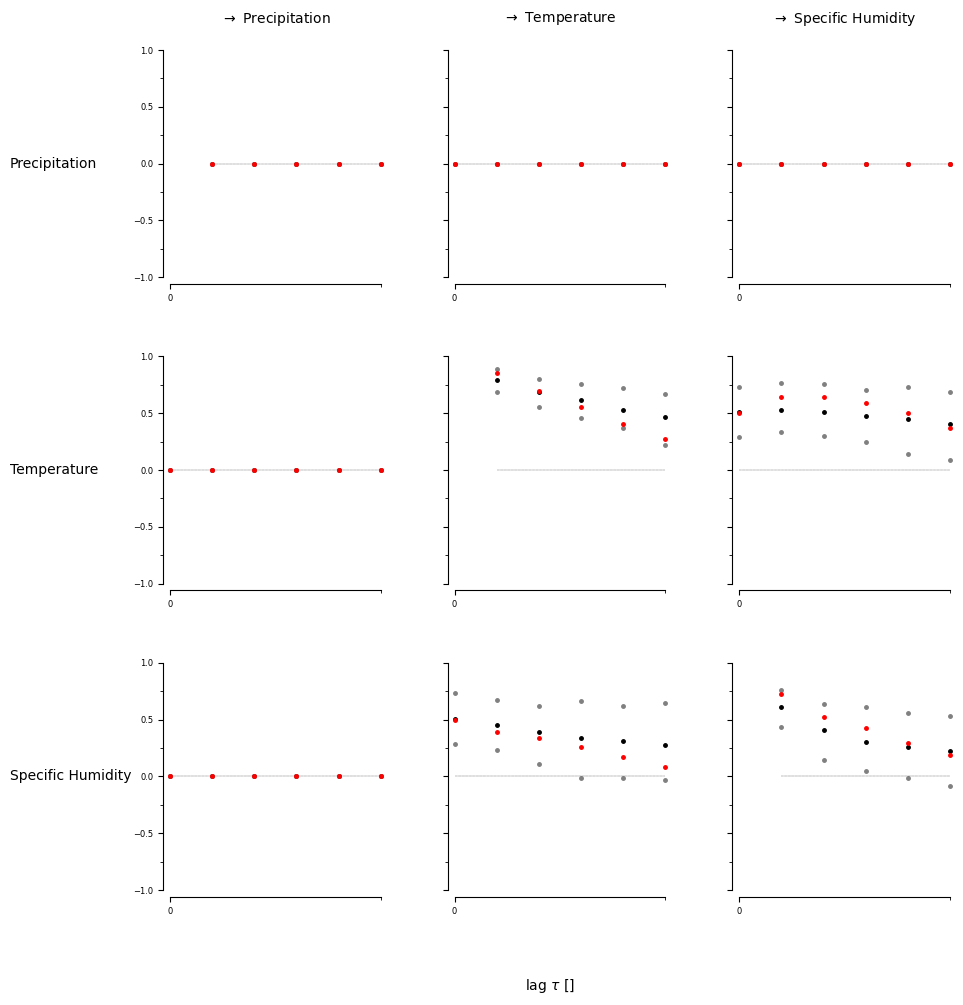

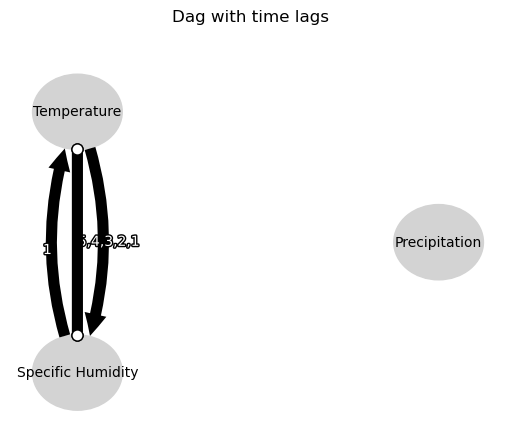

In [15]:
# precipitaction = []

# Store Time lags
P_P_elem = []
P_T_elem = []
P_H_elem = []
T_P_elem = []
T_T_elem = []
T_H_elem = []
H_P_elem = []
H_T_elem = []
H_H_elem = []

#Store Correlation coeficients
P_P_coef = []
P_T_coef = []
P_H_coef = []
T_P_coef = []
T_T_coef = []
T_H_coef = []
H_P_coef = []
H_T_coef = []
H_H_coef = []

a=0
 
data = pd.read_csv(path + f"{site}_30_min_meteorological_data.csv")

with PdfPages(path + f'plots/{site}_30_min_rain_plots_wetness.pdf') as pdf:
    
    for rain in events:

        #var_names = ['Precipitation','Temperature', "Specific Humidity"]
        var_names = ['Precipitation','Temperature', "Wetness idx"]
       
        data = pd.read_csv(path + f"{site}_30_min_meteorological_data.csv")

        data.index = pd.to_datetime(data['time'])

        data = data[str(events[a][0]): str(events[a][1])]
        
        data_precip = data[str(only_r_events[a][0]): str(only_r_events[a][1])]

#         mean_precip = np.mean(data_precip['wxt_precip_rate_mean'])   
        
#         print(mean_precip)             
#         precipitaction.append(mean_precip)

        ##############################################################################################

        data['time'] = pd.to_datetime(data['time'])

        data.set_index('time', inplace=True)

        resampled = data.resample('1min').mean(numeric_only=True)
        
        # Optionally drop some columns and clean
        numeric = resampled[["wxt_precip_rate_mean", "temp_mean", "specific_humidity"]]

        negative_precip_mask = numeric["wxt_precip_rate_mean"] < 0
        
        print(f"Negative precipitation values: {negative_precip_mask.sum()}")

        data_array = numeric.to_numpy()
        
        T, N = data_array.shape

#         # Create mask: True where data is missing
#         mask = np.isnan(data_array)

        data_array[negative_precip_mask.to_numpy(), :] = 999999  

        # Replace NaNs in the data with a placeholder (Tigramite default: 999999)
        data_array[np.isnan(data_array)] = 999999


        # Create Tigramite DataFrame
        dataframe = pp.DataFrame(data_array,
                                    var_names=var_names,
                                    missing_flag=999999)


        ######################################## PLOTTING  #############################################

        fig, axes = tp.plot_timeseries(dataframe=dataframe, color='orchid')


        # Change font size of y-labels
        for ax in axes:
            ax.set_ylabel(ax.get_ylabel(), fontsize=10) 


        fig.suptitle(f"{events[a][0]}, {events[a][1]}")

        # Align y-axis labels
        fig.align_ylabels(axes)
        plt.show()

        pdf.savefig(fig)  # Save this figure to PDF
        plt.close(fig)    # Close to free memory

        
        a=a+1


        ###############################################################################################

        tau_max = 5

        parcorr = RobustParCorr(significance='analytic', 
            #                   mask_type='y'
                         )
        pcmci = PCMCI(
            dataframe=dataframe, 
            cond_ind_test=parcorr,
            verbosity=0)

        P_P = []
        P_T = []
        P_H = []
        T_P = []
        T_T = []
        T_H = []
        H_P = []
        H_T = []
        H_H = []

        P_P_c = []
        P_T_c = []
        P_H_c = []
        T_P_c = []
        T_T_c = []
        T_H_c = []
        H_P_c = []
        H_T_c = []
        H_H_c = []

        try:


            original_correlations = pcmci.get_lagged_dependencies(tau_max=tau_max, val_only=True)['val_matrix']

            lag_func_matrix = tp.plot_lagfuncs(val_matrix = original_correlations, 
                                               setup_args = {'var_names':var_names, 
                                                             'x_base':20, 'y_base':.5,
                                                             'label_fontsize': 8,
                                                             'label_space_left':0.25})


            print(dir(lag_func_matrix))
            plt.show()

            results = pcmci.run_pcmciplus(tau_max=tau_max, pc_alpha=0.01)

            ##################################### Plotting ####################################################

            fig, axes = tp.plot_graph(results['graph'], var_names=var_names, node_size=0.5)

            fig.suptitle(f"Estimate (Markov equivalence class of) causal graph")

            # Align y-axis labels
            fig.align_ylabels(axes)
            plt.show()

            ####################################################################################################

            val_matrix = results['val_matrix']
            variable_order = np.argsort(
                                np.abs(val_matrix).sum(axis=(0,2)))[::-1]

            # Transform conflicting links to unoriented links as a hack, might not work...
            graph = results['graph']
            graph[graph=='x-x'] = 'o-o'
            dag = pcmci._get_dag_from_cpdag(
                            cpdag_graph=graph,
                            variable_order=variable_order)

            ##################################### Plotting ####################################################

            fig, axes = tp.plot_graph(dag, var_names = var_names, node_size=0.5)


            fig.suptitle(f"Estimate (Markov equivalence class of) causal graph - Orient missing edges")

            # Align y-axis labels
            fig.align_ylabels(axes)
            plt.show()

            ####################################################################################################

            parents = toys.dag_to_links(dag)
            #print(parents)

            ###################################################################################################

            realizations = 50


            generator = surrogate_generator.generate_linear_model_from_data(dataframe, parents, tau_max, realizations=realizations, 
                        generate_noise_from='covariance')

            datasets = {}
            for r in range(realizations):
                datasets[r] = next(generator)

            #####################################################################################################

            correlations = np.zeros((realizations, N, N, tau_max + 1))

            for r in range(realizations):
                pcmci = PCMCI(
                    dataframe=pp.DataFrame(datasets[r]), 
                    cond_ind_test=RobustParCorr(),
                    verbosity=0)
                correlations[r] = pcmci.get_lagged_dependencies(tau_max=tau_max, val_only=True)['val_matrix']

            # Get mean and 5th and 95th quantile
            correlation_mean = correlations.mean(axis=0)
            
            correlation_interval = np.percentile(correlations, q=[5, 95], axis=0)

            #met_vars = ["Precipitation", "Temperature", "Specific Humidity"]
            met_vars = ["Precipitation", "Temperature", "Specific Humidity"]

            for index in range(3):  # effect variable
                for ind in range(3):  # cause variable

                    effect_var = met_vars[index]
                    cause_var = met_vars[ind]

                    for coefficient, element in enumerate(correlation_mean[index][ind]):

                            if effect_var == "Precipitation":
                                if cause_var == "Precipitation":
                                    print(element)
                                    P_P_c.append(element)


                                elif cause_var == "Temperature":
                                    print(element)
                                    P_T_c.append(element)

                                elif cause_var == "Specific Humidity":
                                    print(element)
                                    P_H_c.append(element)

                            ####################################

                            elif effect_var == "Temperature":
                                if cause_var == "Precipitation":
                                    print(element)
                                    T_P_c.append(element)
                                elif cause_var == "Temperature":
                                    print(element)
                                    T_T_c.append(element)
                                elif cause_var == "Specific Humidity":
                                    print(element)
                                    T_H_c.append(element)

                            ####################################

                            elif effect_var == "Specific Humidity":
                                if cause_var == "Precipitation":
                                    #print(element)
                                    H_P_c.append(element)
                                elif cause_var == "Temperature":
                                    print(element)
                                    H_T_c.append(element)
                                elif cause_var == "Specific Humidity":
                                    print(element)
                                    H_H_c.append(element)


            P_P_coef.append(P_P_c)
            P_T_coef.append(P_T_c)
            P_H_coef.append(P_H_c)
            T_P_coef.append(T_P_c)
            T_T_coef.append(T_T_c)
            T_H_coef.append(T_H_c)
            H_P_coef.append(H_P_c)
            H_T_coef.append(H_T_c)
            H_H_coef.append(H_H_c)



            # Plot lag functions of mean and 5th and 95th quantile together with original correlation in one plot
            lag_func_matrix = tp.setup_matrix(N=N, tau_max=tau_max, x_base=10, figsize=(10, 10), var_names=var_names, label_space_left=0.17)
            lag_func_matrix.add_lagfuncs(val_matrix=correlation_mean, color='black')
            lag_func_matrix.add_lagfuncs(val_matrix=correlation_interval[0], color='grey')
            lag_func_matrix.add_lagfuncs(val_matrix=correlation_interval[1], color='grey')
            lag_func_matrix.add_lagfuncs(val_matrix=original_correlations, color='red')
            lag_func_matrix.savefig(name=None)

            pcmci = PCMCI(
                dataframe=dataframe, 
                cond_ind_test=parcorr,
                verbosity=0)

            original_correlations_pvals = pcmci.get_lagged_dependencies(tau_max=tau_max)['p_matrix'] 

            graph = original_correlations_pvals<0.01

            fig, axes = tp.plot_graph(graph=graph, var_names=var_names, node_size=0.5)

            fig.suptitle(f"Dag with time lags")

            # Align y-axis labels
            fig.align_ylabels(axes)
            plt.show()

            pdf.savefig(fig)  # Save this figure to PDF
            plt.close(fig)    # Close to free memory

            for index in range(3):  # effect variable
                for ind in range(3):  # cause variable

                    effect_var = met_vars[index]
                    cause_var = met_vars[ind]

                    for lag, element in enumerate(graph[index][ind]):

                        if element == True:  
                            if effect_var == "Precipitation":
                                if cause_var == "Precipitation":
                                    P_P.append(lag)

                                elif cause_var == "Temperature":
                                    P_T.append(lag)

                                elif cause_var == "Specific Humidity":
                                    P_H.append(lag)

                            ####################################

                            elif effect_var == "Temperature":
                                if cause_var == "Precipitation":
                                    T_P.append(lag)
                                elif cause_var == "Temperature":
                                    T_T.append(lag)
                                elif cause_var == "Specific Humidity":
                                    T_H.append(lag)

                            ####################################

                            elif effect_var == "Specific Humidity":
                                if cause_var == "Precipitation":
                                    H_P.append(lag)
                                elif cause_var == "Temperature":
                                    H_T.append(lag)
                                elif cause_var == "Specific Humidity":
                                    H_H.append(lag)

                        else:
                            element == False

            P_P_elem.append(P_P)
            P_T_elem.append(P_T)
            P_H_elem.append(P_H)
            T_P_elem.append(T_P)
            T_T_elem.append(T_T)
            T_H_elem.append(T_H)
            H_P_elem.append(H_P)
            H_T_elem.append(H_T)
            H_H_elem.append(H_H)

        except ValueError as e:
            print(f"⚠️ Skipping event {a} ({events[0]} → {events[1]}) due to error: {e}")

            P_P_elem.append(np.nan)
            P_T_elem.append(np.nan)
            P_H_elem.append(np.nan)
            T_P_elem.append(np.nan)
            T_T_elem.append(np.nan)
            T_H_elem.append(np.nan)
            H_P_elem.append(np.nan)
            H_T_elem.append(np.nan)
            H_H_elem.append(np.nan)


            P_P_coef.append(np.nan)
            P_T_coef.append(np.nan)
            P_H_coef.append(np.nan)
            T_P_coef.append(np.nan)
            T_T_coef.append(np.nan)
            T_H_coef.append(np.nan)
            H_P_coef.append(np.nan)
            H_T_coef.append(np.nan)
            H_H_coef.append(np.nan)

            continue



In [28]:
#rainy_times['mean precipitation'] = precipitaction 


rainy_times['P_P_coef'] = P_P_coef
rainy_times['P_T_coef'] = P_T_coef
rainy_times['P_H_coef'] = P_H_coef
rainy_times['T_P_coef'] = T_P_coef
rainy_times['T_T_coef'] = T_T_coef
rainy_times['T_H_coef'] = T_H_coef
rainy_times['H_P_coef'] = H_P_coef
rainy_times['H_T_coef'] = H_T_coef
rainy_times['H_H_coef'] = H_H_coef

rainy_times['P_P_elem'] = P_P_elem 
rainy_times['P_T_elem'] = P_T_elem 
rainy_times['P_H_elem'] = P_H_elem 
rainy_times['T_P_elem'] = T_P_elem 
rainy_times['T_T_elem'] = T_T_elem 
rainy_times['T_H_elem'] = T_H_elem 
rainy_times['H_P_elem'] = H_P_elem 
rainy_times['H_T_elem'] = H_T_elem 
rainy_times['H_H_elem'] = H_H_elem 

rainy_times.to_csv(path + f"{site}_continuous_dry_periods.csv",index=False)

In [20]:
site = "S2"

path = f"{site}_data/"

# Rain Events
rainy_times = pd.read_csv(path + f"{site}_extended_rain_windows.csv")

start = rainy_times.extended_start
end   = rainy_times.extended_end

events = list(zip(
    pd.to_datetime(rainy_times['extended_start']),
    pd.to_datetime(rainy_times['extended_end'])
))

########################################################################################

only_rainy_times = pd.read_csv(path + f"{site}_continuous_rain_periods.csv")

start_r = rainy_times.extended_start
end_r   = rainy_times.extended_end

only_r_events = list(zip(
    pd.to_datetime(only_rainy_times['extended_start']),
    pd.to_datetime(only_rainy_times['extended_end'])))

FileNotFoundError: [Errno 2] No such file or directory: 'S3_data/S3_continuous_rain_periods.csv'

In [29]:
a = 0
cumulative_precipitation = []

for rain in events:
    # Data
    data = pd.read_csv(path + f"{site}_minute_meteorological_data_wxt.csv")
    data.index = pd.to_datetime(data['time'])

    # Events
    data = data[str(events[a][0]): str(events[a][1])]

    # Only precipitation time inside the event
    data_precip = data[str(only_r_events[a][0]): str(only_r_events[a][1])]

    dt = 1 / 60

    # Data - precipitation
    precip_rate = data_precip['wxt_precip_rate_mean']
    rain_step = precip_rate * dt
    
    #0+-0.5 uncertainity

    # Calculate rain accumulated
    cumulative_rain = rain_step.cumsum()
    
    print(cumulative_rain)
    
    # Save into array
    cumulative_precipitation.append(cumulative_rain)

    a += 1

    ##############################################################################################

    

time
2024-12-09 15:37:00    0.003333
2024-12-09 15:38:00    0.046667
2024-12-09 15:39:00    0.080000
2024-12-09 15:40:00    0.113333
2024-12-09 15:41:00    0.165000
2024-12-09 15:42:00    0.211667
2024-12-09 15:43:00    0.228333
2024-12-09 15:44:00    0.230000
2024-12-09 15:45:00    0.230000
2024-12-09 15:46:00    0.230000
2024-12-09 15:47:00    0.230000
2024-12-09 15:48:00    0.236667
2024-12-09 15:49:00    0.256667
2024-12-09 15:50:00    0.298333
2024-12-09 15:51:00    0.343333
2024-12-09 15:52:00    0.370000
2024-12-09 15:53:00    0.410000
2024-12-09 15:54:00    0.446667
2024-12-09 15:55:00    0.486667
2024-12-09 15:56:00    0.536667
2024-12-09 15:57:00    0.578333
2024-12-09 15:58:00    0.598333
2024-12-09 15:59:00    0.608333
2024-12-09 16:01:00    0.610000
2024-12-09 16:02:00    0.610000
2024-12-09 16:03:00    0.615000
2024-12-09 16:04:00    0.615000
2024-12-09 16:05:00    0.615000
2024-12-09 16:06:00    0.615000
2024-12-09 16:07:00    0.615000
2024-12-09 16:08:00    0.615000
202

time
2024-12-16 07:03:00    0.006667
2024-12-16 07:04:00    0.040000
2024-12-16 07:05:00    0.095000
2024-12-16 07:06:00    0.125000
2024-12-16 07:07:00    0.141667
                         ...   
2024-12-16 08:51:00    3.260000
2024-12-16 08:52:00    3.296667
2024-12-16 08:53:00    3.348333
2024-12-16 08:54:00    3.385000
2024-12-16 08:55:00    3.396667
Name: wxt_precip_rate_mean, Length: 112, dtype: float64
time
2024-12-16 09:11:00    0.016667
2024-12-16 09:12:00    0.018333
2024-12-16 09:13:00    0.021667
2024-12-16 09:14:00    0.021667
2024-12-16 09:15:00    0.021667
2024-12-16 09:16:00    0.021667
2024-12-16 09:17:00    0.028333
2024-12-16 09:18:00    0.038333
2024-12-16 09:19:00    0.041667
2024-12-16 09:20:00    0.043333
2024-12-16 09:21:00    0.043333
2024-12-16 09:22:00    0.060000
2024-12-16 09:23:00    0.088333
2024-12-16 09:24:00    0.093333
2024-12-16 09:25:00    0.105000
2024-12-16 09:26:00    0.111667
2024-12-16 09:27:00    0.113333
2024-12-16 09:28:00    0.133333
2024-1

time
2024-12-28 05:53:00    0.001667
2024-12-28 05:54:00    0.003333
2024-12-28 05:55:00    0.008333
2024-12-28 05:56:00    0.008333
2024-12-28 05:57:00    0.008333
2024-12-28 05:58:00    0.008333
2024-12-28 05:59:00    0.013333
2024-12-28 06:01:00    0.013333
2024-12-28 06:02:00    0.013333
2024-12-28 06:03:00    0.015000
2024-12-28 06:04:00    0.020000
2024-12-28 06:05:00    0.031667
2024-12-28 06:06:00    0.038333
2024-12-28 06:07:00    0.053333
2024-12-28 06:08:00    0.055000
2024-12-28 06:09:00    0.055000
2024-12-28 06:10:00    0.055000
2024-12-28 06:11:00    0.055000
2024-12-28 06:12:00    0.055000
2024-12-28 06:13:00    0.055000
2024-12-28 06:14:00    0.055000
2024-12-28 06:15:00    0.055000
2024-12-28 06:16:00    0.056667
2024-12-28 06:17:00    0.061667
2024-12-28 06:18:00    0.073333
2024-12-28 06:19:00    0.078333
2024-12-28 06:20:00    0.078333
2024-12-28 06:21:00    0.078333
2024-12-28 06:22:00    0.088333
2024-12-28 06:23:00    0.101667
2024-12-28 06:24:00    0.105000
Nam

time
2025-01-01 01:33:00    0.171667
2025-01-01 01:34:00    0.435000
2025-01-01 01:35:00    0.441667
2025-01-01 01:36:00    0.455000
2025-01-01 01:37:00    0.461667
2025-01-01 01:38:00    0.463333
2025-01-01 01:39:00    0.463333
2025-01-01 01:40:00    0.463333
2025-01-01 01:41:00    0.463333
2025-01-01 01:42:00    0.463333
2025-01-01 01:43:00    0.463333
2025-01-01 01:44:00    0.463333
2025-01-01 01:45:00    0.463333
2025-01-01 01:46:00    0.463333
2025-01-01 01:47:00    0.488333
2025-01-01 01:48:00    0.530000
2025-01-01 01:49:00    0.633333
2025-01-01 01:50:00    0.701667
2025-01-01 01:51:00    0.788333
2025-01-01 01:52:00    1.026667
2025-01-01 01:53:00    1.273333
2025-01-01 01:54:00    1.486667
2025-01-01 01:55:00    1.560000
2025-01-01 01:56:00    1.603333
2025-01-01 01:57:00    1.613333
2025-01-01 01:58:00    1.616667
Name: wxt_precip_rate_mean, dtype: float64
time
2025-01-03 22:36:00    0.015000
2025-01-03 22:37:00    0.031667
2025-01-03 22:38:00    0.036667
2025-01-03 22:39:00

time
2025-01-31 16:18:00     0.013333
2025-01-31 16:19:00     0.025000
2025-01-31 16:20:00     0.045000
2025-01-31 16:21:00     0.081667
2025-01-31 16:22:00     0.141667
                         ...    
2025-01-31 18:59:00    17.898333
2025-01-31 19:01:00    17.968333
2025-01-31 19:02:00    17.990000
2025-01-31 19:03:00    18.003333
2025-01-31 19:04:00    18.008333
Name: wxt_precip_rate_mean, Length: 164, dtype: float64
time
2025-02-01 00:36:00     0.001667
2025-02-01 00:37:00     0.001667
2025-02-01 00:38:00     0.001667
2025-02-01 00:39:00     0.001667
2025-02-01 00:40:00     0.001667
                         ...    
2025-02-01 05:46:00    15.288333
2025-02-01 05:47:00    15.326667
2025-02-01 05:48:00    15.345000
2025-02-01 05:49:00    15.348333
2025-02-01 05:50:00    15.351667
Name: wxt_precip_rate_mean, Length: 310, dtype: float64
time
2025-02-06 04:38:00    0.008333
2025-02-06 04:39:00    0.018333
2025-02-06 04:40:00    0.028333
2025-02-06 04:41:00    0.040000
2025-02-06 04:42:00

time
2025-02-16 07:45:00    0.006667
2025-02-16 07:46:00    0.056667
2025-02-16 07:47:00    0.075000
2025-02-16 07:48:00    0.091667
2025-02-16 07:49:00    0.128333
2025-02-16 07:50:00    0.181667
2025-02-16 07:51:00    0.263333
2025-02-16 07:52:00    0.301667
2025-02-16 07:53:00    0.315000
2025-02-16 07:54:00    0.366667
2025-02-16 07:55:00    0.385000
2025-02-16 07:56:00    0.403333
2025-02-16 07:57:00    0.411667
2025-02-16 07:58:00    0.418333
2025-02-16 07:59:00    0.421667
2025-02-16 08:01:00    0.421667
2025-02-16 08:02:00    0.421667
2025-02-16 08:03:00    0.421667
2025-02-16 08:04:00    0.421667
2025-02-16 08:05:00    0.426667
2025-02-16 08:06:00    0.525000
2025-02-16 08:07:00    0.595000
2025-02-16 08:08:00    0.723333
2025-02-16 08:09:00    0.795000
2025-02-16 08:10:00    0.836667
2025-02-16 08:11:00    0.876667
2025-02-16 08:12:00    0.936667
2025-02-16 08:13:00    0.960000
2025-02-16 08:14:00    0.973333
Name: wxt_precip_rate_mean, dtype: float64
time
2025-02-16 08:25:00

time
2025-03-21 03:49:00    0.001667
2025-03-21 03:50:00    0.025000
2025-03-21 03:51:00    0.058333
2025-03-21 03:52:00    0.096667
2025-03-21 03:53:00    0.118333
2025-03-21 03:54:00    0.141667
2025-03-21 03:55:00    0.175000
2025-03-21 03:56:00    0.213333
2025-03-21 03:57:00    0.260000
2025-03-21 03:58:00    0.295000
2025-03-21 03:59:00    0.341667
2025-03-21 04:01:00    0.365000
2025-03-21 04:02:00    0.366667
2025-03-21 04:03:00    0.370000
2025-03-21 04:04:00    0.376667
2025-03-21 04:05:00    0.396667
2025-03-21 04:06:00    0.405000
2025-03-21 04:07:00    0.406667
2025-03-21 04:08:00    0.430000
2025-03-21 04:09:00    0.451667
2025-03-21 04:10:00    0.485000
2025-03-21 04:11:00    0.513333
2025-03-21 04:12:00    0.518333
2025-03-21 04:13:00    0.518333
2025-03-21 04:14:00    0.520000
2025-03-21 04:15:00    0.530000
Name: wxt_precip_rate_mean, dtype: float64
time
2025-03-24 09:43:00     0.016667
2025-03-24 09:44:00     0.018333
2025-03-24 09:45:00     0.018333
2025-03-24 09:46

time
2025-04-11 01:27:00    0.001667
2025-04-11 01:28:00    0.001667
2025-04-11 01:29:00    0.001667
2025-04-11 01:30:00    0.001667
2025-04-11 01:31:00    0.001667
                         ...   
2025-04-11 02:40:00    0.415000
2025-04-11 02:41:00    0.420000
2025-04-11 02:42:00    0.425000
2025-04-11 02:43:00    0.428333
2025-04-11 02:44:00    0.431667
Name: wxt_precip_rate_mean, Length: 77, dtype: float64
time
2025-04-11 06:20:00    0.010000
2025-04-11 06:21:00    0.028333
2025-04-11 06:22:00    0.045000
2025-04-11 06:23:00    0.066667
2025-04-11 06:24:00    0.088333
2025-04-11 06:25:00    0.115000
2025-04-11 06:26:00    0.160000
2025-04-11 06:27:00    0.176667
2025-04-11 06:28:00    0.193333
2025-04-11 06:29:00    0.196667
2025-04-11 06:30:00    0.196667
2025-04-11 06:31:00    0.196667
2025-04-11 06:32:00    0.196667
2025-04-11 06:33:00    0.196667
2025-04-11 06:34:00    0.201667
2025-04-11 06:35:00    0.201667
2025-04-11 06:36:00    0.201667
2025-04-11 06:37:00    0.201667
2025-04

time
2025-04-15 16:09:00    0.008333
2025-04-15 16:10:00    0.046667
2025-04-15 16:11:00    0.056667
2025-04-15 16:12:00    0.068333
2025-04-15 16:13:00    0.076667
2025-04-15 16:14:00    0.076667
2025-04-15 16:15:00    0.076667
2025-04-15 16:16:00    0.076667
2025-04-15 16:17:00    0.085000
2025-04-15 16:18:00    0.100000
2025-04-15 16:19:00    0.100000
2025-04-15 16:20:00    0.100000
2025-04-15 16:21:00    0.100000
2025-04-15 16:22:00    0.100000
2025-04-15 16:23:00    0.100000
2025-04-15 16:24:00    0.100000
2025-04-15 16:25:00    0.100000
2025-04-15 16:26:00    0.100000
2025-04-15 16:27:00    0.100000
2025-04-15 16:28:00    0.116667
2025-04-15 16:29:00    0.173333
Name: wxt_precip_rate_mean, dtype: float64
time
2025-04-26 05:58:00    0.001667
2025-04-26 05:59:00    0.011667
2025-04-26 06:01:00    0.020000
2025-04-26 06:02:00    0.020000
2025-04-26 06:03:00    0.020000
2025-04-26 06:04:00    0.021667
2025-04-26 06:05:00    0.021667
2025-04-26 06:06:00    0.021667
2025-04-26 06:07:00

time
2025-05-13 05:04:00    0.021667
2025-05-13 05:05:00    0.021667
2025-05-13 05:06:00    0.021667
2025-05-13 05:07:00    0.021667
2025-05-13 05:08:00    0.021667
2025-05-13 05:09:00    0.021667
2025-05-13 05:10:00    0.021667
2025-05-13 05:11:00    0.021667
2025-05-13 05:12:00    0.021667
2025-05-13 05:13:00    0.030000
2025-05-13 05:14:00    0.030000
2025-05-13 05:15:00    0.036667
2025-05-13 05:16:00    0.051667
2025-05-13 05:17:00    0.058333
2025-05-13 05:18:00    0.058333
2025-05-13 05:19:00    0.058333
2025-05-13 05:20:00    0.060000
2025-05-13 05:21:00    0.060000
2025-05-13 05:22:00    0.060000
2025-05-13 05:23:00    0.060000
2025-05-13 05:24:00    0.061667
2025-05-13 05:25:00    0.063333
2025-05-13 05:26:00    0.065000
2025-05-13 05:27:00    0.065000
2025-05-13 05:28:00    0.065000
2025-05-13 05:29:00    0.065000
2025-05-13 05:30:00    0.065000
2025-05-13 05:31:00    0.065000
2025-05-13 05:32:00    0.065000
2025-05-13 05:33:00    0.065000
2025-05-13 05:34:00    0.065000
202

time
2025-05-14 03:07:00     0.010000
2025-05-14 03:08:00     0.025000
2025-05-14 03:09:00     0.098333
2025-05-14 03:10:00     0.171667
2025-05-14 03:11:00     0.205000
                         ...    
2025-05-14 04:07:00    16.868333
2025-05-14 04:08:00    16.906667
2025-05-14 04:09:00    16.946667
2025-05-14 04:10:00    16.946667
2025-05-14 04:11:00    16.968333
Name: wxt_precip_rate_mean, Length: 64, dtype: float64
time
2025-05-14 05:24:00    0.001667
2025-05-14 05:25:00    0.008333
2025-05-14 05:26:00    0.016667
2025-05-14 05:27:00    0.050000
2025-05-14 05:28:00    0.065000
                         ...   
2025-05-14 06:31:00    3.335000
2025-05-14 06:32:00    3.388333
2025-05-14 06:33:00    3.400000
2025-05-14 06:34:00    3.421667
2025-05-14 06:35:00    3.471667
Name: wxt_precip_rate_mean, Length: 71, dtype: float64
time
2025-05-16 22:05:00     0.005000
2025-05-16 22:06:00     0.025000
2025-05-16 22:07:00     0.036667
2025-05-16 22:08:00     0.036667
2025-05-16 22:09:00     0.05

time
2025-05-31 00:08:00     0.003333
2025-05-31 00:09:00     0.016667
2025-05-31 00:10:00     0.026667
2025-05-31 00:11:00     0.035000
2025-05-31 00:12:00     0.063333
                         ...    
2025-05-31 02:14:00    12.590000
2025-05-31 02:15:00    12.605000
2025-05-31 02:16:00    12.648333
2025-05-31 02:17:00    12.670000
2025-05-31 02:18:00    12.671667
Name: wxt_precip_rate_mean, Length: 129, dtype: float64
time
2025-05-31 06:52:00    0.053333
2025-05-31 06:53:00    0.066667
2025-05-31 06:54:00    0.090000
2025-05-31 06:55:00    0.093333
2025-05-31 06:56:00    0.135000
                         ...   
2025-05-31 08:16:00    2.563333
2025-05-31 08:17:00    2.648333
2025-05-31 08:18:00    2.735000
2025-05-31 08:19:00    2.781667
2025-05-31 08:20:00    2.806667
Name: wxt_precip_rate_mean, Length: 87, dtype: float64
time
2025-06-06 16:46:00    0.015000
2025-06-06 16:47:00    0.035000
2025-06-06 16:48:00    0.035000
2025-06-06 16:49:00    0.035000
2025-06-06 16:50:00    0.036667

In [30]:
for i, series in enumerate(cumulative_precipitation):
    if not series.empty:
        print(f"Evento {i}: {series.iloc[-1]}")
    else:
        print(f"Evento {i}: Serie vacía")


Evento 0: 0.7950000000000002
Evento 1: 8.81333333333334
Evento 2: 0.32666666666666666
Evento 3: 0.3383333333333333
Evento 4: 28.33666666666668
Evento 5: 20.730000000000008
Evento 6: 0.7133333333333332
Evento 7: 1.825
Evento 8: 1.2116666666666673
Evento 9: 0.8900000000000002
Evento 10: 3.3966666666666674
Evento 11: 0.3783333333333333
Evento 12: 1.3233333333333333
Evento 13: 1.2433333333333334
Evento 14: 5.436666666666667
Evento 15: 0.4783333333333332
Evento 16: 0.20333333333333337
Evento 17: 1.2300000000000004
Evento 18: 1.1683333333333332
Evento 19: 0.155
Evento 20: 0.10499999999999998
Evento 21: 1.4683333333333328
Evento 22: 4.421666666666665
Evento 23: 1.2966666666666664
Evento 24: 1.0383333333333333
Evento 25: 0.6350000000000001
Evento 26: 0.8150000000000001
Evento 27: 2.215
Evento 28: 0.6566666666666665
Evento 29: 13.875000000000002
Evento 30: 1.6166666666666665
Evento 31: 0.24166666666666667
Evento 32: 1.8466666666666662
Evento 33: 0.4316666666666666
Evento 34: 0.41000000000000003

In [31]:
cumulative_totals = [
    series.iloc[-1] if not series.empty else np.nan
    for series in cumulative_precipitation
]

df = pd.read_csv(path + f"{site}_continuous_rain_periods.csv")

df['cumulative_precipitation'] = cumulative_totals

df.to_csv(path + f"{site}_continuous_rain_periods.csv", index=False)
